# Dossier SVM et Réseau de neurones, François Lebrument et Emma Weiss-Blanchard - M2 ECAP

# Import package

In [289]:
#Package classique
import pandas as pd
import numpy as np

#Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap #Color

#Image
from IPython.display import Image

#Chronomètre
import time

#OS
import os

#Numpy
from numpy.random import seed

#scipy.stats
from scipy.stats import spearmanr
import matplotlib.patches as mpatches
from scipy.stats import uniform, randint
from scipy.stats.mstats import winsorize
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import chi2_contingency

#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.base import clone
from sklearn.utils import resample #Pour le resampling

#Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import RepeatedStratifiedKFold

#from sklearn.multiclass import OneVsRestClassifier
#from sklearn.multiclass import OneVsOneClassifier
#Regressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#Encoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder


#Time
import time

#Web request
import requests
import io

#Itertools
from itertools import combinations

#Math
import math 

#Graphique
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go

#Keras et Tensorflow
import tensorflow as tf
import tensorflow 
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Flatten

from tensorflow.random import set_seed

from scikeras.wrappers import KerasClassifier, KerasRegressor
#from keras.wrappers.scikit_learn import KerasClassifier

#Nltk
import nltk
from nltk import word_tokenize
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon

#Country
import pycountry
from pycountry import countries
import pycountry_convert as pc
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

#statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Boosting
import lightgbm as lgb
from xgboost import XGBClassifier

#Copy
import copy

#Display
import display

ModuleNotFoundError: No module named 'display'

# Fonction

In [ ]:
#Tokenisation
def tokenization(df,nom_col) :
    num_col=df.columns.get_loc(nom_col) #numéro de colonne
    
    for i in range(0,df.shape[0]) :
        df.iat[i,num_col] = word_tokenize(df.iat[i,num_col])


In [ ]:
#Spliting
def spliting(df,nom_col,caractere) :
    num_col=df.columns.get_loc(nom_col) #numéro de colonne
    
    for i in range(0,df.shape[0]) :
        df.iat[i,num_col] = df.iat[i,num_col].split(caractere)

In [ ]:
#Histogramme
def histo(base) :
    var_quanti=base._get_numeric_data().columns
    
    for i in range(0,base[var_quanti].shape[1]) :
        plt.figure()
        plt.hist(base[base[var_quanti].columns[i]])
        plt.title(base[var_quanti].columns[i])
        plt.show()

In [ ]:
#Boxplot
def boxplot1(base) :
    var_quanti=base._get_numeric_data().columns
    
    for i in range(0,base[var_quanti].shape[1]) :
        plt.figure()
        plt.boxplot(base[var_quanti].iloc[:,i],showmeans=True)
        plt.title(base[var_quanti].columns[i])
        plt.show()

In [ ]:
#Boxplot par catégorie
def boxplot2(base,var_quali) :
    var_quanti=base._get_numeric_data().columns

    for i in range(0,base[var_quanti].shape[1]) :
        plt.figure()
        sns.boxplot(data=base, x=base[var_quali], y=base[var_quanti].columns[i])
        plt.title(base[var_quanti].columns[i]+" en fonction de " +base[var_quali].name)
        plt.show()

In [ ]:
#Nuage de points (avec catégorie en couleur)
def scatter_plot(base,var_categ):
    I=base._get_numeric_data().shape[1] #Nombre de variable numérique

    for i in range(0,I) :
        for j in range(i+1,I) :
            plt.figure()

            sns.relplot(data=base,x=base.columns[i], y=base.columns[j], hue=var_categ)
            plt.xlabel(base.columns[i])
            plt.ylabel(base.columns[j])
            plt.title("Nuage de point entre " + base.columns[i] + " et " + base.columns[j])
            plt.legend()

            plt.show

In [ ]:
#Récupération des bornes inf et sup d'un boxplot (pour observer les valeurs atypiques)
def borne_boxplot(base,variable) : 
    #Calcul des bornes supp et inf des boxplots
    Q1=np.quantile(base[variable], q = np.arange(0.25, 1, 0.25))[0] #1er quantile
    Q3=np.quantile(base[variable], q = np.arange(0.25, 1, 0.25))[2] #3ème quantile

    borne_inf=max(min(base[variable]),(Q1-1.5*(Q3-Q1)))
    borne_sup=min(max(base[variable]),(Q3+1.5*(Q3-Q1)))
    
    #Sécurité pour que le min et max des variables ne soient pas comptabilisé comme atypique, dans le cas où il n'y a pas de valeur en dehors des moustaches
    if borne_inf==min(base[variable]) :
        borne_inf-=1
                      
    if borne_sup==max(base[variable]) :
        borne_sup+=1

    
    #Nombre de valeur potentiellement atypique total
    nb_val_atypique=len(set(list(base.loc[(base[variable]>borne_sup)|(base[variable]<borne_inf),variable])))

    #Valeur seuil en-dessous
    if len(set(list(base.loc[(base[variable]<borne_inf),variable])))>0 :
        seuil_min=max(set(list(base.loc[(base[variable]<borne_inf),variable])))
    else :
        seuil_min="-"

    #Valeur seuil au-dessus
    if len(set(list(base.loc[(base[variable]>borne_sup),variable])))>0 :
        seuil_max=min(set(list(base.loc[(base[variable]>borne_sup),variable])))
    else :
        seuil_max="-"

    if nb_val_atypique>0 : 
        print("La variable " + variable + " a potentiellement " + str(nb_val_atypique) + " valeurs atypiques" )
        print("Les bornes sont les suivantes : <= " + str(seuil_min) + " ; >= " + str(seuil_max))
    else :
        print("La variable " + variable + " n'a pas de valeur atypique")
    
    return nb_val_atypique,seuil_max,seuil_min

In [ ]:
#Courbe de moyenne entre 2 var quanti
def line_plot(base,var_categ):
    #Séparation du type de variable discret/continue
    var_quanti_disc=base._get_numeric_data().select_dtypes(include=['int64','int32']) #Les variables quanti discrete sont utilisés en abscisse
    var_quanti_conti=base._get_numeric_data().select_dtypes(include=['float64'])
    var_quanti_global=pd.concat([var_quanti_disc, var_quanti_conti,base[var_categ]], axis=1, join='inner')

    for i in range(0,var_quanti_disc.shape[1]) : #Boucle des abscisse
        for j in range(i+1,var_quanti_global.shape[1]-1) : #Boucle des ordonnées
            plt.figure()
            
            #Graphique de courbe : 
            #-Nombre de courbe = nombre de catégorie
            #-Ordonnée : Moyenne de variable quanti
            #-Abscisse : Variable quanti discrete
            var_quanti_global[[var_quanti_global.columns[i],var_quanti_global.columns[j],var_categ]].groupby([var_quanti_global.columns[i],var_categ]).mean().unstack().plot()            
            plt.xlabel(var_quanti_global.columns[i])
            plt.ylabel("Moyenne de "+var_quanti_global.columns[j])
            plt.title("Courbe de moyenne entre " + var_quanti_global.columns[i] + " et " + var_quanti_global.columns[j])
            plt.legend(["0","1"])

            plt.show()

In [ ]:
#ESD test

def grubbs_stat(y):
    std_dev = np.std(y)
    avg_y = np.mean(y)
    abs_val_minus_avg = abs(y - avg_y)
    max_of_deviations = max(abs_val_minus_avg)
    max_ind = np.argmax(abs_val_minus_avg)
    Gcal = max_of_deviations/ std_dev
    #print("Grubbs Statistics Value : {}".format(Gcal))
    return Gcal, max_ind

def calculate_critical_value(size, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    #print("Grubbs Critical Value: {}".format(critical_value))
    return critical_value


def ESD_Test(input_series, alpha, max_outliers):
    input_series = np.array(input_series) #Transformation de la colonne en array
    
    #Initialisation des valeurs
    nb_outliers=0
    valeur_atypique_seuil="-"
    
    #Itération pour chaque valeur de la série
    for iterations in range(max_outliers):
        Gcritical = calculate_critical_value(len(input_series), alpha)
        Gstat, max_index = grubbs_stat(input_series)
        
        #Récupère les valeurs de la dernière itération où la valeur est considéré comme atypique
        if round(Gstat,4)>round(Gcritical,4) :
            nb_outliers+=1
            valeur_atypique_seuil=input_series[max_index]
            last_Gstat=Gstat
            last_Gcritical=Gcritical
        
        #Supprime la valeur de l'itération pour tester sur d'autres
        input_series = np.delete(input_series, max_index)
   
    #Print des résultats du test
    print("Nombre de valeurs atypiques : "+ str(nb_outliers))
    print("Valeur atypique seuil : {}".format(valeur_atypique_seuil))
    if nb_outliers>0 :
        print('{} is an outlier. G > G-critical: {:.4f} > {:.4f} \n'.format(valeur_atypique_seuil, last_Gstat, last_Gcritical))
    
    if (max_outliers*0.8)<nb_outliers : #Marge de sécurité
        print('\033[1m' + "Veuillez augmenter le nombre d'outlier max par sécurité"+'\033[0m')
    
    return valeur_atypique_seuil

In [ ]:
#Indicateur de performance des modèles
def indicateur(model,X,y,ech) :
    model.predict(X)
    valid_pred=model.predict(X).round()
    
    print("\033[1m" + "Indicateur de l'échantillon " + ech + " : " + '\033[0m')
    print("Matrice de confusion : {}".format(str(confusion_matrix(y, valid_pred))))
    print("Qualité du modèle : {}".format(str(round(metrics.accuracy_score(y, valid_pred),2))))
    print("Taux d'erreur : {}".format(str(round(1-metrics.accuracy_score(y, valid_pred),2))))

    print("Recall : {}".format(str(round(metrics.recall_score(y, valid_pred, average="macro"),2))))
    print("Precision : {}".format(str(round(metrics.precision_score(y, valid_pred, average="macro"),2))))
    print("F1 score : {}".format(str(round(metrics.f1_score(y, valid_pred, average="macro"),2))))

In [ ]:
#Courbe ROC (modèle Random Forest)
def plot_roc_curve_RF(model,X,y):
    y_pred = model.predict_proba(X)[::,1]
    
    #Taux de faux Positif et Taux de Vrai Positif
    fpr, tpr, _ = metrics.roc_curve(y,  y_pred)
    
    #Calcul de l'AUC
    auc = metrics.roc_auc_score(y, y_pred) 
    
    #Plot
    plt.plot(fpr, tpr, color='darkblue', label='AUC=' + str(round(auc,4)))
    plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
    plt.legend()
    plt.show()
    
    return auc

#https://stackabuse.com/understanding-roc-curves-with-python/

In [ ]:
#Courbe ROC SVM
def plot_roc_curve_SVM(model,X,y):
    y_pred = model.decision_function(X)
    
    #Taux de faux Positif et Taux de Vrai Positif
    fpr, tpr, _ = metrics.roc_curve(y,  y_pred)
    
    #Calcul de l'AUC
    auc = metrics.roc_auc_score(y, y_pred) 
    
    #Plot
    plt.plot(fpr, tpr, color='darkblue', label='AUC=' + str(round(auc,4)))
    plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
    plt.legend()
    plt.show()
    
    return auc

#https://stackabuse.com/understanding-roc-curves-with-python/

In [290]:
#Importance des variables d'un SVM
def svm_f_importances(coef_svm , names):
    ''' 
    Cette fonction permet de visualiser l'importance de chaque variable pour le modèle SVM
    Vous devez passer 2 arguments :
    
    - coef_svm : Les coefficients du modèle disponible après votre .fit()
      On le récupère avec la commande suite  svc_fit.coef_[0]
      
    - names : est le nom des features que vous avez utilisées.
      ATTENTION les passer dans le même ordre que pour l'entrainement du modèle
    
    '''
    imp = coef_svm
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

In [291]:
#Learning curve
def Lcurve(model,X,y) :
    train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X, y=y,cv=10,train_sizes=np.linspace(0.1, 1.0, 10),)
    
    #Calcul des intervalles de confiance
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    #Plot Learning curve
    plt.plot((train_sizes/X.shape[0]*100), train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between((train_sizes/X.shape[0]*100), train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot((train_sizes/X.shape[0]*100), test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
    plt.fill_between((train_sizes/X.shape[0]*100), test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Learning Curve')
    plt.xlabel("% de l'échantillon Train")
    plt.ylabel('Précision')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

In [292]:
#Graphique des SVM pour 2 features
def plot_predictions(clf, axes):
    
    ''''
    Plot prediction permet de visualiser la frontière de décision d'un SVM avec kernel.
    Elle ne marche qu'avec 2 features (2 dimensions)
    
    IL FAUT également tracer votre X_train avant de faire cette fonction!!
    
    '''
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

#clf = model SVC
#axes = [xlim_min, xlim_max, ylim_min, ylim_max]

In [293]:
#Réseau de neurones
def build_clf(n_hidden,n_neurons,input_shape):
    keras.backend.clear_session()
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=input_shape))#input layer
    
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(units=n_neurons, activation='relu'))

    model.add(keras.layers.Dense(units=1, activation='sigmoid'))
    model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    return model

#https://www.geeksforgeeks.org/hyperparameter-tuning-using-gridsearchcv-and-kerasclassifier/

# Importation de la base

#### Importation du fichier csv par Github

https://www.kaggle.com/datasets/stefanoleone992/filmtv-movies-dataset

In [294]:
#Pour charger le jeu de données
URL="https://raw.githubusercontent.com/BambelLarry/Master_2_ECAP/main/Machine_Learning/SVM/Roul/Projet/Data/"
df = pd.read_csv(URL+"filmtv_movies.csv",sep=";",header=0,na_values="",encoding='latin1',index_col="filmtv_id")

#Base acteurs et directeurs
df_actors=pd.read_csv(URL+"actors.csv",sep=";",header=0,na_values="",encoding='latin1')
df_directors=pd.read_csv(URL+"directors.csv",sep=";",header=0,na_values="",encoding='latin1')

La base de données est importée d'un repository Github. Cependant, pour l'importer sur Github, nous avons dû réduire la taille de la base. Nous avons donc retiré manuellement les valeurs manquantes de la plupart des variables (traitement qui aurait été réalisé sur Python s'il n'y avait pas eu de problème de taille de base). <br> <br>

Les bases df_actors et df_directors correspondent à la liste des acteurs et des directeurs présents dans notre base de données. Ces 2 bases sont créées plus bas dans le script, mais pour gagner du temps d'exécution, nous les avons également enregistrées sur le repository Github.

In [295]:
#Aperçu de la base
print(df.shape)
display(df.head(1))

(32226, 18)


title  year  genre  duration country  \
filmtv_id                                                             
3          18 anni tra una settimana  1991  Drama        98   Italy   

               directors                                             actors  \
filmtv_id                                                                     
3          Luigi Perelli  Kim Rossi Stuart, Simona Cavallari, Ennio Fant...   

           avg_vote  critics_vote  public_vote  total_votes  \
filmtv_id                                                     
3               6.5           6.0          7.0            4   

                                                 description  \
filmtv_id                                                      
3          Samantha, not yet eighteen, leaves the comfort...   

                                                       notes  humor  rhythm  \
filmtv_id                                                                     
3          Luigi Perelli, the director of the "Piovra", o...      0       2   

           effort  tension  erotism  
filmtv_id                            
3               0        2        0

# Nettoyage des données

## Type des données 

In [296]:
#Type des variables
print(df.dtypes)

title            object
year              int64
genre            object
duration          int64
country          object
directors        object
actors           object
avg_vote        float64
critics_vote    float64
public_vote     float64
total_votes       int64
description      object
notes            object
humor             int64
rhythm            int64
effort            int64
tension           int64
erotism           int64
dtype: object


Pas de changement de format à réaliser pour le moment

In [297]:
#Segmentation des variables par type (pour automatiser des traitements)
col_quali=df.select_dtypes(include=['object']).columns.tolist()
col_quanti=df.select_dtypes(include=['float64','int64']).columns.tolist()

## Traitement des NA

In [298]:
#Affichage des NA
print(round(df.isna().sum()/df.shape[0]*100,2).sort_values(ascending=False))

notes           47.09
title            0.00
year             0.00
tension          0.00
effort           0.00
rhythm           0.00
humor            0.00
description      0.00
total_votes      0.00
public_vote      0.00
critics_vote     0.00
avg_vote         0.00
actors           0.00
directors        0.00
country          0.00
duration         0.00
genre            0.00
erotism          0.00
dtype: float64


Comme expliqué lors de l'importation de la base, nous avons retiré manuellement l'ensemble des valeurs manquantes des variables pour que la base soit moins volumineuse pour l'importer sur Github. <br>

Seule la variable notes possède des valeurs manquantes. Nous retirons donc cette variable.

In [299]:
#Suppression de la colonne notes qui contient trop de NA (>50%)
df.drop(["notes"], axis = 1, inplace = True)
del col_quali[col_quali.index('notes')]

In [300]:
#Suppression des lignes avec 1 NA (on a suffisamment de données) :
#actors, description, genre, directors
df=df.dropna() 

In [301]:
#Affichage des NA
print(round(df.isna().sum()/df.shape[0]*100,2).sort_values(ascending=False))

title           0.0
public_vote     0.0
tension         0.0
effort          0.0
rhythm          0.0
humor           0.0
description     0.0
total_votes     0.0
critics_vote    0.0
year            0.0
avg_vote        0.0
actors          0.0
directors       0.0
country         0.0
duration        0.0
genre           0.0
erotism         0.0
dtype: float64


In [302]:
df.shape

(32226, 17)

## Répartition du genre

### Répartition du target

In [303]:
#Répartition des genres
print(df['genre'].value_counts()) #Répartition non équilibrée

Drama          10154
Comedy          8064
Thriller        2662
Horror          1947
Action          1682
Adventure       1304
Fantasy         1146
Western          981
Documentary      804
Biography        578
Crime            437
Romantic         429
Musical          392
War              353
Grotesque        232
Spy              229
Noir             213
History          115
Sperimental      108
MÃ©lo            104
Super-hero        83
Mythology         65
Gangster          54
Animation         52
Biblical          32
Sport              4
Short Movie        2
Name: genre, dtype: int64


In [304]:
#Filtre sur les Comedy et Drama
df=df[(df['genre'] == "Drama") | (df['genre'] == "Comedy")]

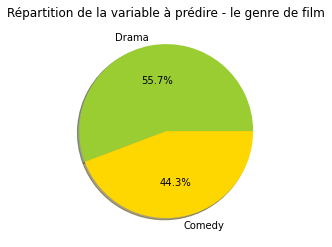

In [305]:
#Répartition de Comedy et Drama
tab_freq=df.genre.value_counts(normalize=True)


plt.pie(
    tab_freq,
    labels = tab_freq.index,
    colors=['yellowgreen', 'gold'],
    autopct='%1.1f%%',
    shadow=True,)

plt.title("Répartition de la variable à prédire - le genre de film")
plt.show()

In [306]:
#Conversion de la variable genre en binaire
df['genre'] = df['genre'].apply(lambda x: 1 if x == 'Drama'  else 0)

- Comedy = 0
- Drama = 1

In [307]:
#Nouvelle répartition
df['genre'].value_counts()

1    10154
0     8064
Name: genre, dtype: int64

In [308]:
#Changement de format vers un type catégoriel
df['genre'] = df['genre'].astype(object)

## Traitement des données textuelles

### Séparation des termes

In [309]:
#Tokenisation et spliting des variables multi-labels
#Tokenisation : séparation de chaque token en élement de liste
#Spliting : séparation de chaque terme en fonction d'un caractère
tokenization(df,"title")
tokenization(df,"description")
spliting(df,"country",", ")
spliting(df,"directors",", ")
spliting(df,"actors",", ")

### Traitement de la variable country

In [310]:
#Retirer des espaces en trop
for i in range(0,df.shape[0]) :
    if len(df.iloc[i,df.columns.get_loc('country')])==1 :
        df.iloc[i,df.columns.get_loc('country')][0]=df.iloc[i,df.columns.get_loc('country')][0].strip()

In [311]:
#Répartition par pays
print(df['country'].value_counts()) #Répartition non équilibrée

[United States]                              6343
[Italy]                                      4531
[France]                                     1305
[Great Britain]                               794
[Germany]                                     337
                                             ... 
[Chile, Argentina, Germany]                     1
[Mexico, France, Sweden]                        1
[Romania, France, Hungary]                      1
[Germany, Czechoslovakia]                       1
[Palestine, Netherlands, Germany, Mexico]       1
Name: country, Length: 1199, dtype: int64


##### Catégorisation par continent

In [312]:
#Insertion de country_groupe, une colonne de traitement pour grouper le pays
df.insert(5, "country_groupe", "")
df.insert(6, "country_groupe2", "")

In [313]:
#Liste des continents
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}

In [314]:
#La liste des pays
liste_pays=[]
for country in countries:
    liste_pays.append(country.name)

#Ajout manuel de certains pays (qui n'existe pas dans la liste countries de pycountry)
liste_pays.append("Great Britain")
liste_pays.append("Russia")
liste_pays.append("South Korea")
liste_pays.append("Iran")
liste_pays.append("Taiwan")
liste_pays.append("Venezuela")
liste_pays.append("Palestine")
liste_pays.append("Vietnam")
liste_pays.append("Laos")
liste_pays.append("Czech Republic")

In [315]:
#Création de groupe de pays
for i in range(0,df.shape[0]) :
    if len(df.iloc[i,df.columns.get_loc('country')])>1 : #Pour les films avec plusieurs pays producteurs
        df.iloc[i,df.columns.get_loc('country_groupe')]="Internationaux"
    elif df.iloc[i,df.columns.get_loc('country')][0] not in liste_pays : #Pour les pays qui n'existe pas/plus
        df.iloc[i,df.columns.get_loc('country_groupe')]="Autre"
    else : #Pour les pays classiques
        df.iloc[i,df.columns.get_loc('country_groupe')]=[continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))] for country in df.iloc[i,df.columns.get_loc('country')]]

In [316]:
#Répartition des continents des film
print(df['country_groupe'].value_counts())

Europe            7723
North America     6574
Internationaux    2788
Asia               709
Autre              150
South America      134
Australia          119
Africa              21
Name: country_groupe, dtype: int64


##### Traitement des pays "autres" de country

In [317]:
#Pays "autres"
print(df.loc[df['country_groupe']=="Autre","country"].value_counts())

[Soviet Union]            120
[Czechoslovakia]           19
[West Germany]              4
[Yugoslavia]                4
[East Germany]              2
[Mexico,United States]      1
Name: country, dtype: int64


In [318]:
#Création de liste pour traiter ces pays
pays_autres_eu=["West Germany","Czechoslovakia","Yugoslavia","East Germany"]
pays_autres_asia=["Soviet Union"]
pays_autres_multiples=["Mexico,United States"]

In [319]:
#Traitement des derniers pays "autres"
for i in range(0,df.shape[0]) :
    if df.iloc[i,df.columns.get_loc('country_groupe')]=="Autre" :
        if df.iloc[i,df.columns.get_loc('country')][0] in pays_autres_eu :
            df.iloc[i,df.columns.get_loc('country_groupe')]="Europe"
        if df.iloc[i,df.columns.get_loc('country')][0] in pays_autres_asia :
            df.iloc[i,df.columns.get_loc('country_groupe')]="Asia"
        if df.iloc[i,df.columns.get_loc('country')][0] in pays_autres_multiples :
            df.iloc[i,df.columns.get_loc('country_groupe')]="Internationaux"

In [320]:
#Vérification Pays "autres"
print(df.loc[df['country_groupe']=="Autre","country"].value_counts())
#Plus de pays considéré comme "autres"

Series([], Name: country, dtype: int64)


##### Regroupement de continent

In [321]:
#Répartition des continents des films
print(df['country_groupe'].value_counts())

Europe            7752
North America     6574
Internationaux    2789
Asia               829
South America      134
Australia          119
Africa              21
Name: country_groupe, dtype: int64


In [322]:
#Catégorie plus grosse
for i in range(0,df.shape[0]) :
    if df.iloc[i,df.columns.get_loc('country_groupe')]=="Europe" : #PAys européens
        df.iloc[i,df.columns.get_loc('country_groupe2')]="Europe"
    elif df.iloc[i,df.columns.get_loc('country_groupe')]=="North America" : #Pays Nord-américain
        df.iloc[i,df.columns.get_loc('country_groupe2')]="North America"
    else : #Reste du monde
        df.iloc[i,df.columns.get_loc('country_groupe2')]="Internationaux"

In [323]:
#Répartition des catégories des films
print(df['country_groupe2'].value_counts())

Europe            7752
North America     6574
Internationaux    3892
Name: country_groupe2, dtype: int64


In [324]:
#Création de variables dummies à partir de country_groupe2
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['country_groupe2']])

one_hot_names = ['EU','Inter','NA']
ohe_df = pd.DataFrame(transformed.toarray(), columns=one_hot_names)

In [325]:
#Jointure ohe_df avec df
df.reset_index(inplace=True)
df = df.join(ohe_df)

In [326]:
#Type des variables
df['EU'] = df['EU'].astype(object)
df['Inter'] = df['Inter'].astype(object)
df['NA'] = df['NA'].astype(object)


print(df.dtypes)

filmtv_id            int64
title               object
year                 int64
genre               object
duration             int64
country             object
country_groupe      object
country_groupe2     object
directors           object
actors              object
avg_vote           float64
critics_vote       float64
public_vote        float64
total_votes          int64
description         object
humor                int64
rhythm               int64
effort               int64
tension              int64
erotism              int64
EU                  object
Inter               object
NA                  object
dtype: object


### Création d'indicateur de sentiment pour la description

In [327]:
#Importation des dictionnaires de mots : Opinion Lexicon
positive=set(opinion_lexicon.positive())
negative=set(opinion_lexicon.negative())

In [328]:
#Dataframe d'indicateur de sentiment
sentiment_colonnes=["texte_pos","texte_neg","pos","neg","ratio_pos_neg","ton_global","classification"]
sentiment_df=pd.DataFrame(columns=sentiment_colonnes)

In [329]:
#Récupération des mots avec des sentiments (positif/négatif) dans la description
for i in range(0,df.shape[0]) :
    
    #Textes tokenisés
    texte_pos=[w for w in df.iloc[i,df.columns.get_loc('description')] if w.lower() in positive]
    texte_neg=[w for w in df.iloc[i,df.columns.get_loc('description')] if w.lower() in negative]
 
    #--Nombre de mots positifs et négatifs--
    #Avec doublons de mots
    pos=len(texte_pos)
    neg=len(texte_neg)

    #--Ratios--
    if neg==0 :
        ratio_pos_neg=pos
    else :
        ratio_pos_neg=pos/neg 
    
    #-- Ton global --
    if (pos+neg)==0 :
        ton_global=0
    else :
        ton_global=(pos-neg)/(pos+neg)
        
        
    #--Classification--
    if ton_global>0 :
        classification="positif"
    elif ton_global<0:
        classification="négatif"
    else :
        classification="neutre"
        
    sentiment_new_row=pd.DataFrame(data=np.array([[texte_pos,texte_neg,pos,neg,ratio_pos_neg,ton_global,classification]]),columns=sentiment_colonnes)
    sentiment_df = pd.concat([sentiment_df,sentiment_new_row], ignore_index=True)

<ipython-input-329-a20da9b40141>:34: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [330]:
display(sentiment_df)

texte_pos  \
0                        [love]   
1                     [passion]   
2                        [work]   
3      [lead, honor, precisely]   
4                       [great]   
...                         ...   
18213                        []   
18214                 [popular]   
18215                    [like]   
18216  [peaceful, serene, love]   
18217        [diplomatic, calm]   

                                               texte_neg pos neg  \
0                           [falls, rival, kill, afraid]   1   4   
1              [trouble, gangster, lose, problems, joke]   1   5   
2                                [useless, rumor, false]   1   3   
3      [killing, doubts, instigator, murder, dies, ki...   3   6   
4                            [criminal, ruthless, enemy]   1   3   
...                                                  ...  ..  ..   
18213                               [blow, difficulties]   0   2   
18214                    [collapse, bad, fears, revenge]   1   4   
18215                    [difficult, difficult, grudges]   1   3   
18216            [discord, despair, sadness, diabolical]   3   4   
18217                           [conflict, unexpectedly]   2   2   

      ratio_pos_neg ton_global classification  
0              0.25       -0.6        négatif  
1               0.2  -0.666667        négatif  
2          0.333333       -0.5        négatif  
3               0.5  -0.333333        négatif  
4          0.333333       -0.5        négatif  
...             ...        ...            ...  
18213           0.0       -1.0        négatif  
18214          0.25       -0.6        négatif  
18215      0.333333       -0.5        négatif  
18216          0.75  -0.142857        négatif  
18217           1.0        0.0         neutre  

[18218 rows x 7 columns]

In [331]:
df=pd.concat([df, sentiment_df], axis=1, join='inner')

### Création d'indicateur d'expérience en Comédie/drame du casting

##### Liste des acteurs

Nous créons une liste des acteurs à partir de la base.
Les codes sont passés en commentaire pour ne pas relancer l'exécution. Nous avons importé la base des acteurs (df_actors) lors de l'importation des données.

In [332]:
# df_actors = pd.DataFrame(columns = ["filmtv_id","actors","genre","year"])

In [333]:
# #Dataframe liste des acteurs (avec doublon)
# t0 = time.time()

# for i in range(0,df.shape[0]) :
#     df_actors_temp = pd.DataFrame(columns = ["filmtv_id","actors","genre","year"]) #Dataframe temporaire (liste des acteurs d'une ligne)
#     df_actors_temp["actors"]=[x for x in df.iloc[i,df.columns.get_loc("actors")]]
#     df_actors_temp["filmtv_id"]=df.iloc[i,df.columns.get_loc("filmtv_id")]
#     df_actors_temp["genre"]=df.iloc[i,df.columns.get_loc("genre")]
#     df_actors_temp["year"]=df.iloc[i,df.columns.get_loc("year")]

#     #Ajout des acteurs du df temporaire au df global
#     df_actors=df_actors.append(df_actors_temp,ignore_index=True)
    
# t1 = time.time()
# print("{} s".format(t1 - t0))

116 064 acteurs dans 17 343 films, soit une moyenne de 6,69 acteurs par film.
50 754 acteurs différents dans la base

##### Comptage du nombre de comédie/drame dans lesquels a joué l'acteur avant

In [334]:
# #Insertion des compteurs de comedy et drama (avant la sortie du dit film)
# df_actors.insert(4, "nb_comedy", "")
# df_actors.insert(5, "nb_drama", "")

In [335]:
# #Compteur du nombre de films joué par acteurs
# t0 = time.time()

# for i in range(0,df_actors.shape[0]) :
#     #Compteur des Comedy
#     df_actors.iloc[i,df_actors.columns.get_loc("nb_comedy")]=len(df_actors[(df_actors["actors"]==df_actors.iloc[i,df_actors.columns.get_loc("actors")]) & (df_actors["year"]<df_actors.iloc[i,df_actors.columns.get_loc("year")]) & (df_actors["genre"]==0)])
    
#     #Compteur des Drama
#     df_actors.iloc[i,df_actors.columns.get_loc("nb_drama")]=len(df_actors[(df_actors["actors"]==df_actors.iloc[i,df_actors.columns.get_loc("actors")]) & (df_actors["year"]<df_actors.iloc[i,df_actors.columns.get_loc("year")]) & (df_actors["genre"]==1)])
    
# t1 = time.time()
# print("{} s".format(t1 - t0))

In [336]:
# #Conversion nb_comedy/nb_drama
# df_actors[["nb_comedy","nb_drama"]]=df_actors[["nb_comedy","nb_drama"]].astype(int)

In [337]:
# #Export de la base
# df_actors.to_csv('actors.csv')

##### Calcul des indicateurs dans la base des films

In [338]:
#Groupby par filmtv_id
df_actors_concat=df_actors[["filmtv_id","nb_comedy","nb_drama"]].groupby("filmtv_id").sum()

In [339]:
#Merge de la base et de la liste des acteurs
df=df.merge(df_actors_concat,on="filmtv_id", how='inner')

In [340]:
#Création d'indicateur
df['per_comedy_casting']=df['nb_comedy']/(df['nb_comedy']+df['nb_drama']) #Pourcentage de comédie dans lequel le casting à déjà joué (par rapport au total comédie et drama)
df['xp_casting']=df['nb_comedy']+df['nb_drama'] #Nombre de film d'expérience de l'ensemble du casting

In [341]:
#Traitement des NA (si les acteurs n'ont pas d'expérience, alors division par 0 -> NA)
df["per_comedy_casting"]=df["per_comedy_casting"].fillna(0.5) #On remplace par 0.5 car le juste milieu

In [342]:
df.head(5)

filmtv_id                                    title  year genre  duration  \
0          3          [18, anni, tra, una, settimana]  1991     1        98   
1         18                                  [Diner]  1982     0        95   
2         20  [A, che, servono, questi, quattrini, ?]  1942     0        85   
3         22                   [A, ciascuno, il, suo]  1967     1        93   
4         26                       [At, Close, Range]  1986     1       115   

           country country_groupe country_groupe2         directors  \
0          [Italy]         Europe          Europe   [Luigi Perelli]   
1  [United States]  North America   North America  [Barry Levinson]   
2          [Italy]         Europe          Europe  [Esodo Pratelli]   
3          [Italy]         Europe          Europe      [Elio Petri]   
4  [United States]  North America   North America     [James Foley]   

                                              actors  ...  \
0  [Kim Rossi Stuart, Simona Cavallari, Ennio Fan...  ...   
1  [Mickey Rourke, Steve Guttenberg, Ellen Barkin...  ...   
2  [Eduardo De Filippo, Peppino De Filippo, Cleli...  ...   
3  [Gian Maria VolontÃ©, Irene Papas, Gabriele Fe...  ...   
4  [Christopher Walken, Sean Penn, Chris Penn, Ma...  ...   

                                           texte_neg  pos  neg  ratio_pos_neg  \
0                       [falls, rival, kill, afraid]    1    4           0.25   
1          [trouble, gangster, lose, problems, joke]    1    5            0.2   
2                            [useless, rumor, false]    1    3       0.333333   
3  [killing, doubts, instigator, murder, dies, ki...    3    6            0.5   
4                        [criminal, ruthless, enemy]    1    3       0.333333   

  ton_global  classification  nb_comedy  nb_drama  per_comedy_casting  \
0       -0.6         négatif          3        11            0.214286   
1  -0.666667         négatif          2         1            0.666667   
2       -0.5         négatif         11         1            0.916667   
3  -0.333333         négatif         24        29            0.452830   
4       -0.5         négatif          9        12            0.428571   

   xp_casting  
0          14  
1           3  
2          12  
3          53  
4          21  

[5 rows x 34 columns]

#### Création d'indicateur d'expérience en Comédie/drame du directeur

##### Liste des directeurs

Nous créons une liste des directeurs à partir de la base.
Les codes sont passés en commentaire pour ne pas relancer l'exécution. Nous avons importé la base des directeurs (df_directors) lors de l'importation des données.

In [343]:
# df_directors = pd.DataFrame(columns = ["filmtv_id","directors","genre","year"])

In [344]:
# #Dataframe liste des acteurs (avec doublon)
# t0 = time.time()

# for i in range(0,df.shape[0]) :
#     df_directors_temp = pd.DataFrame(columns = ["filmtv_id","directors","genre","year"]) #Dataframe temporaire (liste des acteurs d'une ligne)
#     df_directors_temp["directors"]=[x for x in df.iloc[i,df.columns.get_loc("directors")]]
#     df_directors_temp["filmtv_id"]=df.iloc[i,df.columns.get_loc("filmtv_id")]
#     df_directors_temp["genre"]=df.iloc[i,df.columns.get_loc("genre")]
#     df_directors_temp["year"]=df.iloc[i,df.columns.get_loc("year")]

#     #Ajout des acteurs du df temporaire au df global
#     df_directors=df_directors.append(df_directors_temp,ignore_index=True)
    
# t1 = time.time()
# print("{} s".format(t1 - t0))

19152 réalisateurs dans 17 343 films, soit une moyenne de 1,05 réalisateurs par film.
7372 réalisateurs différents dans la base

##### Comptage du nombre de comédie/drame que le directeur a réalisé avant

In [345]:
# #Insertion des compteurs de comedy et drama (avant la sortie du dit film)
# df_directors.insert(4, "nb_comedy_real", "")
# df_directors.insert(5, "nb_drama_real", "")

In [346]:
# #Compteur du nombre de films joué par acteurs
# t0 = time.time()

# for i in range(0,df_directors.shape[0]) :
#     #Compteur des Comedy
#     df_directors.iloc[i,df_directors.columns.get_loc("nb_comedy_real")]=len(df_directors[(df_directors["directors"]==df_directors.iloc[i,df_directors.columns.get_loc("directors")]) & (df_directors["year"]<df_directors.iloc[i,df_directors.columns.get_loc("year")]) & (df_directors["genre"]==0)])
    
#     #Compteur des Drama
#     df_directors.iloc[i,df_directors.columns.get_loc("nb_drama_real")]=len(df_directors[(df_directors["directors"]==df_directors.iloc[i,df_directors.columns.get_loc("directors")]) & (df_directors["year"]<df_directors.iloc[i,df_directors.columns.get_loc("year")]) & (df_directors["genre"]==1)])
    
# t1 = time.time()
# print("{} s".format(t1 - t0))

In [347]:
# #Conversion nb_comedy/nb_drama
# df_directors[["nb_comedy_real","nb_drama_real"]]=df_directors[["nb_comedy_real","nb_drama_real"]].astype(int)

In [348]:
# #Export de la base
# df_directors.to_csv('directors.csv')

##### Calcul des indicateurs dans la base des films

In [349]:
#Groupby par filmtv_id
df_directors_concat=df_directors[["filmtv_id","nb_comedy_real","nb_drama_real"]].groupby("filmtv_id").sum()

In [350]:
#Merge entre la base et la liste des directeurs
df=df.merge(df_directors_concat,on="filmtv_id", how='inner')

In [351]:
#Création d'indicateur
df['per_comedy_real']=df['nb_comedy_real']/(df['nb_comedy_real']+df['nb_drama_real']) #Pourcentage de comédie dans lequel le casting à déjà joué (par rapport au total comédie et drama)
df['xp_real']=df['nb_comedy_real']+df['nb_drama_real'] #Nombre de film d'expérience de l'ensemble du casting

In [352]:
#Traitement des NA (si le directeur n'a pas d'expérience, alors division par 0 -> NA)
df["per_comedy_real"]=df["per_comedy_real"].fillna(0.5)

#### Conversion de variables

In [353]:
display(df.head(5))

filmtv_id                                    title  year genre  duration  \
0          3          [18, anni, tra, una, settimana]  1991     1        98   
1         18                                  [Diner]  1982     0        95   
2         20  [A, che, servono, questi, quattrini, ?]  1942     0        85   
3         22                   [A, ciascuno, il, suo]  1967     1        93   
4         26                       [At, Close, Range]  1986     1       115   

           country country_groupe country_groupe2         directors  \
0          [Italy]         Europe          Europe   [Luigi Perelli]   
1  [United States]  North America   North America  [Barry Levinson]   
2          [Italy]         Europe          Europe  [Esodo Pratelli]   
3          [Italy]         Europe          Europe      [Elio Petri]   
4  [United States]  North America   North America     [James Foley]   

                                              actors  ...  ton_global  \
0  [Kim Rossi Stuart, Simona Cavallari, Ennio Fan...  ...        -0.6   
1  [Mickey Rourke, Steve Guttenberg, Ellen Barkin...  ...   -0.666667   
2  [Eduardo De Filippo, Peppino De Filippo, Cleli...  ...        -0.5   
3  [Gian Maria VolontÃ©, Irene Papas, Gabriele Fe...  ...   -0.333333   
4  [Christopher Walken, Sean Penn, Chris Penn, Ma...  ...        -0.5   

   classification  nb_comedy  nb_drama per_comedy_casting  xp_casting  \
0         négatif          3        11           0.214286          14   
1         négatif          2         1           0.666667           3   
2         négatif         11         1           0.916667          12   
3         négatif         24        29           0.452830          53   
4         négatif          9        12           0.428571          21   

   nb_comedy_real  nb_drama_real  per_comedy_real  xp_real  
0               0              0             0.50        0  
1               0              0             0.50        0  
2               1              1             0.50        2  
3               1              3             0.25        4  
4               0              1             0.00        1  

[5 rows x 38 columns]

In [354]:
#Vérification du format des variables
df['ton_global'] = df['ton_global'].astype(float)
df['public_vote'] = df['public_vote'].astype(int)

print(df.dtypes)

filmtv_id               int64
title                  object
year                    int64
genre                  object
duration                int64
country                object
country_groupe         object
country_groupe2        object
directors              object
actors                 object
avg_vote              float64
critics_vote          float64
public_vote             int32
total_votes             int64
description            object
humor                   int64
rhythm                  int64
effort                  int64
tension                 int64
erotism                 int64
EU                     object
Inter                  object
NA                     object
texte_pos              object
texte_neg              object
pos                    object
neg                    object
ratio_pos_neg          object
ton_global            float64
classification         object
nb_comedy               int64
nb_drama                int64
per_comedy_casting    float64
xp_casting

In [355]:
#Segmentation des variables par type (pour automatiser des traitements)
col_quali=df.select_dtypes(include=['object']).columns.tolist()
col_quanti=df.select_dtypes(include=['float64','int64','int32']).columns.tolist()

## Traitement des données quantitatives

À présent, nous avons notre base de données complète avec les indicateurs que nous avons créés. Dans un premier temps, nous allons nous intéresser aux statistiques descriptives simples concernant les variables quantitatives afin de déceler de potentielles anomalies.

In [356]:
#Statistiques descriptives
df.describe()

filmtv_id          year      duration      avg_vote  critics_vote  \
count   18218.000000  18218.000000  18218.000000  18218.000000  18218.000000   
mean    46495.245636   1991.604512    102.294324      5.988846      5.891996   
std     51640.396532     23.671274     23.794390      1.352404      1.577184   
min         3.000000   1914.000000     41.000000      1.000000      1.000000   
25%     12892.250000   1975.000000     90.000000      5.100000      4.860000   
50%     26889.500000   1998.000000     99.000000      6.100000      6.000000   
75%     53083.750000   2011.000000    110.000000      7.000000      7.000000   
max    218353.000000   2023.000000    924.000000      9.800000     10.000000   

        public_vote   total_votes         humor        rhythm        effort  \
count  18218.000000  18218.000000  18218.000000  18218.000000  18218.000000   
mean       6.115874     39.470139      0.837139      1.553354      0.913327   
std        1.427780     65.241563      1.015600      1.057356      1.224804   
min        1.000000      2.000000      0.000000      0.000000      0.000000   
25%        5.000000      6.000000      0.000000      0.000000      0.000000   
50%        6.000000     16.000000      0.000000      2.000000      0.000000   
75%        7.000000     43.000000      2.000000      2.000000      2.000000   
max       10.000000    928.000000      5.000000      5.000000      5.000000   

       ...       erotism    ton_global     nb_comedy      nb_drama  \
count  ...  18218.000000  18218.000000  18218.000000  18218.000000   
mean   ...      0.420957     -0.131325     17.136294     12.851466   
std    ...      0.717670      0.541266     26.240798     15.566022   
min    ...      0.000000     -1.000000      0.000000      0.000000   
25%    ...      0.000000     -0.500000      1.000000      2.000000   
50%    ...      0.000000     -0.142857      8.000000      8.000000   
75%    ...      1.000000      0.200000     21.000000     18.000000   
max    ...      4.000000      1.000000    345.000000    209.000000   

       per_comedy_casting    xp_casting  nb_comedy_real  nb_drama_real  \
count        18218.000000  18218.000000    18218.000000   18218.000000   
mean             0.486440     29.987759        2.037984       1.635800   
std              0.262406     36.386128        5.338432       3.189729   
min              0.000000      0.000000        0.000000       0.000000   
25%              0.322034      5.000000        0.000000       0.000000   
50%              0.500000     18.000000        0.000000       0.000000   
75%              0.666667     41.000000        2.000000       2.000000   
max              1.000000    400.000000       79.000000      69.000000   

       per_comedy_real       xp_real  
count     18218.000000  18218.000000  
mean          0.487572      3.673784  
std           0.330978      6.665200  
min           0.000000      0.000000  
25%           0.250000      0.000000  
50%           0.500000      1.000000  
75%           0.666667      4.000000  
max           1.000000     89.000000  

[8 rows x 21 columns]

Grâce au tableau ci-dessus, nous avons différentes informations sur la distribution des valeurs pour chaque variable, ce qui va nous aider à davantage comprendre les variables présentes dans notre base et à donner une première analyse sur elles.

La première variable du tableau, filmtv_id, correspond aux identifiants donnés à chaque film dans la base de données que nous avons récupéré initialement. Elle n'est pas pertinente, nous la supprimerons donc de notre base. Egalement, nous avons créé différents indicateurs de sentiments : pos, neg, ratio_pos_neg et ton_global. Nous allons conserver uniquement l'indicateur ton_global qui permet de donner une indication générale sur les sentiments, positifs ou négatifs, qui ressortent sur la description des films. Les 3 autres indicateurs nous permettent de construire ton_global, il n'est pas pertinent de les garder car, cela pourrait conduire à de la mulcolinéarité entre ces variables. L'indicateur ton_global est compris entre 1, qui correspond à une description uniquement avec des sentiments positifs, et -1 (-0.131334 pour notre échantillon) qui indiquent une description de film avec uniquement des sentiments négatifs.

Revenons à l'analyse de nos variables avec les informations données par ce tableau. Nous accordons une attention particulière aux variables qui ont des distributions de valeurs très grande, car cela pourrait indiquer la présence potentielle de valeurs atypiques. Pour la variable year, nous constatons que la valeur minimum est assez éloignée de la valeur du 1er quartile. De plus, l'écart-type est relativement élevé. Nous soupçonnons  certainement valeurs, notamment dans les premières valeurs, d'être atypiques. À l'inverse, nous remarquons pour la variable duration qu'il y a un grand écart entre la valeur du 3ème quartile qui de 110 minutes et celle de la valeur maximale qui est à 924 minutes (un film de 924 minutes correspond à environ 15H30 de visionnage). De plus, nous voyons qu'il a y un écart relativement important entre la valeur minimale et le 1er quartile. Nous pensons donc que cette variable contient elle aussi des valeurs atypiques. Cependant, les valeurs maximales et minimales pour cette variable nous ont poussés à faire des recherches sur les films que notre base de données contient. Nous avons réalisé que notre base prenait en compte des mini-séries et la durée correspond à la durée totale de tous les épisodes réunis (ce qui est le cas pour la mini-série DONNER NOM par exemple), ce qui explique la durée de certains films soit très élevée ou faible (pour ceux qui correspondent qu'à un seul épisode). Il sera donc nécessaire, en plus de vérifier l'atypicité de certaines valeurs, d'imposer des filtres plafond et planché afin que nous gardions uniquement les films et non les mini-séries.

Nous remarquons qu'il y a aussi des écarts importants entre le 3ème quartile et la valeur maximale pour la variable total_votes et erotism. Pour la variable total_votes, nous voyons également que nous avons un écart-type élevé et une différence relativement importante entre la médiane et la moyenne. Nous soupçonnons donc ces variables de posséder des valeurs atypiques.

Pour confirmer les éléments que nous venons de mettre en avant, nous allons réaliser des histogrammes pour ces variables afin de mieux visualiser la distribution des valeurs.

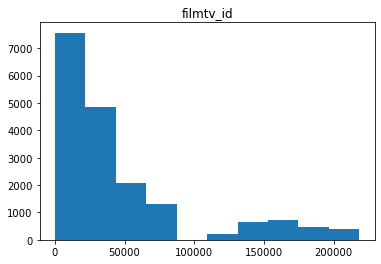

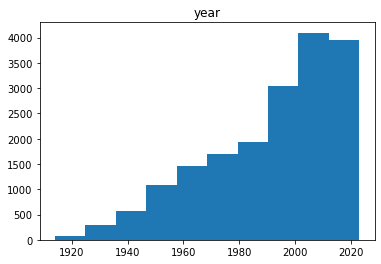

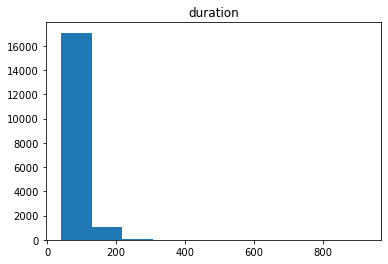

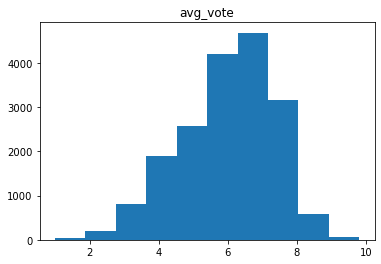

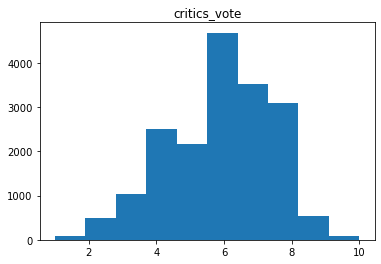

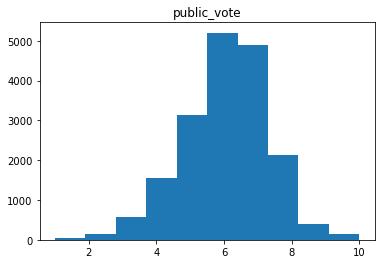

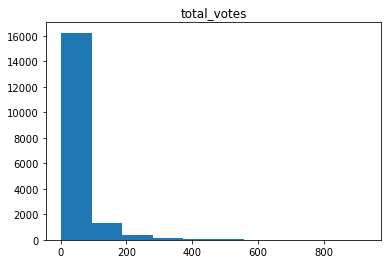

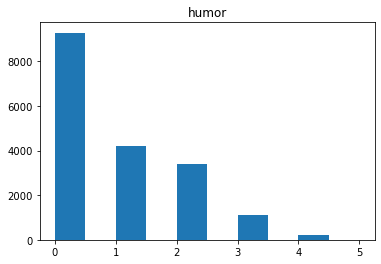

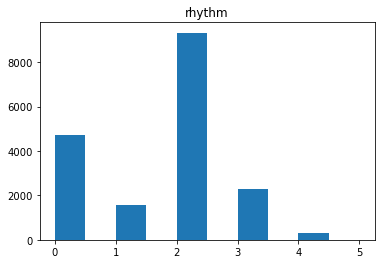

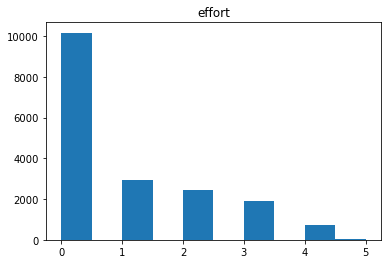

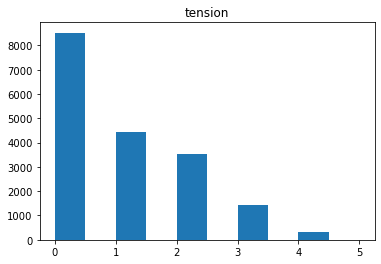

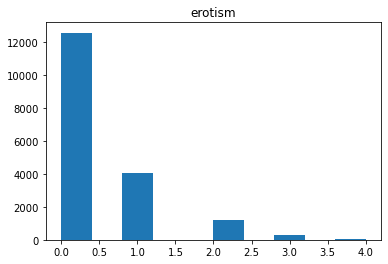

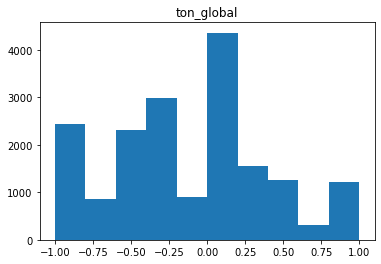

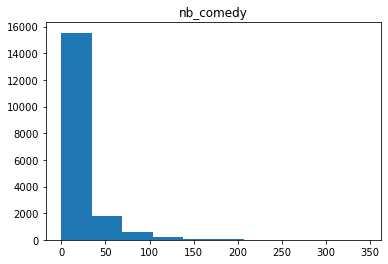

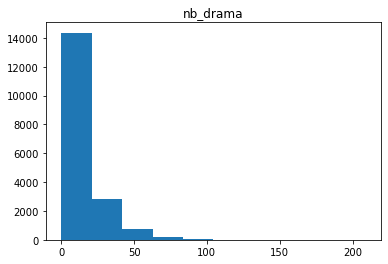

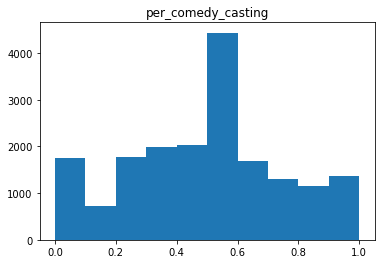

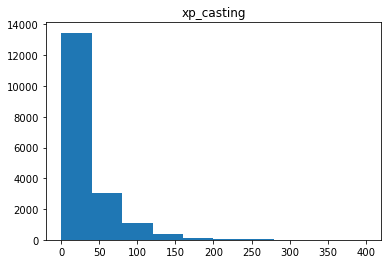

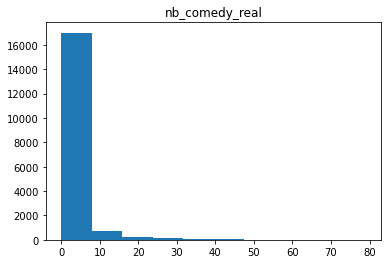

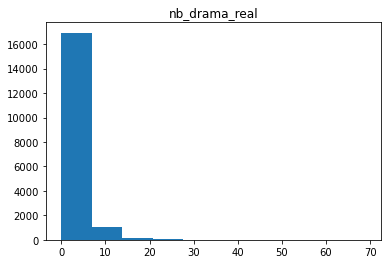

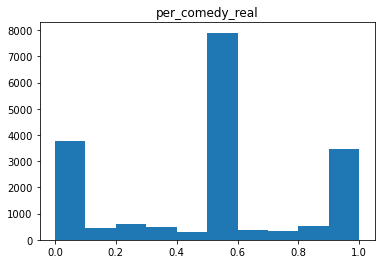

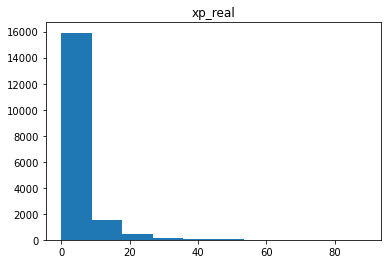

In [357]:
#Histogramme
histo(df)

Grâce aux histogrammes réalisés ci-dessus, nous pouvons visualiser plus facilement la distribution de valeurs au sein de nos variables quantitatives. Cela nous permet de confirmer certains points évoqués précédemment. <br>
En effet, nous voyons pour la variable year que nous avons peu de films réalisés dans les premières années de notre échantillon, et une forte concentration des films vers la fin de l'échantillon. Puis, pour la variable duration, nous voyons nettement une symétrie à gauche concernant la distribution dans l'échantillon, ce qui signifie que la majorité des films sont répartis entre 41 minutes et environ 150 minutes. Entre environ 150 et un peu plus de 200 minutes, nous avons un petit nombre de films, et au-delà, nous avons très peu de films jusqu'à la valeur maximale. Nous remarquons la même forme de distribution pour les variables erotism, total_votes, la majeur partie des valeurs sont réunies à gauche et nous avons peu d'observations vers les valeurs maximales.

Nous allons vérifier, que ce soit pour les variables où nous avons relevé des anomalies et les autres, la présence de valeurs atypiques grâce aux boxplots.

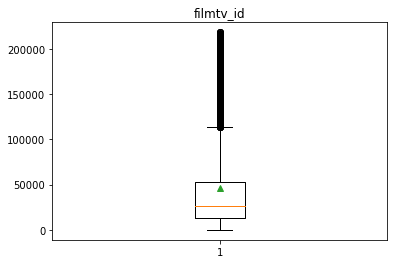

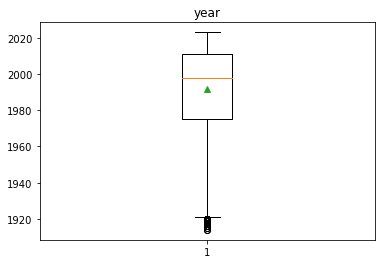

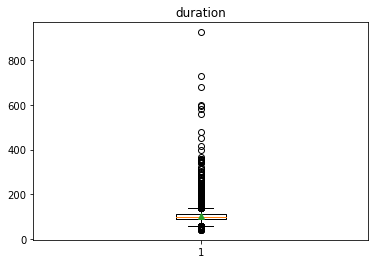

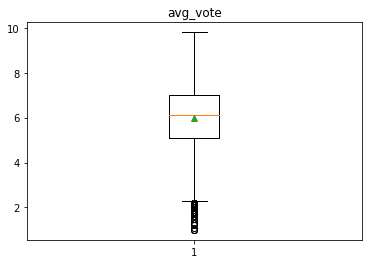

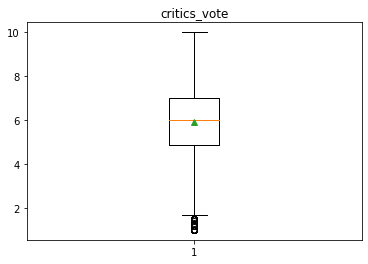

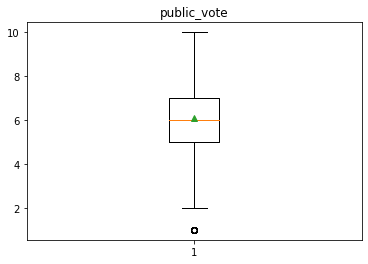

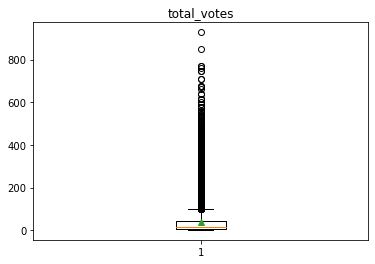

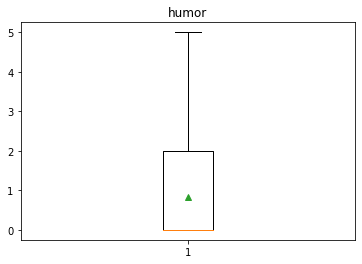

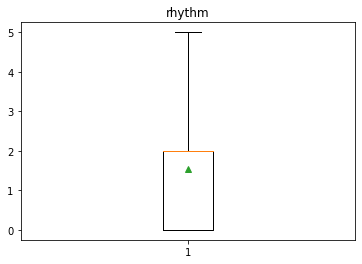

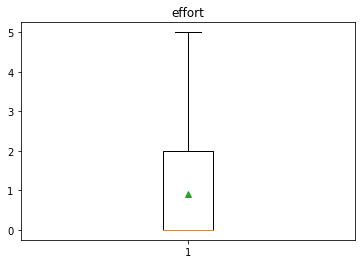

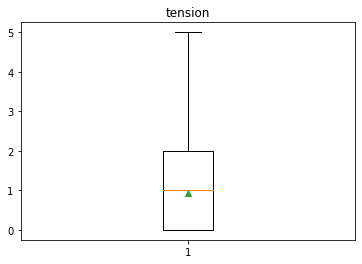

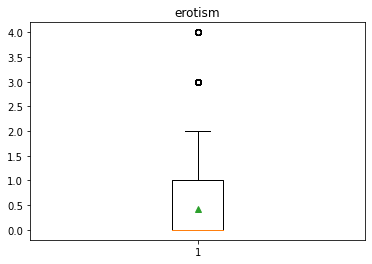

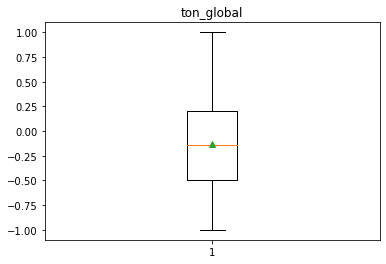

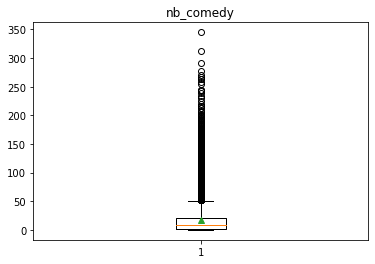

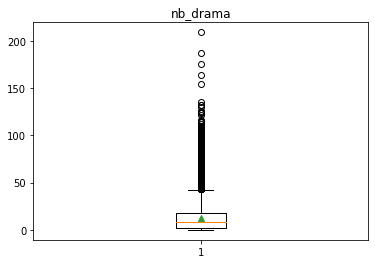

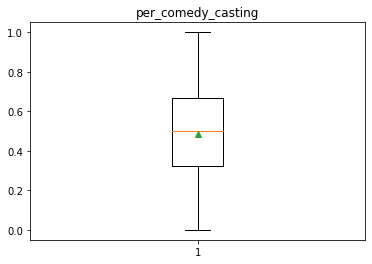

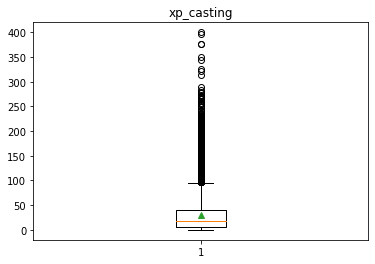

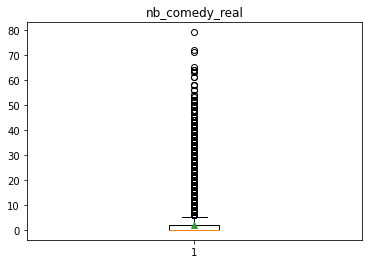

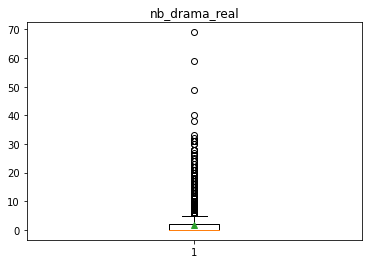

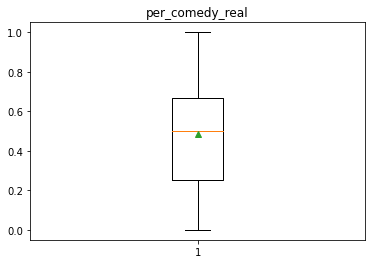

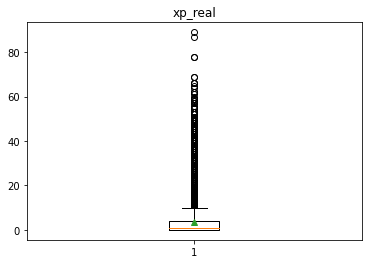

In [358]:
#Boxplot
boxplot1(df)

Nous voyons pour les variables ***years***, ***avg_vote***, ***critics_vote***, ***total_votes*** et ***erotims*** que nous avons effectivement des valeurs suspectées d'être atypiques à la fin de la distribution de valeurs. Pour la variable ***public_vote***, nous avons une seule valeur potentiellement atypique. Nous allons par la suite appliquer le test ESD qui nous permettra de savoir ces valeurs suspectées d'être atypiques le sont réellement.

Enfin, concernant la variable ***duration***, nous avons à la fois des valeurs suspectées d'être atypiques vers le haut et le bas. Comme nous l'avons évoqué précédemment, nous devons appliquer un filtre minimum afin de ne garder que les longs-métrages, et non les courts. Pour cela, nous avons regardé la distinction proposée par le Centre national du cinéma et de l'image animée (CNC) entre les longs-métrages, et les courts-métrages qui ne font pas partie de notre étude. Le CNC considère qu'un long-métrage est caractérisé par une durée minimum de 60 minutes. Les courts-métrages n'étant pas pris en compte dans notre étude, nous pouvons ainsi mettre un filtre afin de garder que les longs-métrages, ce qui équivaut à mettre un filtre avec une valeur minimum de 60 minutes (duration >= 60).


In [359]:
#Elimination des courts-métrages
df=df[df['duration']>=60]

À présent que ce filtre est appliqué, nous pouvons de nouveau regarder si nous avons toujours des valeurs suspectées d'être atypiques vers le bas.

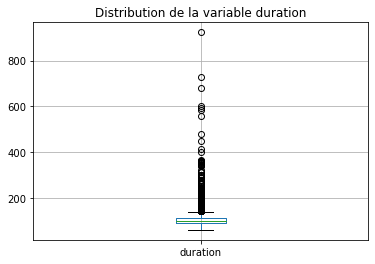

In [360]:
#Boxplot pour vérifier les valeurs atypiques vers le bas
df[['duration']].boxplot()
plt.title("Distribution de la variable duration")
plt.show()

Également, nous cherchons à savoir combien d'observations sont suspectées d'être atypiques pour chacune de variables.

**Variable avec des valeurs potentiellement atypiques :** <br>

In [361]:
for i in col_quanti :
    borne_boxplot(df,i)
    print("")

La variable filmtv_id a potentiellement 2412 valeurs atypiques
Les bornes sont les suivantes : <= - ; >= 113506

La variable year a potentiellement 10 valeurs atypiques
Les bornes sont les suivantes : <= 1923 ; >= -

La variable duration a potentiellement 109 valeurs atypiques
Les bornes sont les suivantes : <= - ; >= 141

La variable avg_vote a potentiellement 12 valeurs atypiques
Les bornes sont les suivantes : <= 2.2 ; >= -

La variable critics_vote a potentiellement 6 valeurs atypiques
Les bornes sont les suivantes : <= 1.5 ; >= -

La variable public_vote a potentiellement 1 valeurs atypiques
Les bornes sont les suivantes : <= 1 ; >= -

La variable total_votes a potentiellement 358 valeurs atypiques
Les bornes sont les suivantes : <= - ; >= 99

La variable humor n'a pas de valeur atypique

La variable rhythm n'a pas de valeur atypique

La variable effort n'a pas de valeur atypique

La variable tension n'a pas de valeur atypique

La variable erotism a potentiellement 2 valeurs atypi

Nous voyons pour la variable ***years*** par exemple, que nous avons 10 valeurs potentiellement atypiques. Cela nous permet de savoir combien de valeurs, nous risquons de perdre dans notre échantillon.

### Traitement des valeurs atypiques

In [362]:
for i in col_quanti :
    print('\033[1m'+ "---"+i+"---"+'\033[0m')
    ESD_Test(df[i] , 0.05, 200)
    print("")

---filmtv_id---
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -

---year---
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -

---duration---
Nombre de valeurs atypiques : 200
Valeur atypique seuil : 178
178 is an outlier. G > G-critical: 4.9514 > 4.6843 

Veuillez augmenter le nombre d'outlier max par sécurité

---avg_vote---
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -

---critics_vote---
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -

---public_vote---
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -

---total_votes---
Nombre de valeurs atypiques : 200
Valeur atypique seuil : 317
317 is an outlier. G > G-critical: 5.7590 > 4.6843 

Veuillez augmenter le nombre d'outlier max par sécurité

---humor---
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -

---rhythm---
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -

---effort---
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -

---tension---
Nombre de valeurs at

In [363]:
#On augmente la valeur de max_outlier pour 2 variables
ESD_Test(df["total_votes"] , 0.05, 700)
ESD_Test(df["duration"] , 0.05, 300)
ESD_Test(df["xp_real"] , 0.05, 600)

Nombre de valeurs atypiques : 519
Valeur atypique seuil : 214
214 is an outlier. G > G-critical: 4.6840 > 4.6805 

Nombre de valeurs atypiques : 215
Valeur atypique seuil : 173
173 is an outlier. G > G-critical: 4.6889 > 4.6841 

Nombre de valeurs atypiques : 460
Valeur atypique seuil : 22
22 is an outlier. G > G-critical: 4.6835 > 4.6808 



22

Le test ESD nous permet de confirmer que les variables ***duration***, ***total_votes*** et ***erotims*** ont des valeurs atypiques. Les autres variables où nous avions repéré des valeurs potentiellement anormales ne se sont pas avérées atypiques.

Pour la variable ***duration***, le test nous indique qu'au-delà de 173 minutes, les observations sont atypiques. Ainsi, nous appliquerons un filtre permettant de garder les fils avec une durée inférieure à 173 minutes, ce qui nous fera perdre 215 films.

Puis, pour la variable ***total_votes***, au-delà de 214 votes pour un film, l'observation est considérée comme atypique dans notre échantillon. Nous imposerons un filtre pour conserver uniquement les films avec un nombre de votes inférieur à 214, et nous perdrons 519 observations.

Enfin, nous constatons pour la variable ***erotims*** que la valeur de 4 est considérée comme atypique. Nous appliquerons donc un filtre nous permettant de garder uniquement les notes d'érotisme inférieures à un 4, ainsi, nous perdrons 48 individus.

In [364]:
df["xp_real"].value_counts()

0     6969
1     2837
2     1724
3     1210
4      941
      ... 
60       1
89       1
61       1
65       1
64       1
Name: xp_real, Length: 69, dtype: int64

La **variable xp_real** du nombre de films par réalisateur possède environ 460 outliers.

De plus, il y a 6 969 films avec un réalisateur débutant (pas de film à son actif).

Par ailleurs, la sélection des variables (plus bas) nous a indiqué que la variable est sélectionnée parmi les dernières positions (donc qu'elle n'apporte que peu d'information supplémentaire)


Ces 3 éléments nous confortent à ne pas sélectionner cette variable.

In [365]:
#Modification de la base
df=df[df['total_votes'] < 213]
df=df[df['erotism'] <4 ]
df=df[df['duration'] < 173 ]
df=df[df['xp_casting'] < 181 ]

In [366]:
df.shape

(17227, 38)

Nous arrivons à une base finale composée de 17 227 films et 38 variables. <br>

### Base pour les statistiques descriptives

Nous réduisons le nombre de variables pour ne garder que celles exploitables.

In [367]:
#Base pour les statistiques descriptives
df2=df[["genre","year","duration","avg_vote","critics_vote","public_vote","total_votes","humor","rhythm","effort","tension","erotism","ton_global","per_comedy_casting","xp_casting","per_comedy_real","EU","NA","Inter"]]

In [368]:
df2.dtypes

genre                  object
year                    int64
duration                int64
avg_vote              float64
critics_vote          float64
public_vote             int32
total_votes             int64
humor                   int64
rhythm                  int64
effort                  int64
tension                 int64
erotism                 int64
ton_global            float64
per_comedy_casting    float64
xp_casting              int64
per_comedy_real       float64
EU                     object
NA                     object
Inter                  object
dtype: object

In [370]:
display(df2)

genre  year  duration  avg_vote  critics_vote  public_vote  total_votes  \
0         1  1991        98       6.5          6.00            7            4   
1         0  1982        95       7.0          8.00            6           18   
2         0  1942        85       5.9          5.33            7           15   
3         1  1967        93       7.6          7.71            7          136   
4         1  1986       115       7.5          7.64            7           86   
...     ...   ...       ...       ...           ...          ...          ...   
18213     1  2022        92       7.4          7.50            7           17   
18214     0  2022       118       5.6          5.50            6           12   
18215     1  2022       116       7.1          7.00            7            6   
18216     1  1986        84       6.8          6.50            7            3   
18217     0  2022       130       4.4          4.25            5            6   

       humor  rhythm  effort  tension  erotism  ton_global  \
0          0       2       0        2        0   -0.600000   
1          2       2       0        1        2   -0.666667   
2          3       1       1        0        0   -0.500000   
3          0       2       3        3        1   -0.333333   
4          0       2       1        2        1   -0.500000   
...      ...     ...     ...      ...      ...         ...   
18213      0       0       0        0        0   -1.000000   
18214      0       0       0        0        0   -0.600000   
18215      0       1       1        1        0   -0.500000   
18216      0       0       0        0        0   -0.142857   
18217      1       1       1        0        0    0.000000   

       per_comedy_casting  xp_casting  per_comedy_real   EU   NA Inter  
0                0.214286          14         0.500000  1.0  0.0   0.0  
1                0.666667           3         0.500000  0.0  1.0   0.0  
2                0.916667          12         0.500000  1.0  0.0   0.0  
3                0.452830          53         0.250000  1.0  0.0   0.0  
4                0.428571          21         0.000000  0.0  1.0   0.0  
...                   ...         ...              ...  ...  ...   ...  
18213            0.360000          25         0.500000  0.0  1.0   0.0  
18214            0.300000          10         0.500000  0.0  1.0   0.0  
18215            0.352941          68         0.000000  1.0  0.0   0.0  
18216            0.000000           2         0.500000  1.0  0.0   0.0  
18217            0.746479         142         0.833333  1.0  0.0   0.0  

[17227 rows x 19 columns]

In [99]:
#Segmentation des variables par type (pour automatiser des traitements)
var_quali=df2.select_dtypes(include=['object']).columns.tolist()[-3:]
var_quanti=df2.select_dtypes(include=['float64','int64','int32']).columns.tolist()
target=df2["genre"]

# Statistiques descriptives

## Statistiques univariées

### Variables quantitatives

In [100]:
#Summary
df2[var_quanti].describe()

year      duration      avg_vote  critics_vote   public_vote  \
count  17227.000000  17227.000000  17227.000000  17227.000000  17227.000000   
mean    1991.537993    100.573344      5.942445      5.843818      6.072270   
std       23.688394     15.074786      1.337790      1.563815      1.421808   
min     1914.000000     60.000000      1.000000      1.000000      1.000000   
25%     1975.000000     90.000000      5.000000      4.750000      5.000000   
50%     1998.000000     98.000000      6.100000      6.000000      6.000000   
75%     2011.000000    108.000000      7.000000      7.000000      7.000000   
max     2023.000000    172.000000      9.600000     10.000000     10.000000   

        total_votes         humor        rhythm        effort       tension  \
count  17227.000000  17227.000000  17227.000000  17227.000000  17227.000000   
mean      30.836129      0.814709      1.530272      0.860452      0.902363   
std       38.748597      0.996061      1.043881      1.189141      1.036817   
min        2.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      0.000000      0.000000      0.000000      0.000000   
50%       15.000000      0.000000      2.000000      0.000000      1.000000   
75%       39.000000      2.000000      2.000000      2.000000      2.000000   
max      212.000000      5.000000      5.000000      5.000000      5.000000   

            erotism    ton_global  per_comedy_casting    xp_casting  \
count  17227.000000  17227.000000        17227.000000  17227.000000   
mean       0.403262     -0.131024            0.486220     28.173391   
std        0.690010      0.541438            0.262822     32.061834   
min        0.000000     -1.000000            0.000000      0.000000   
25%        0.000000     -0.500000            0.321429      5.000000   
50%        0.000000     -0.142857            0.500000     17.000000   
75%        1.000000      0.200000            0.666667     40.000000   
max        3.000000      1.000000            1.000000    180.000000   

       per_comedy_real  
count     17227.000000  
mean          0.488682  
std           0.328161  
min           0.000000  
25%           0.250000  
50%           0.500000  
75%           0.666667  
max           1.000000

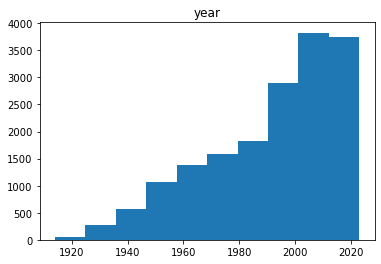

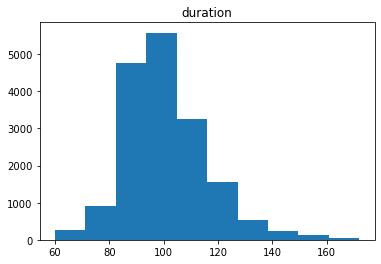

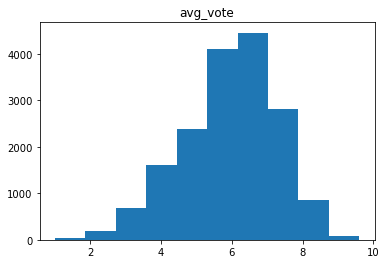

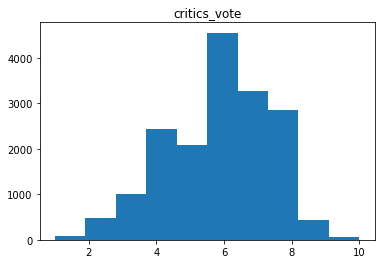

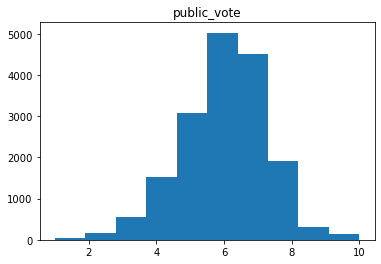

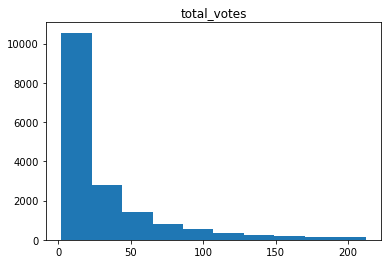

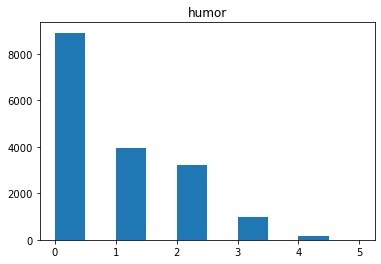

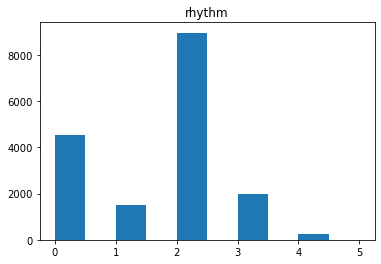

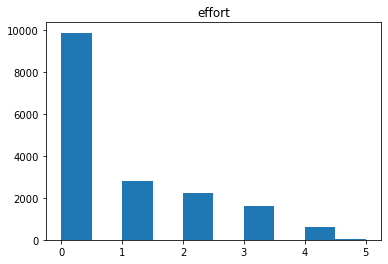

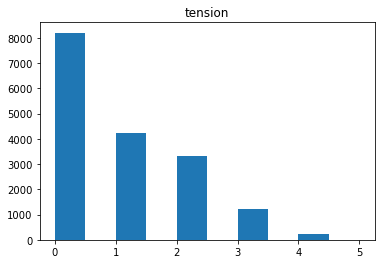

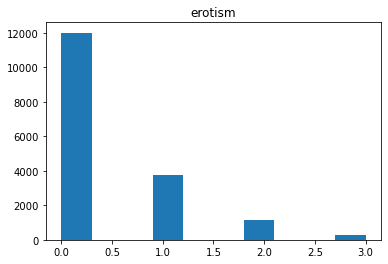

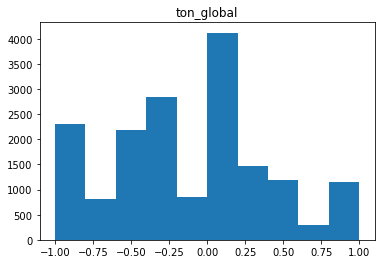

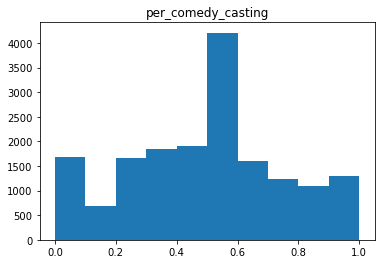

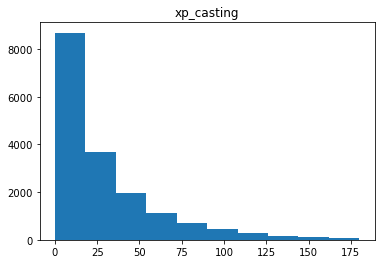

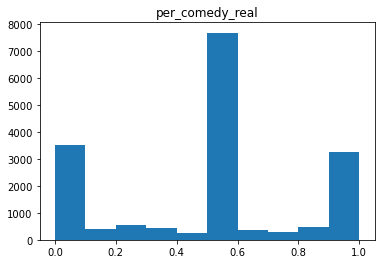

In [101]:
#histogramme
histo(df2)

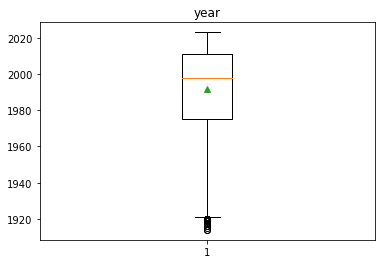

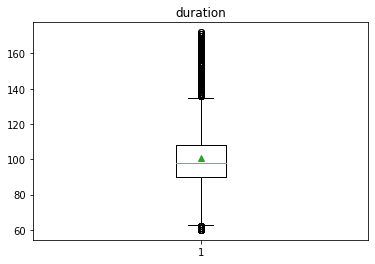

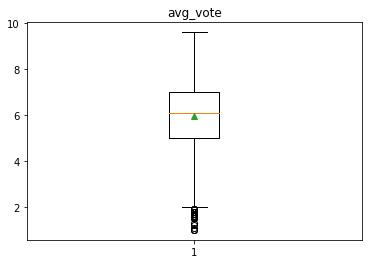

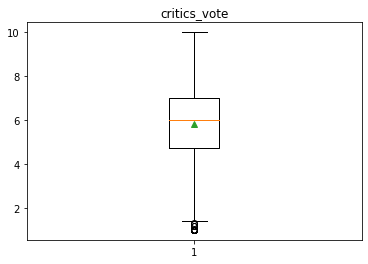

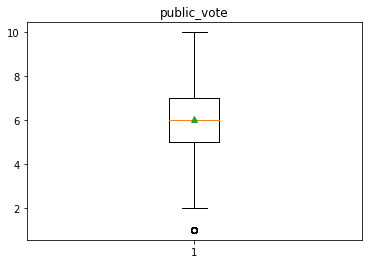

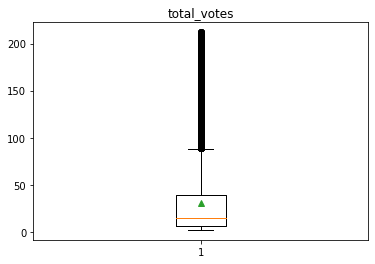

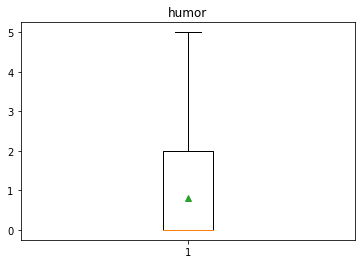

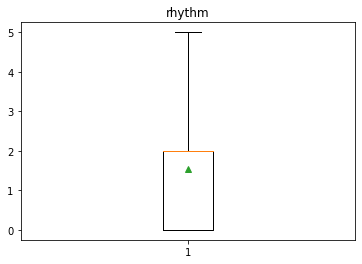

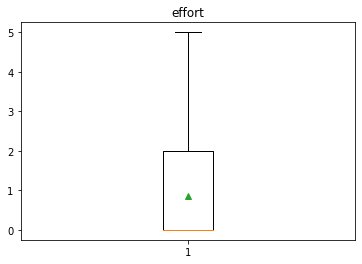

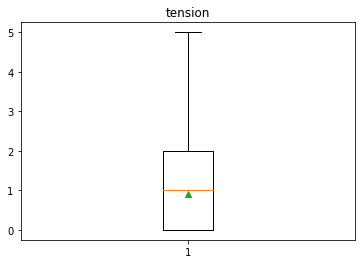

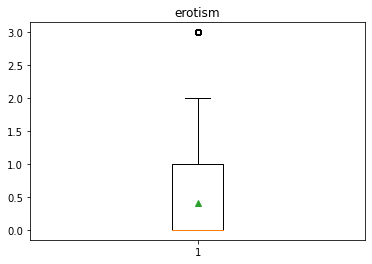

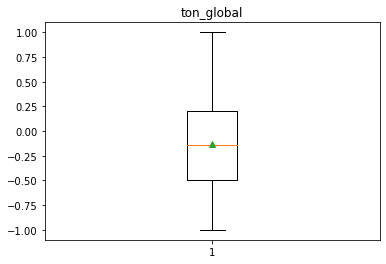

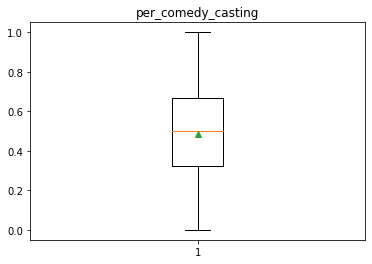

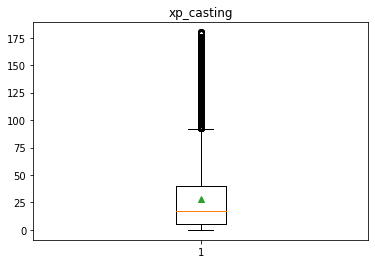

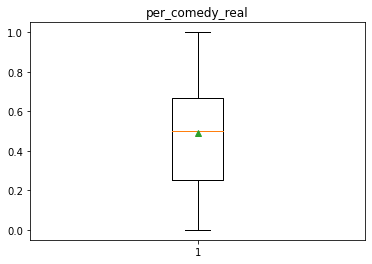

In [102]:
#Boxplot
boxplot1(df2)

Nous considérons la distribution de l'indicateur de la **per_comedy_real** dans l’expérience des réalisateurs comme trop particulière. En effet, elle est séparée en 3 grands groupes : les 0, les 0.5 et les 1. De notre point de vue, cette distribution est trop particulière pour que nous l'ajoutons dans nos modèles tel quel. Nous avons tout de même essayé de discrétiser cet indicateur en 3 dummies variables avec pour intervalle [0;0,33], [0,33;0,67] et [0,67;1]. Néanmoins, en testant ces dummies variables dans une sélection de variables, elles faisaient partie des dernières sélectionnées


Nous retirons **per_comedy_real** de la base.

In [103]:
#Elimination de per_comedy_real de la base
df2=df2.drop(["per_comedy_real"], axis = 1)
del var_quanti[var_quanti.index('per_comedy_real')]

### Variables qualitatives

In [104]:
#Distribution des variables dummies
df2[var_quali].value_counts(normalize=True)

EU   NA   Inter
1.0  0.0  0.0      0.425553
0.0  1.0  0.0      0.362396
     0.0  1.0      0.212051
dtype: float64

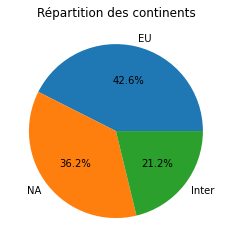

In [105]:
#Répartition des variables dummies
plt.pie(
    df2[var_quali].value_counts(normalize = True).values,
    labels=df2[var_quali].value_counts(normalize = True).index.names,
    autopct='%1.1f%%'
)
plt.title("Répartition des continents")
plt.show()

## Statistiques bivariées

### Variables quanti-quanti

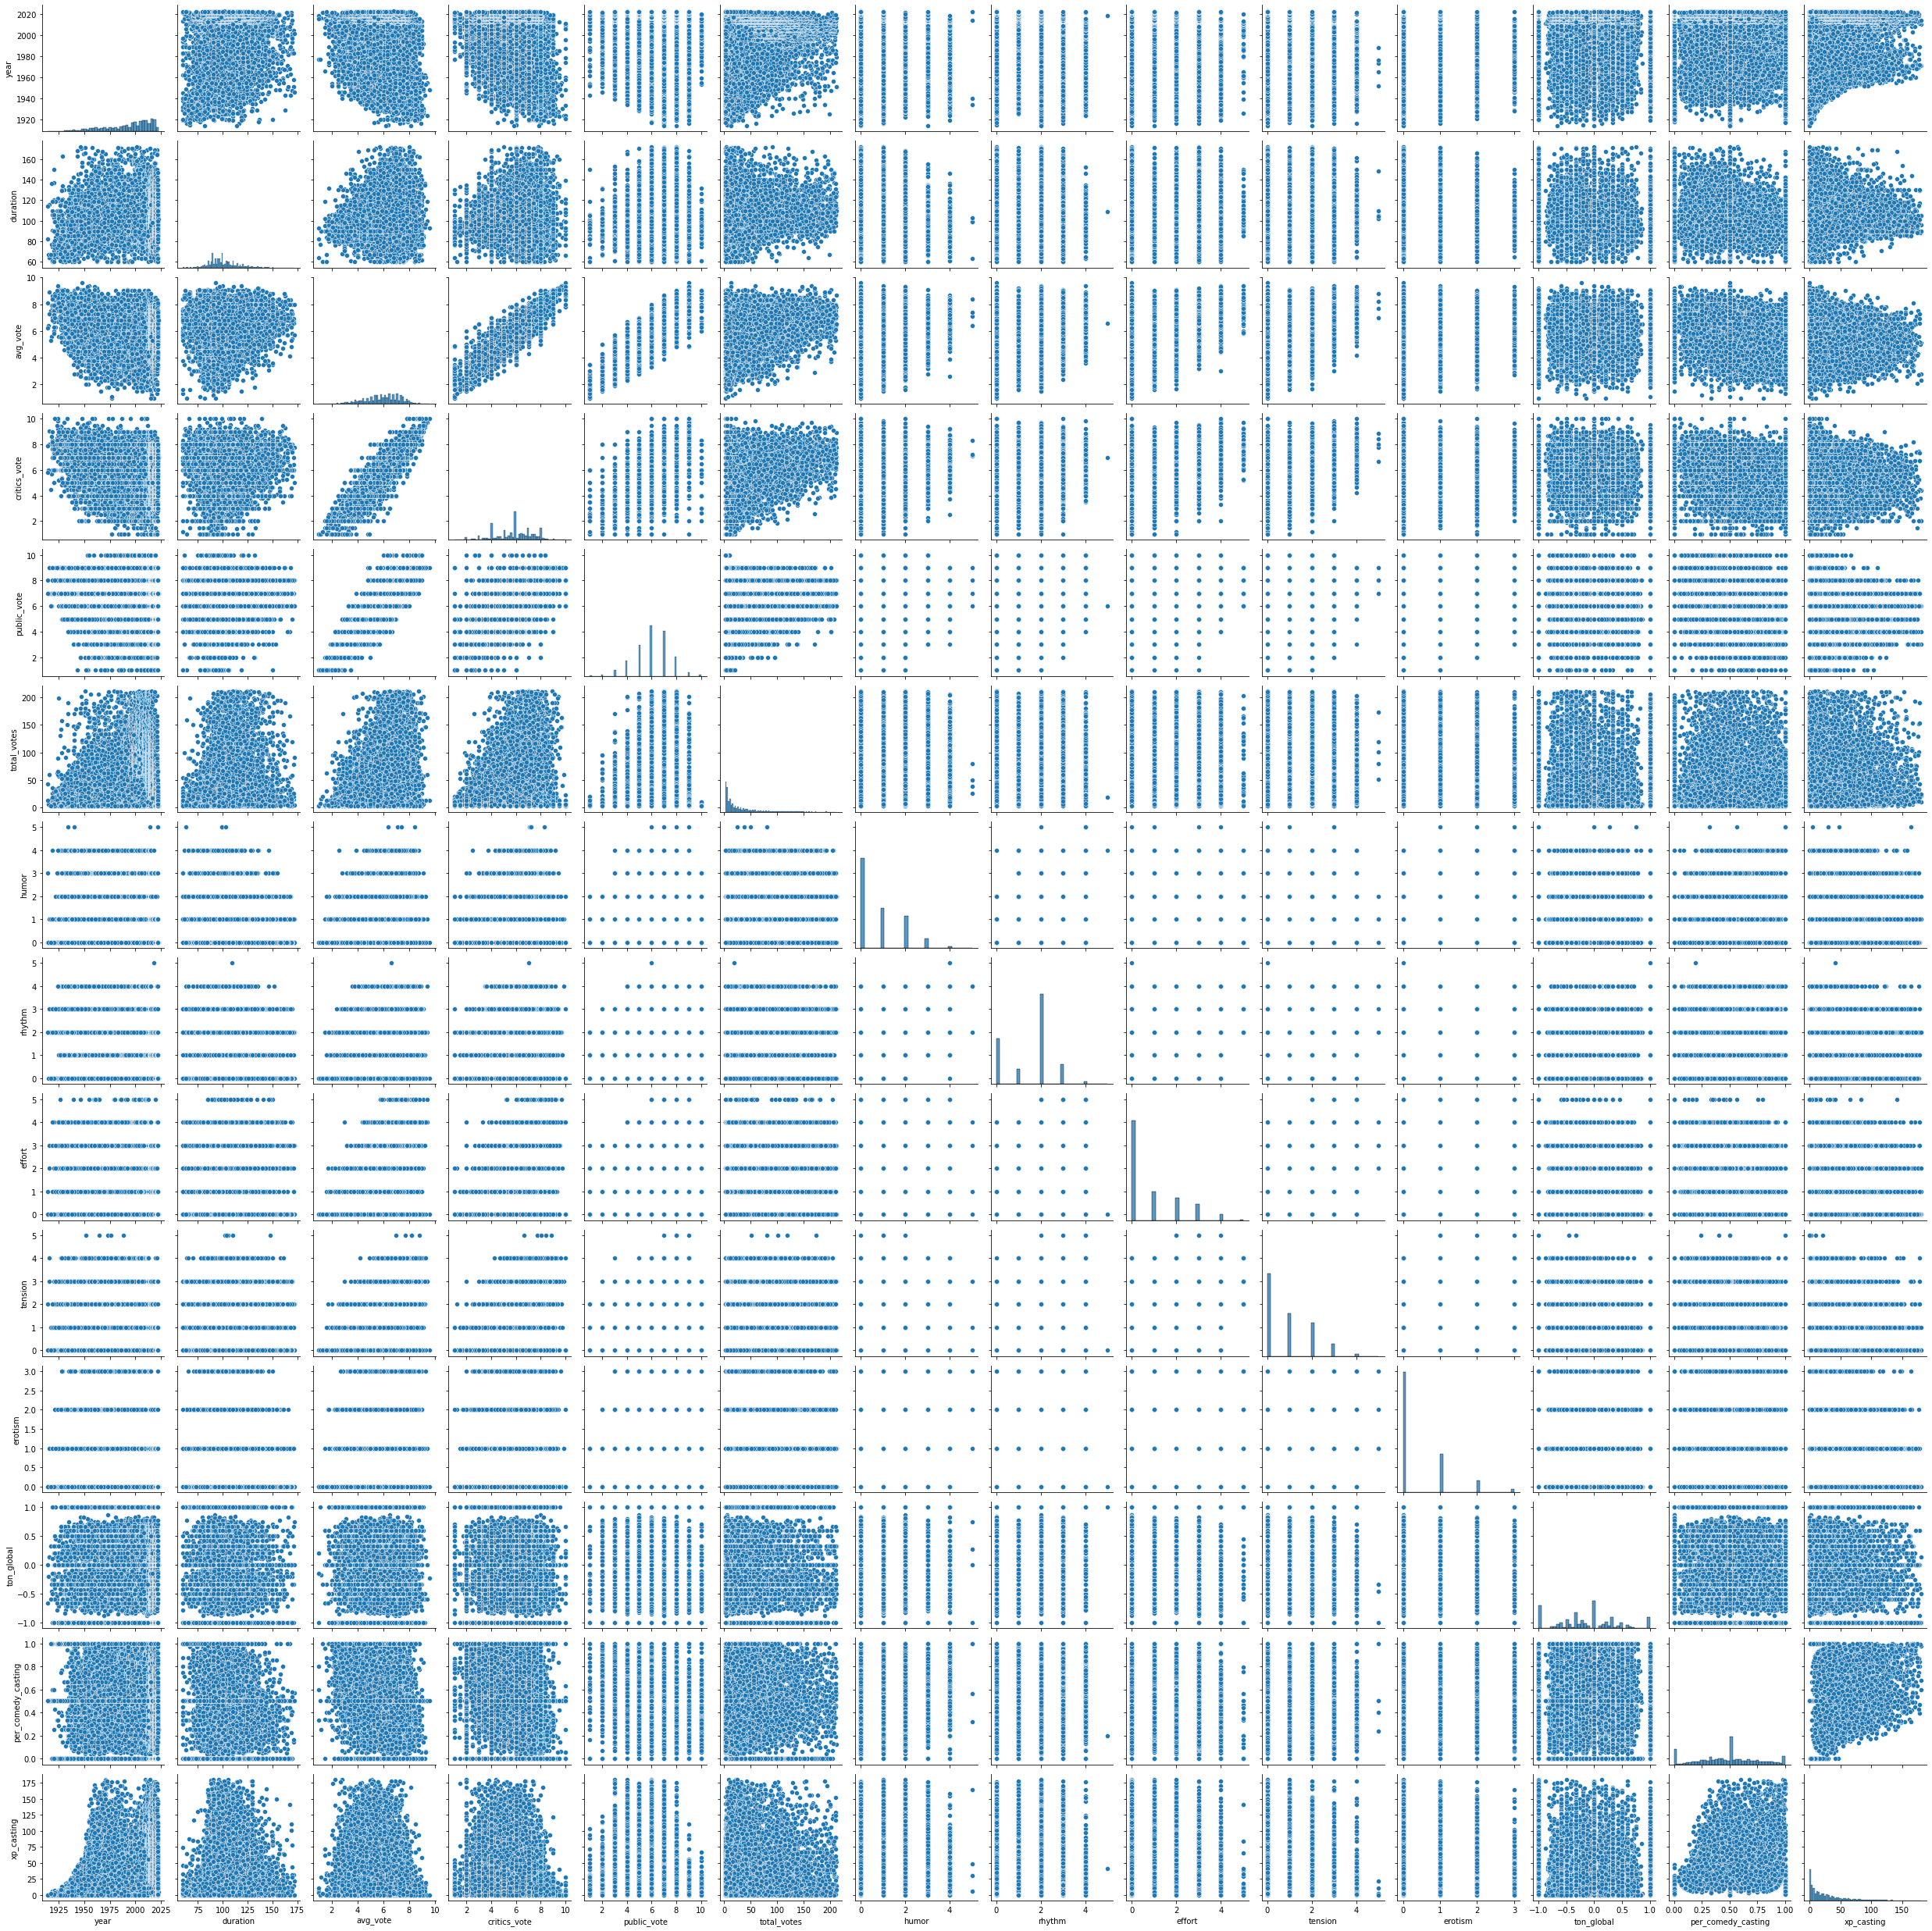

In [106]:
#Pair-plot
sns.pairplot(df2[var_quanti])

<Figure size 432x288 with 0 Axes>

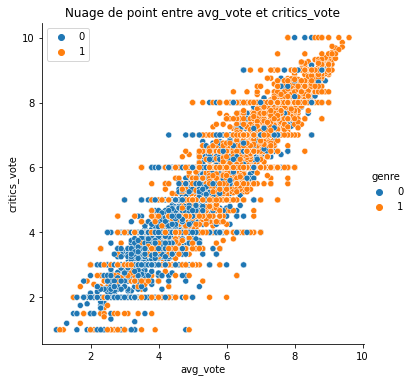

<Figure size 432x288 with 0 Axes>

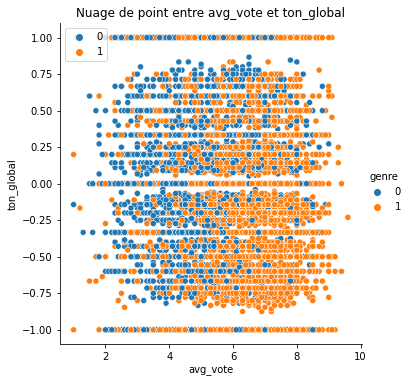

<Figure size 432x288 with 0 Axes>

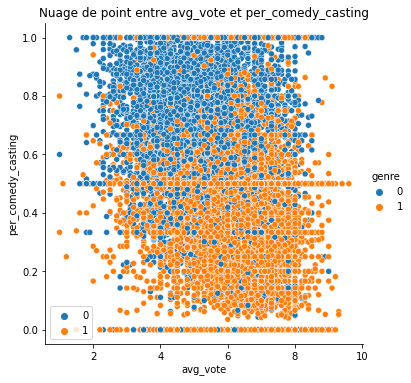

<Figure size 432x288 with 0 Axes>

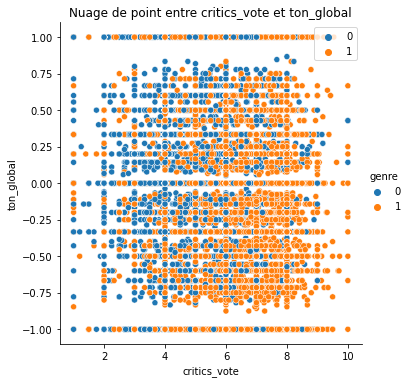

<Figure size 432x288 with 0 Axes>

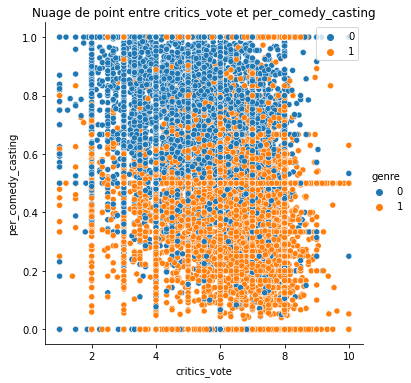

<Figure size 432x288 with 0 Axes>

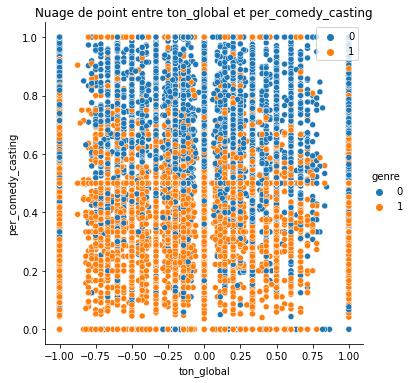

In [107]:
#Nuage de points entre variables quantitatives continues
scatter_plot(pd.concat([df2[var_quanti].select_dtypes(include=['float64']), target], axis=1, join='inner'),"genre")

<Figure size 432x288 with 0 Axes>

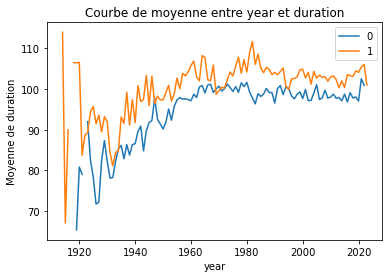

<Figure size 432x288 with 0 Axes>

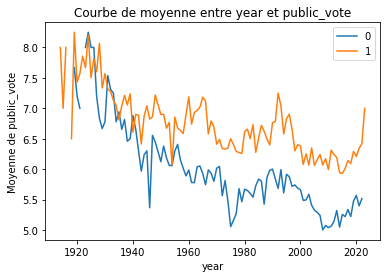

<Figure size 432x288 with 0 Axes>

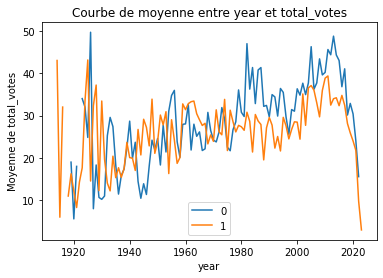

<Figure size 432x288 with 0 Axes>

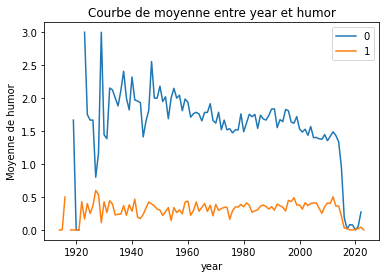

<Figure size 432x288 with 0 Axes>

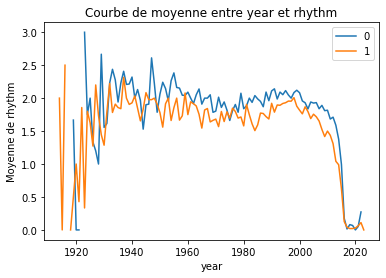

<Figure size 432x288 with 0 Axes>

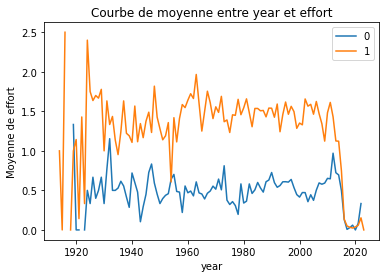

<Figure size 432x288 with 0 Axes>

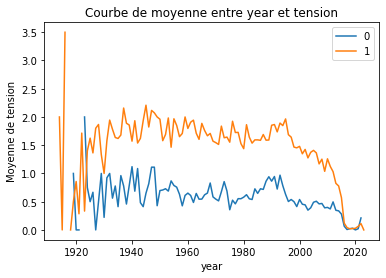

<Figure size 432x288 with 0 Axes>

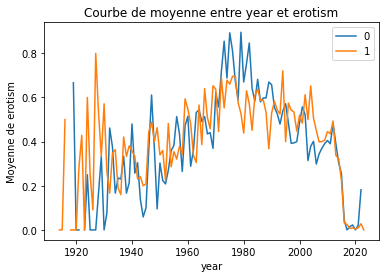

<Figure size 432x288 with 0 Axes>

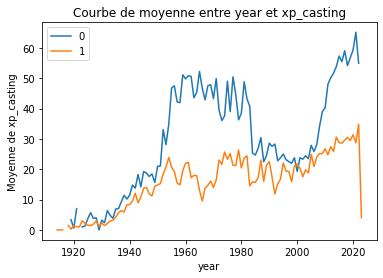

<Figure size 432x288 with 0 Axes>

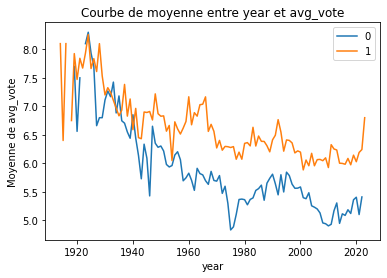

<Figure size 432x288 with 0 Axes>

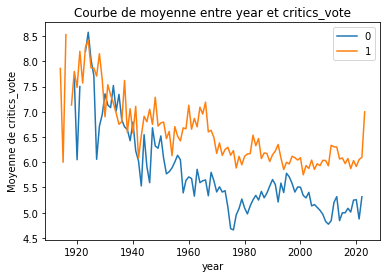

<Figure size 432x288 with 0 Axes>

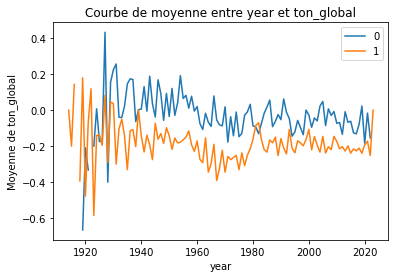

<Figure size 432x288 with 0 Axes>

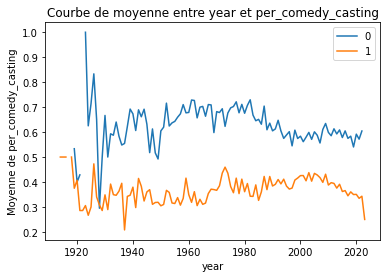

<Figure size 432x288 with 0 Axes>

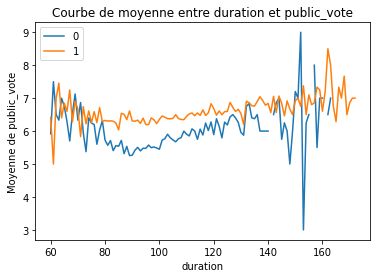

<Figure size 432x288 with 0 Axes>

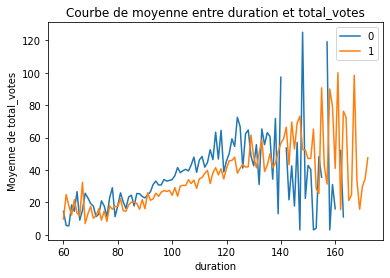

<Figure size 432x288 with 0 Axes>

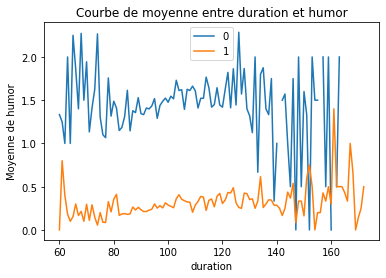

<Figure size 432x288 with 0 Axes>

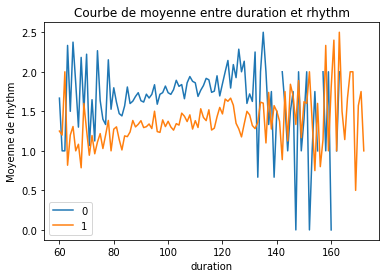

<Figure size 432x288 with 0 Axes>

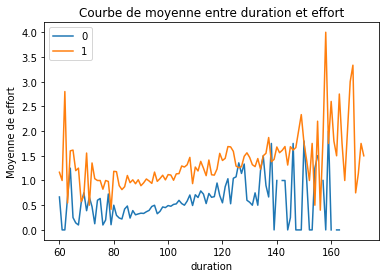

<Figure size 432x288 with 0 Axes>

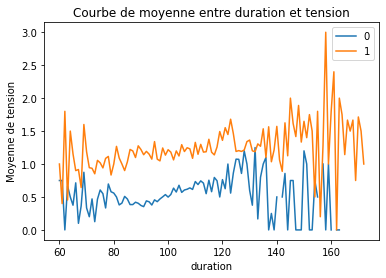

<Figure size 432x288 with 0 Axes>

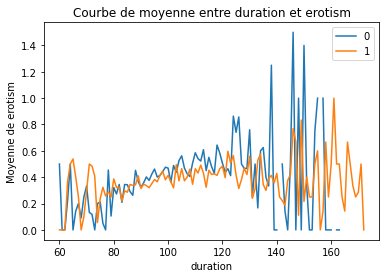

<Figure size 432x288 with 0 Axes>

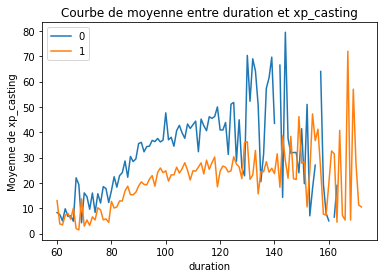

<Figure size 432x288 with 0 Axes>

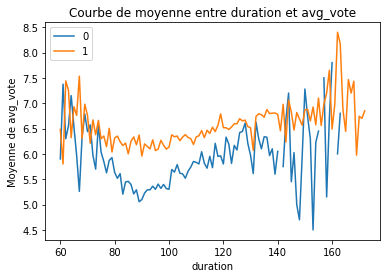

<Figure size 432x288 with 0 Axes>

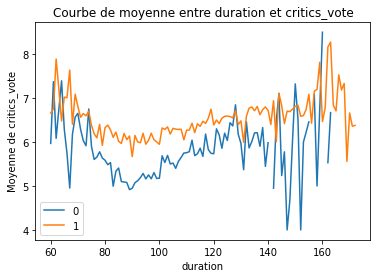

<Figure size 432x288 with 0 Axes>

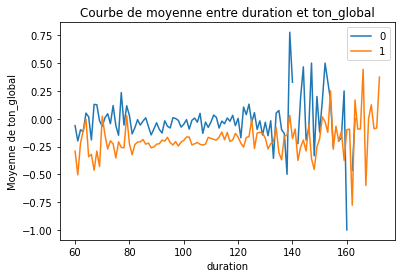

<Figure size 432x288 with 0 Axes>

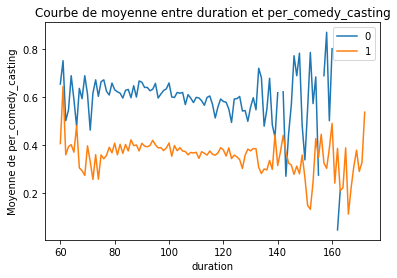

<Figure size 432x288 with 0 Axes>

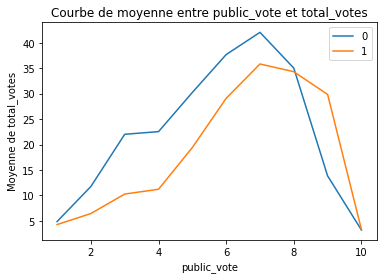

<Figure size 432x288 with 0 Axes>

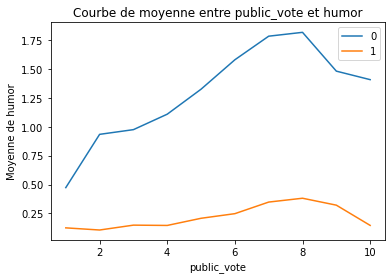

<Figure size 432x288 with 0 Axes>

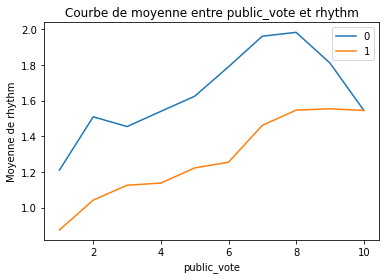

<Figure size 432x288 with 0 Axes>

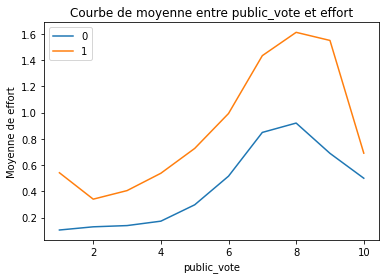

<Figure size 432x288 with 0 Axes>

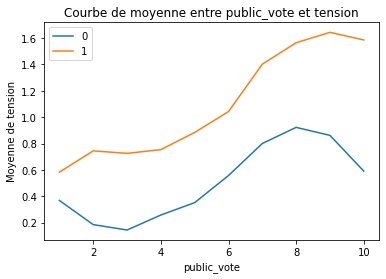

<Figure size 432x288 with 0 Axes>

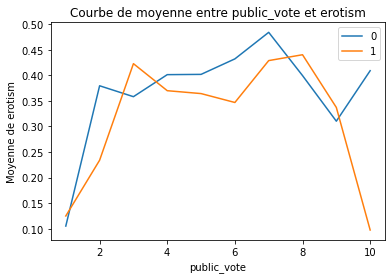

<Figure size 432x288 with 0 Axes>

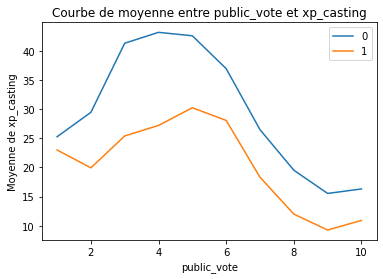

<Figure size 432x288 with 0 Axes>

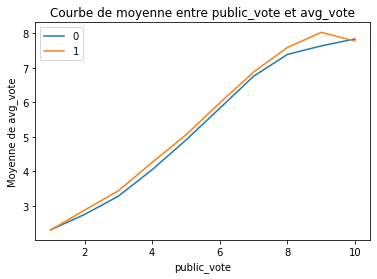

<Figure size 432x288 with 0 Axes>

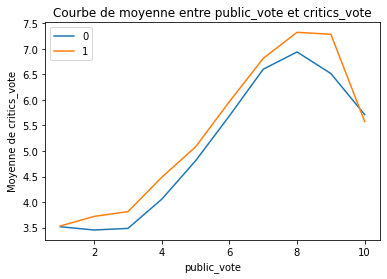

<Figure size 432x288 with 0 Axes>

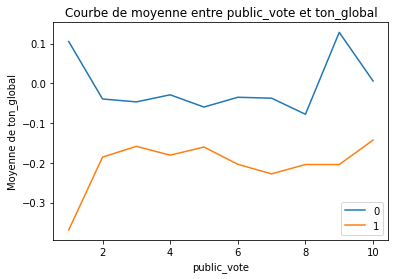

<Figure size 432x288 with 0 Axes>

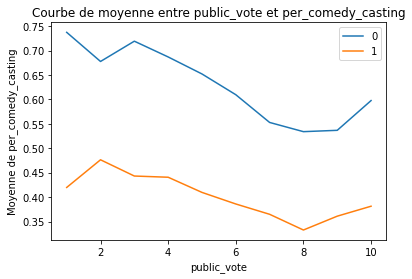

<Figure size 432x288 with 0 Axes>

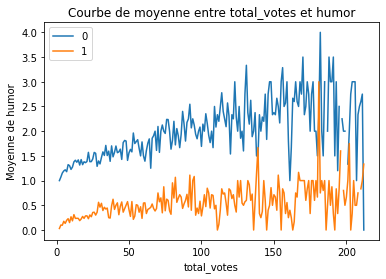

<Figure size 432x288 with 0 Axes>

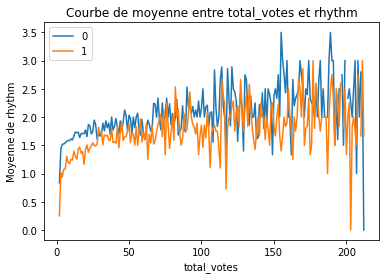

<Figure size 432x288 with 0 Axes>

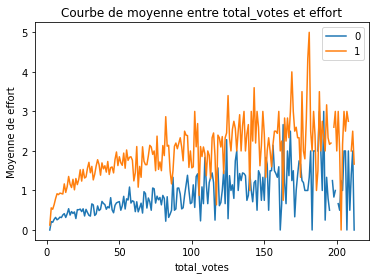

<Figure size 432x288 with 0 Axes>

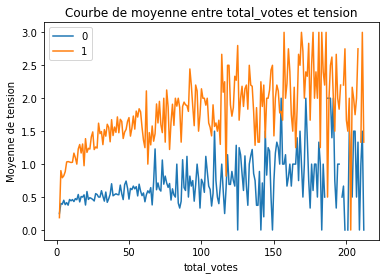

<Figure size 432x288 with 0 Axes>

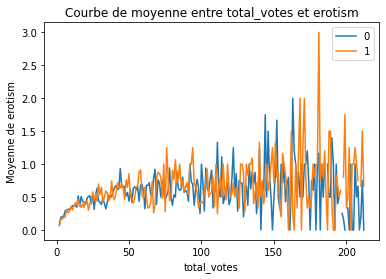

<Figure size 432x288 with 0 Axes>

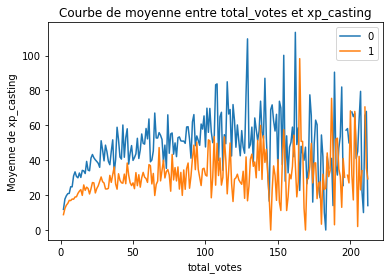

<Figure size 432x288 with 0 Axes>

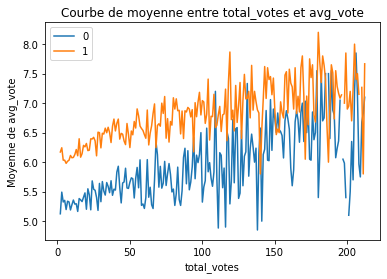

<Figure size 432x288 with 0 Axes>

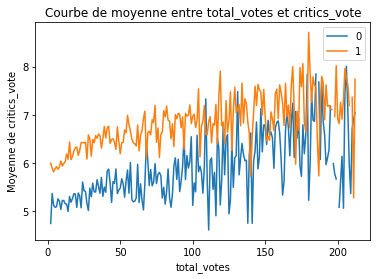

<Figure size 432x288 with 0 Axes>

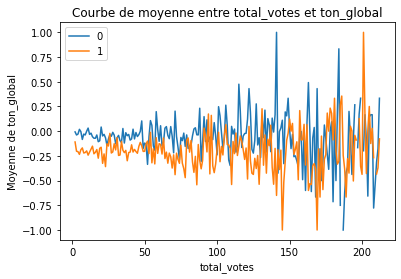

<Figure size 432x288 with 0 Axes>

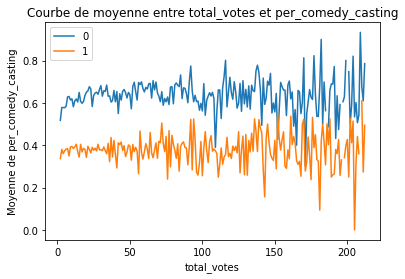

<Figure size 432x288 with 0 Axes>

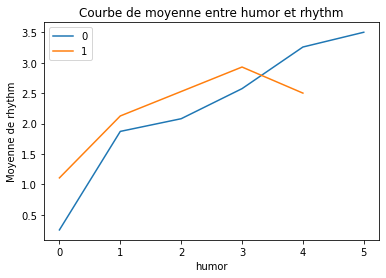

<Figure size 432x288 with 0 Axes>

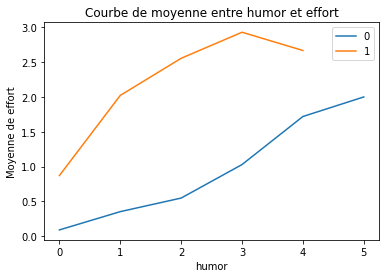

<Figure size 432x288 with 0 Axes>

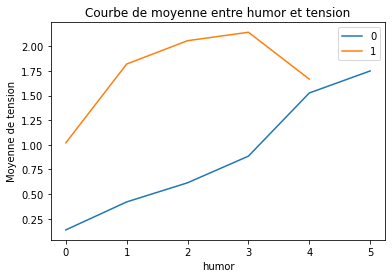

<Figure size 432x288 with 0 Axes>

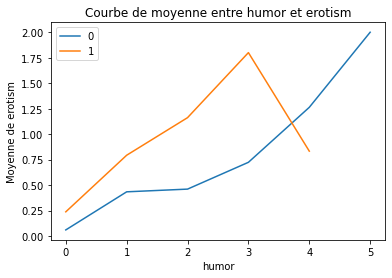

<Figure size 432x288 with 0 Axes>

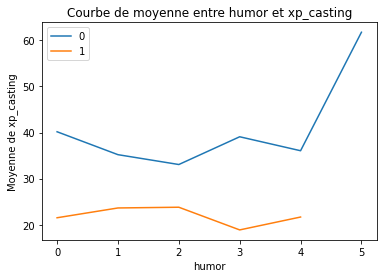

<Figure size 432x288 with 0 Axes>

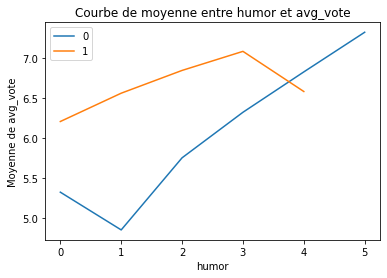

<Figure size 432x288 with 0 Axes>

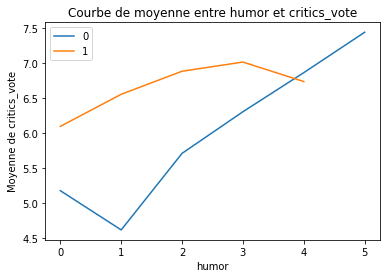

<Figure size 432x288 with 0 Axes>

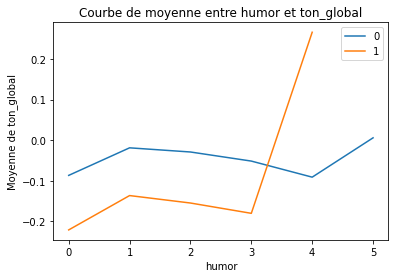

<Figure size 432x288 with 0 Axes>

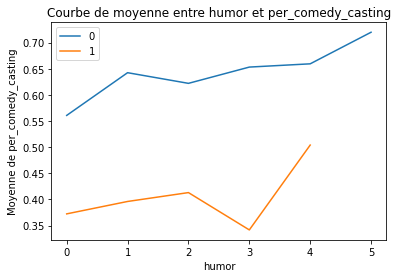

<Figure size 432x288 with 0 Axes>

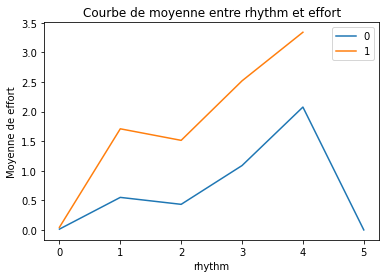

<Figure size 432x288 with 0 Axes>

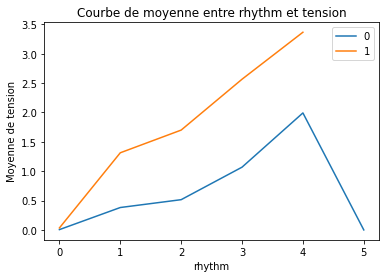

<Figure size 432x288 with 0 Axes>

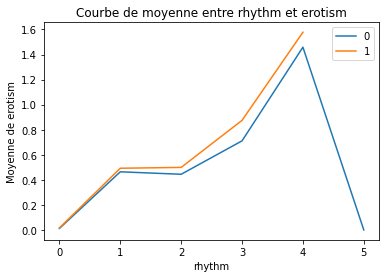

<Figure size 432x288 with 0 Axes>

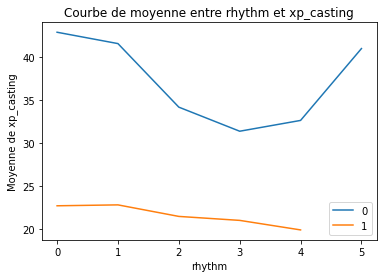

<Figure size 432x288 with 0 Axes>

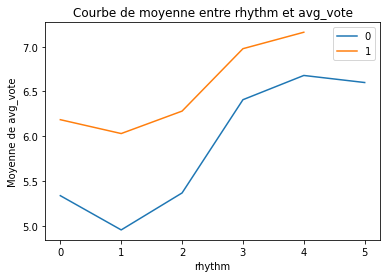

<Figure size 432x288 with 0 Axes>

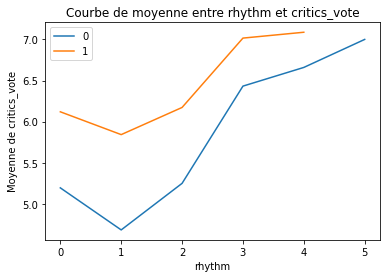

<Figure size 432x288 with 0 Axes>

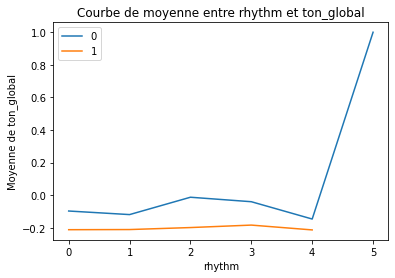

<Figure size 432x288 with 0 Axes>

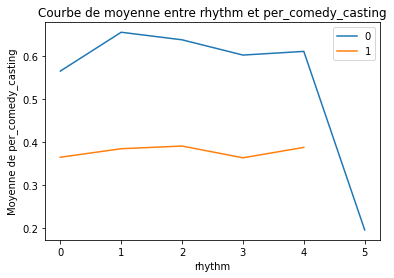

<Figure size 432x288 with 0 Axes>

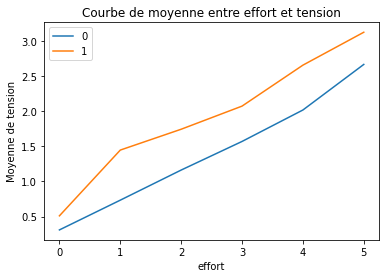

<Figure size 432x288 with 0 Axes>

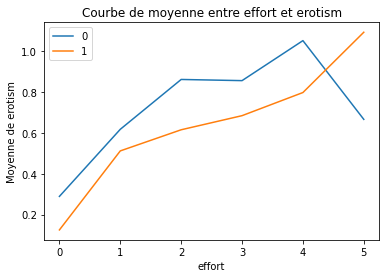

<Figure size 432x288 with 0 Axes>

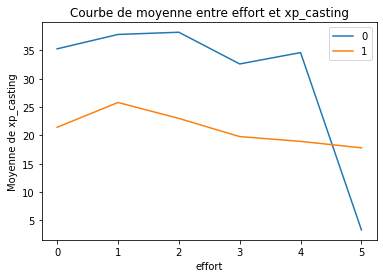

<Figure size 432x288 with 0 Axes>

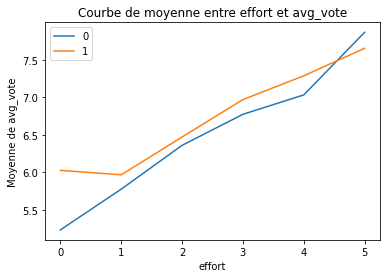

<Figure size 432x288 with 0 Axes>

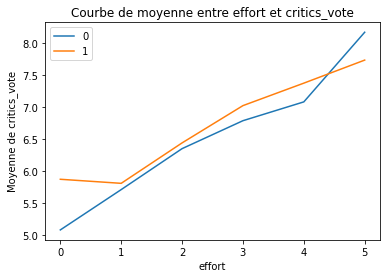

<Figure size 432x288 with 0 Axes>

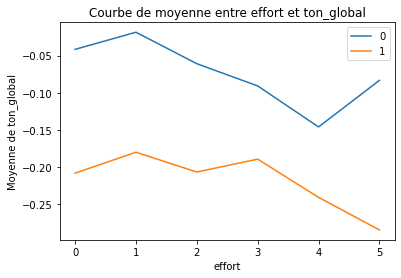

<Figure size 432x288 with 0 Axes>

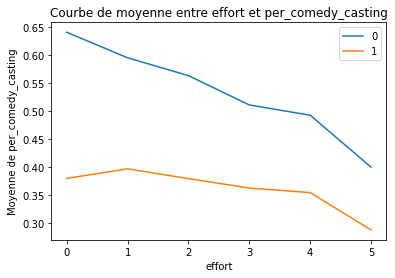

<Figure size 432x288 with 0 Axes>

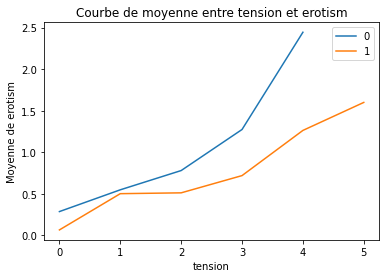

<Figure size 432x288 with 0 Axes>

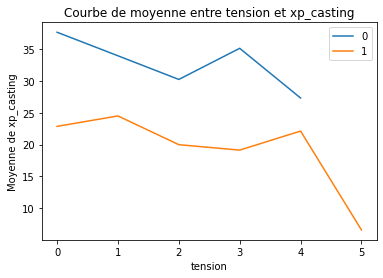

<Figure size 432x288 with 0 Axes>

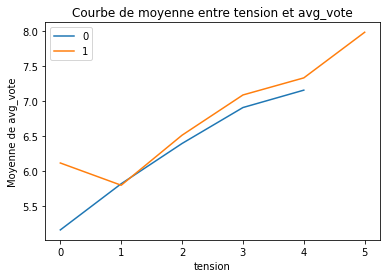

<Figure size 432x288 with 0 Axes>

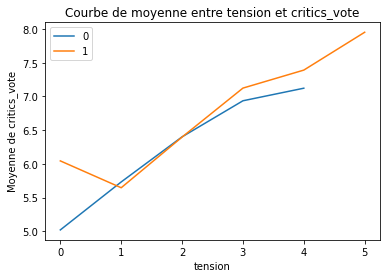

<Figure size 432x288 with 0 Axes>

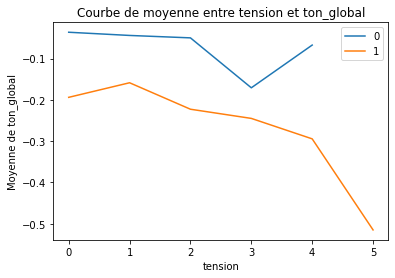

<Figure size 432x288 with 0 Axes>

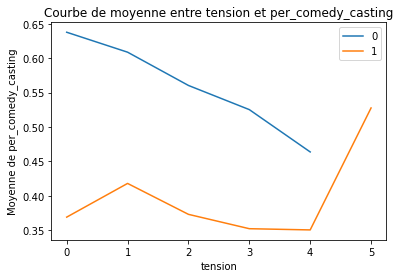

<Figure size 432x288 with 0 Axes>

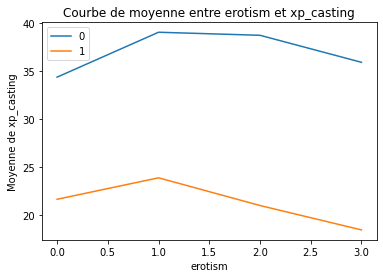

<Figure size 432x288 with 0 Axes>

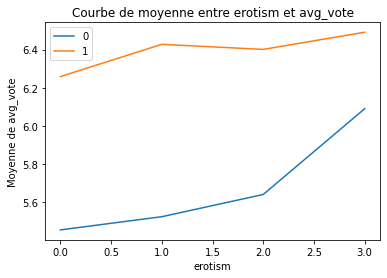

<Figure size 432x288 with 0 Axes>

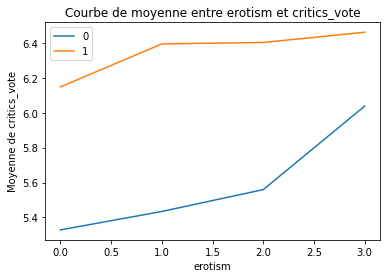

<Figure size 432x288 with 0 Axes>

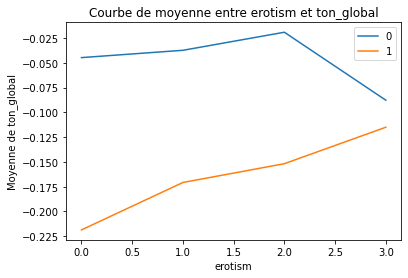

<Figure size 432x288 with 0 Axes>

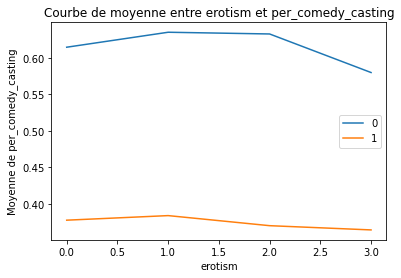

<Figure size 432x288 with 0 Axes>

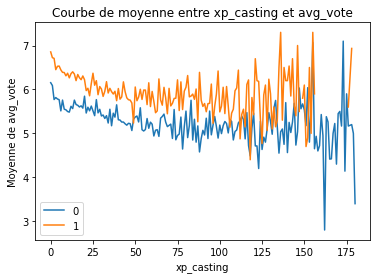

<Figure size 432x288 with 0 Axes>

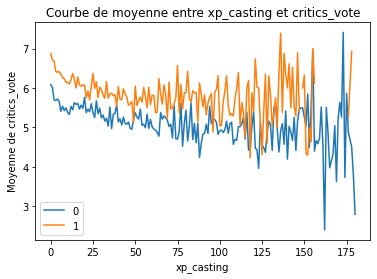

<Figure size 432x288 with 0 Axes>

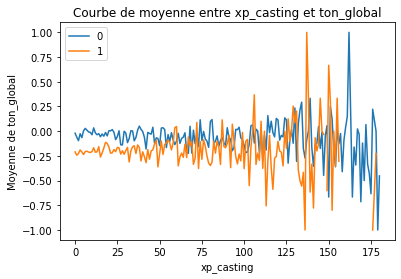

<Figure size 432x288 with 0 Axes>

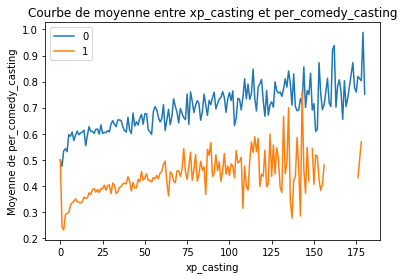

In [108]:
#Courbe de moyenne entre 2 variables quantitatives (pas de quanti continue en abscisse)
line_plot(df2,"genre")

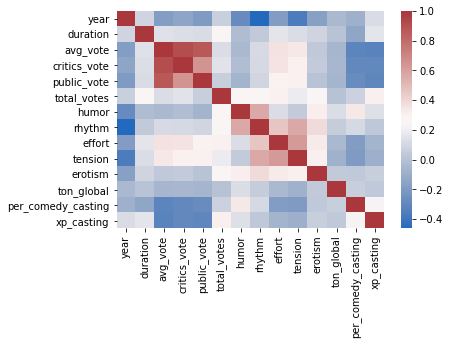

In [109]:
#Matrice des corrélations
matrix=df2._get_numeric_data().corr(method="spearman")
sns.heatmap(matrix,cmap='vlag')
plt.show()

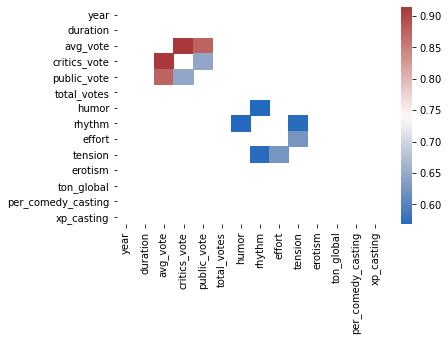

In [110]:
#Matrice des corrélations (supérieur à 0.5)
matrix=df2._get_numeric_data().corr(method="spearman")
sns.heatmap(matrix[(abs(matrix)>=0.50) & (abs(matrix)!=1)],cmap='vlag')
plt.show()

Nous avons réalisé une première matrice des corrélations, et afin de pouvoir mieux distinguer les variables fortement liées entre-elles, nous en avons construit une autre qui inclut seulement les corrélations supérieures à 0.50. Nous constatons, comme nous l’avons suspecté précédemment, que les variables **critics_votes** et **avg_notes** sont fortement corrélées. Elles ont un coefficient de corrélation aux alentours de 0.9, elles sont donc fortement liées. Nous allons devoir en garder qu’une seule afin de ne pas introduire de multicolinéarité dans les modèles. Nous remarquons que ces 2 variables sont elles-mêmes fortement corrélées avec la variable **public_vote** avec des coefficients de corrélation d’environ 0.85 (pour avg_vote) et 0.70 (pour critics_vote). Nous constatons d’autres groupes de variables qui sont fortement corrélées, comme la variable **tension** qui l’est à la fois avec la variable **rhythm** et **effort**. Nous avons également un fort lien de corrélation entre les variables **effort** et **humor** de l’ordre de 0.60. Nous savons à présent que nous allons devoir passer par une phase de sélection de variables afin de ne pas introduire de variables corrélées entre elles dans les modèles. 

In [111]:
#Matrice de significativité des corrélations
corr_var_p_value = np.empty((df2[var_quanti].shape[1],df2[var_quanti].shape[1],))
corr_var_p_value[:] = np.nan

for i in range(0,df2[var_quanti].shape[1]):
    for j in range(0,df2[var_quanti].shape[1]):
        corr_var_p_value[i,j] = spearmanr(df2.iloc[:,i], df2.iloc[:,j])[1]

corr_var_p_value = round(pd.DataFrame(corr_var_p_value, columns=df2[var_quanti].columns, index = df2[var_quanti].columns),4)

In [371]:
display(corr_var_p_value)

year  duration  avg_vote  critics_vote  public_vote  \
year                 0.0       0.0    0.0000           0.0       0.0000   
duration             0.0       0.0    0.0000           0.0       0.0000   
avg_vote             0.0       0.0    0.0000           0.0       0.0000   
critics_vote         0.0       0.0    0.0000           0.0       0.0000   
public_vote          0.0       0.0    0.0000           0.0       0.0000   
total_votes          0.0       0.0    0.0000           0.0       0.0000   
humor                0.0       0.0    0.0000           0.0       0.0000   
rhythm               0.0       0.0    0.0003           0.0       0.0079   
effort               0.0       0.0    0.0000           0.0       0.0000   
tension              0.0       0.0    0.0000           0.0       0.0000   
erotism              0.0       0.0    0.0000           0.0       0.0000   
ton_global           0.0       0.0    0.0000           0.0       0.0000   
per_comedy_casting   0.0       0.0    0.1730           0.0       0.0000   
xp_casting           0.0       0.0    0.0000           0.0       0.0000   

                    total_votes   humor  rhythm  effort  tension  erotism  \
year                     0.0000  0.0000  0.0000     0.0      0.0      0.0   
duration                 0.0000  0.0000  0.0000     0.0      0.0      0.0   
avg_vote                 0.0000  0.0000  0.0003     0.0      0.0      0.0   
critics_vote             0.0000  0.0000  0.0000     0.0      0.0      0.0   
public_vote              0.0000  0.0000  0.0079     0.0      0.0      0.0   
total_votes              0.0000  0.0000  0.0000     0.0      0.0      0.0   
humor                    0.0000  0.0000  0.0000     0.0      0.0      0.0   
rhythm                   0.0000  0.0000  0.0000     0.0      0.0      0.0   
effort                   0.0000  0.0000  0.0000     0.0      0.0      0.0   
tension                  0.0000  0.0000  0.0000     0.0      0.0      0.0   
erotism                  0.0000  0.0000  0.0000     0.0      0.0      0.0   
ton_global               0.1165  0.0000  0.0000     0.0      0.0      0.0   
per_comedy_casting       0.0000  0.5031  0.0000     0.0      0.0      0.0   
xp_casting               0.0000  0.0000  0.0000     0.0      0.0      0.0   

                    ton_global  per_comedy_casting  xp_casting  
year                    0.0000              0.0000         0.0  
duration                0.0000              0.0000         0.0  
avg_vote                0.0000              0.1730         0.0  
critics_vote            0.0000              0.0000         0.0  
public_vote             0.0000              0.0000         0.0  
total_votes             0.1165              0.0000         0.0  
humor                   0.0000              0.5031         0.0  
rhythm                  0.0000              0.0000         0.0  
effort                  0.0000              0.0000         0.0  
tension                 0.0000              0.0000         0.0  
erotism                 0.0000              0.0000         0.0  
ton_global              0.0000              0.0000         0.0  
per_comedy_casting      0.0000              0.0000         0.0  
xp_casting              0.0000              0.0000         0.0

La quasi-intégralité des corrélations sont considérées comme significatives dues au nombre d'observations élevé. Par conséquent, nous ne prenons pas en compte la significativité des corrélations, mais la valeur |0.5| comme seuil. Nous ne réaliserons que des regroupements sur les groupes de variables trop corrélées entre-elles.

https://asardell.github.io/statistique-python/

### Variables quanti-quali

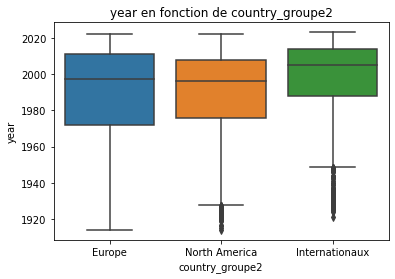

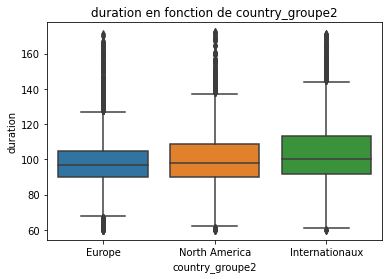

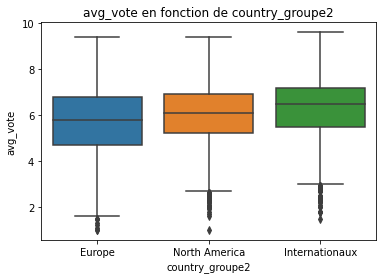

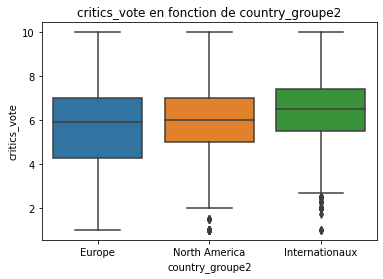

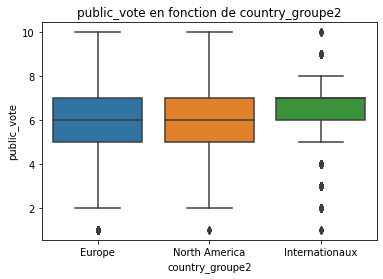

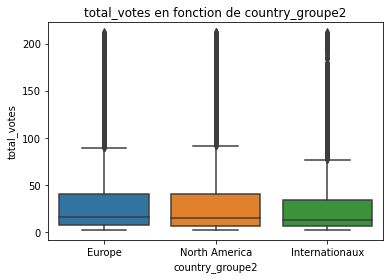

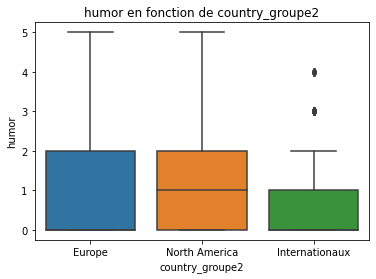

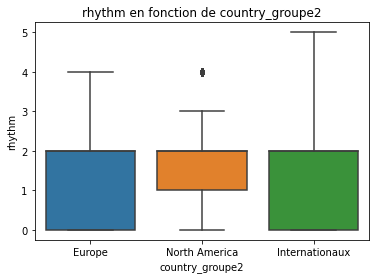

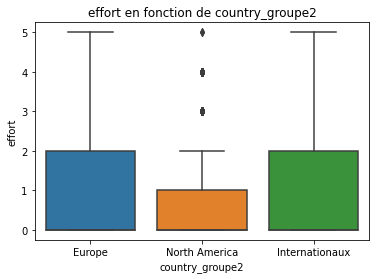

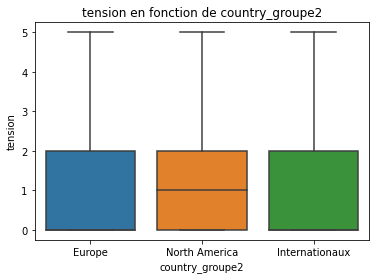

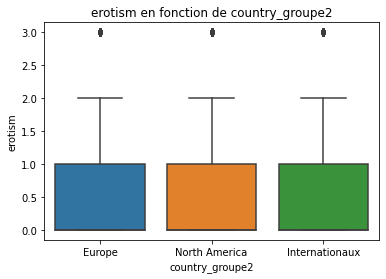

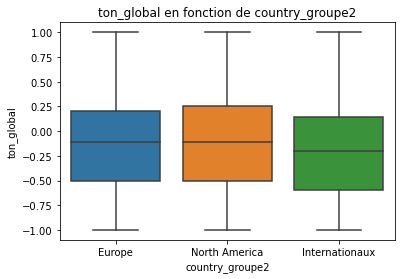

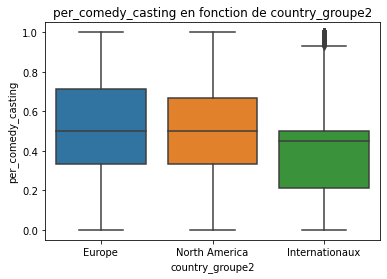

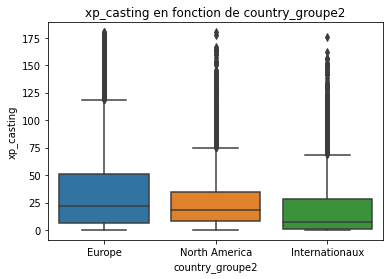

In [114]:
#Boxplot
boxplot2(pd.concat([df2[var_quanti], df["country_groupe2"]], axis=1, join='inner'),"country_groupe2")

## Variable à expliquer : Genre 

### Statistiques univariées

In [115]:
#Répartition
df2["genre"].value_counts()

1    9546
0    7681
Name: genre, dtype: int64

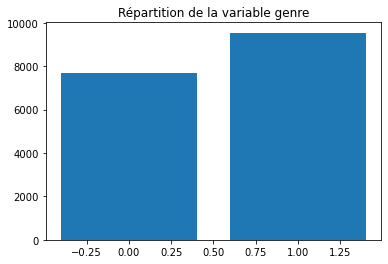

In [116]:
#Bar plot
plt.bar(df2["genre"].value_counts().index,df2["genre"].value_counts().values)
plt.title("Répartition de la variable genre")
plt.show()

In [117]:
print("Environ {} % d'écart de répartition".format(round(((df2["genre"].value_counts().values[0]/df2["genre"].value_counts().values[1])-1)*100,2)))

Environ 24.28 % d'écart de répartition


### Statistiques bivariées

#### Variables explicatives quantitatives

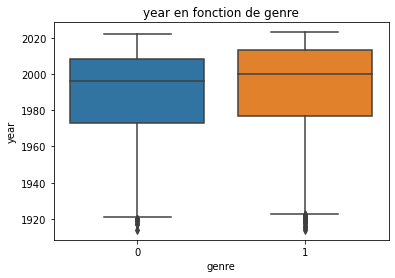

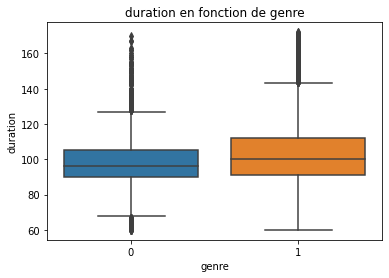

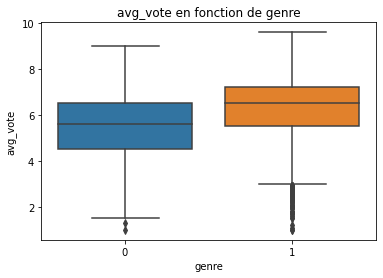

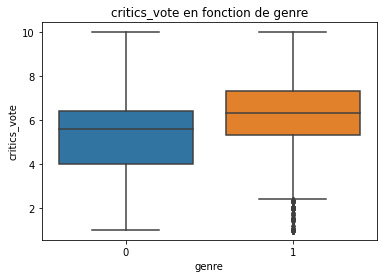

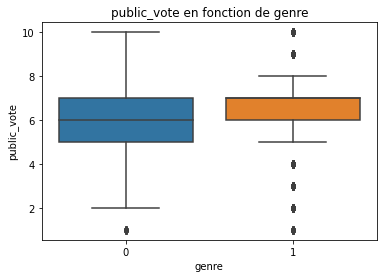

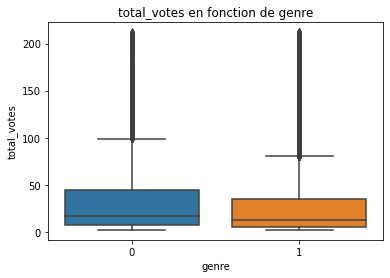

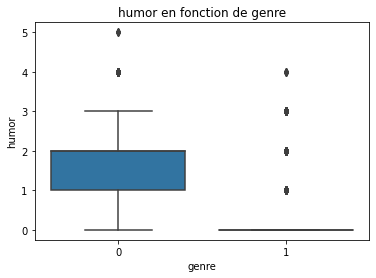

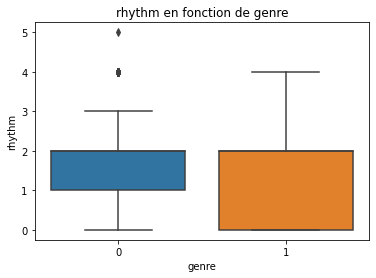

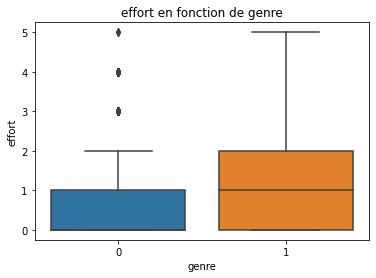

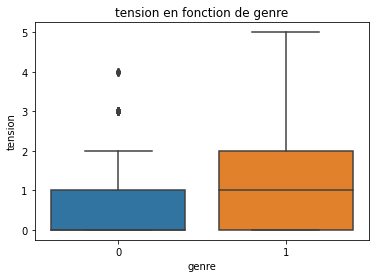

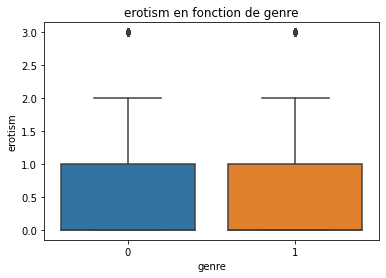

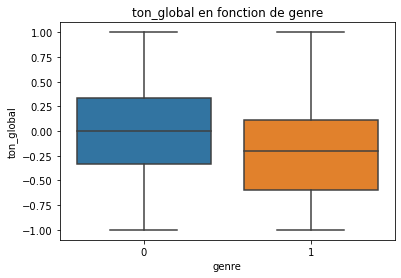

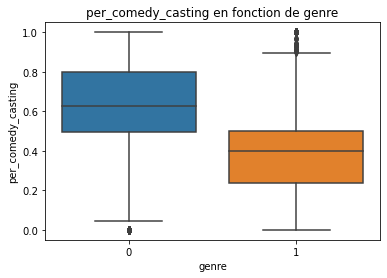

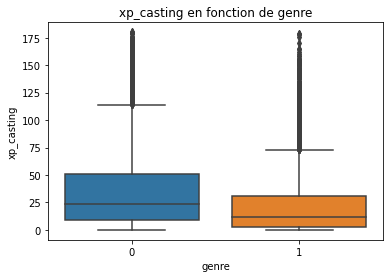

In [118]:
#Boxplot
boxplot2(df2,"genre")

In [119]:
#Test d'égalité des moyennes
print("\033[1m"+"Egalité de moyenne du genre :"+"\033[0m")
for i in range(0,df2[var_quanti].shape[1]) :
    t_stat, p = ttest_ind(df2.loc[df2['genre'] == 0, df2[var_quanti].columns[i]].to_numpy(), df2.loc[df2['genre'] == 1, df2[var_quanti].columns[i]].to_numpy())
    print(df2[var_quanti].columns[i] + " : p-value = {}".format(round(p,2)))

Egalité de moyenne du genre :
year : p-value = 0.0
duration : p-value = 0.0
avg_vote : p-value = 0.0
critics_vote : p-value = 0.0
public_vote : p-value = 0.0
total_votes : p-value = 0.0
humor : p-value = 0.0
rhythm : p-value = 0.0
effort : p-value = 0.0
tension : p-value = 0.0
erotism : p-value = 0.0
ton_global : p-value = 0.0
per_comedy_casting : p-value = 0.0
xp_casting : p-value = 0.0


Ce test d'égalité des moyennes considère que les moyennes entre les comedy et les drama de chaque variable explicatives sont significativement différentes. Néanmoins, comme pour la significativité des corrélations, ce test est faussé par le nombre de données trop important. Nous ne tiendrons pas en compte de ces résultats.

In [120]:
#Standardisation (pour violin plot)
scaler = StandardScaler()
data_quanti=pd.DataFrame(scaler.fit_transform(df2[var_quanti]),columns=list(df2[var_quanti].columns))

#Melt permet de faire un pivot sur nos données (nécessaire pour le Violin plot)
data = pd.concat([df2["genre"],data_quanti], axis=1, join='inner')
data = pd.melt(data,id_vars="genre",var_name="features",value_name='value')


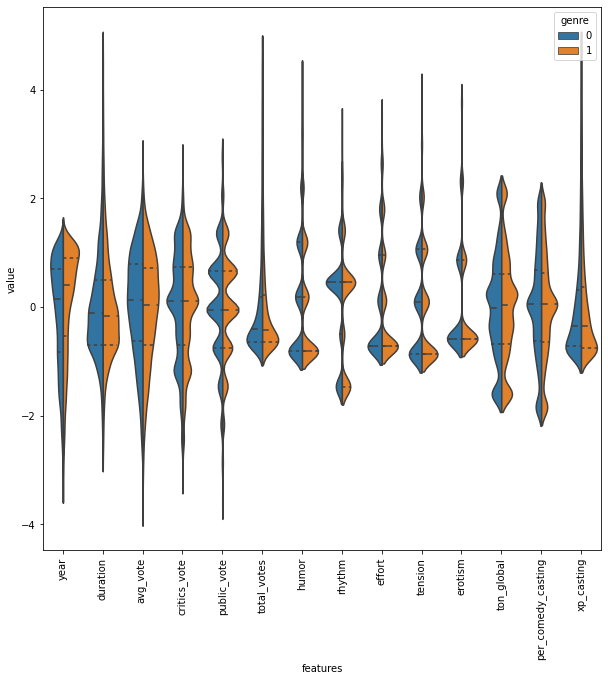

In [121]:
#Violin plot
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="genre", data=data,split=True, inner="quart")
plt.xticks(rotation=90);

#### Variables explicatives qualitatives

In [122]:
#Tableau de contingence
cross_df=pd.crosstab(df2["genre"], df["country_groupe2"])
print(cross_df)

country_groupe2  Europe  Internationaux  North America
genre                                                 
0                  3501             979           3201
1                  3830            2674           3042


<AxesSubplot:xlabel='genre'>

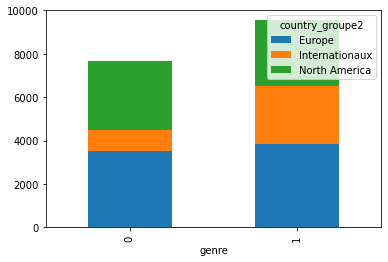

In [123]:
cross_df.plot.bar(stacked=True)

In [124]:
#Test de Chi2
value = np.array([cross_df.iloc[0][0:cross_df.shape[1]].values,
                  cross_df.iloc[1][0:cross_df.shape[1]].values])

chi2=chi2_contingency(value)[0:cross_df.shape[1]]
print(chi2)

(610.5484070889132, 2.636925944534836e-133, 2)


In [125]:
# V de Cramer
N = np.sum(value)
minimum_dimension = min(value.shape)-1
VCramer=np.sqrt((chi2[0]/N) / minimum_dimension)

print("Le Chi2 entre "+cross_df.index.name+" et "+ cross_df.columns.name + " est de {}".format(round(VCramer,2)))
print("La p-value est de {}".format(round(chi2[1],2)))

Le Chi2 entre genre et country_groupe2 est de 0.19
La p-value est de 0.0


Le test du Chi2 entre nos variables dummies et le genre montre une dépendance significative. Néanmoins, comme pour la significativité des corrélations, ce test est faussé par le nombre de données trop important. Nous ne tiendrons pas en compte de ces résultats.

https://www.geeksforgeeks.org/how-to-calculate-cramers-v-in-python/

# Préparation du dataset

In [126]:
#Utilisation d'un nouveau Dataset pour la préparation aux modèles
df3=df2.copy()

## Découpage en Train et Test

In [131]:
#Split en train (0.7) et test (0.3)
X_train, X_test, y_train, y_test = train_test_split(df3.iloc[:,1:], df3.genre, test_size=0.3, stratify=df3.genre, random_state=1)

In [132]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12058, 17)
(12058,)
(5169, 17)
(5169,)


## Standardisation

In [133]:
#Standardisation sur les variables quanti
scaler = StandardScaler()
scaler.fit(X_train._get_numeric_data())

X_train_sc=pd.DataFrame(np.c_[scaler.transform(X_train._get_numeric_data()),X_train.select_dtypes(include=['object'])],columns=list(X_train.columns))
X_test_sc=pd.DataFrame(np.c_[scaler.transform(X_test._get_numeric_data()),X_test.select_dtypes(include=['object'])],columns=list(X_test.columns))

In [134]:
#Type
X_train_sc.dtypes

year                  object
duration              object
avg_vote              object
critics_vote          object
public_vote           object
total_votes           object
humor                 object
rhythm                object
effort                object
tension               object
erotism               object
ton_global            object
per_comedy_casting    object
xp_casting            object
EU                    object
NA                    object
Inter                 object
dtype: object

In [135]:
#Conversion des quanti en float
X_train_sc[var_quanti]=X_train_sc[var_quanti].astype(float)
X_test_sc[var_quanti]=X_test_sc[var_quanti].astype(float)

y_train=y_train.astype('int')
y_test=y_test.astype('int')

## ACP

Pour à la fois éviter d’introduire de la multicolinéarité dans les modèles et réduire le nombre de dimensions de notre base, nous décidons de regrouper les variables corrélées entre elles grâce à la méthode de l’analyse en composants principales (ACP). La réalisation d’ACP va nous permettre de créer des variables latentes synthétisant les informations de groupe de variables trop corrélées entre-elles (|corrélation| >0.5).

### ACP : avg_vote, critics_vote, public_vote

In [136]:
#Premier groupe de variables corrélées
X_train_acp_vote=X_train_sc[["avg_vote","critics_vote","public_vote"]].copy()

In [137]:
#Initialisation de l'ACP
n_components_vote=X_train_acp_vote.shape[1]
pca_vote = PCA(n_components=n_components_vote)
pca_vote.fit(X_train_acp_vote) #Fit sur l'ech de Train
reduced = pca_vote.transform(X_train_acp_vote)
X_test_acp_vote = pca_vote.transform(X_test_sc[["avg_vote","critics_vote","public_vote"]]) #Application de l'ACP train sur l'ech de test

for i in range(0, n_components_vote):
    X_train_acp_vote['PC' + str(i + 1)] = reduced[:, i]
    X_test_sc['PC' + str(i + 1)] = X_test_acp_vote[:, i]
    
display(X_train_acp_vote.head(5))

avg_vote  critics_vote  public_vote       PC1       PC2       PC3
0  1.918454      1.657405     1.355637 -2.862113 -0.201707  0.181198
1  1.092200      1.061241     0.649992 -1.628503 -0.283961  0.094694
2 -1.086107     -0.541351    -1.466944  1.782336 -0.669011 -0.017803
3  1.242428      1.061241     1.355637 -2.109689  0.229488 -0.064471
4 -0.710537     -0.541351    -0.761299  1.161987 -0.165188  0.000007

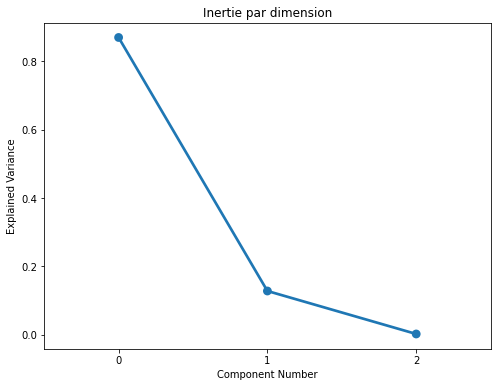

In [138]:
# Graphique des valeurs propres
ind = np.arange(0, n_components_vote)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca_vote.explained_variance_ratio_)
ax.set_title('Inertie par dimension')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

1 facteur suffit

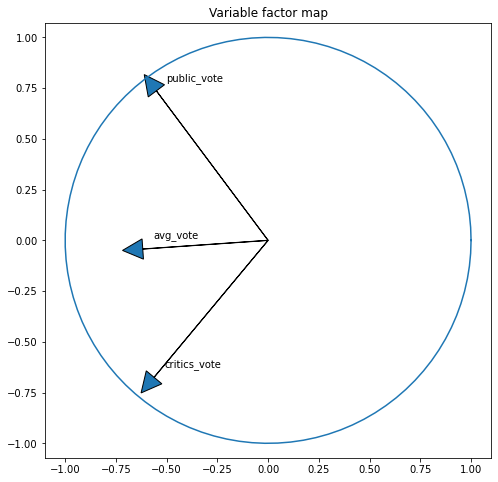

In [139]:
#Cercle des corrélations
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca_vote.components_.shape[0]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca_vote.components_[0, i],  #0 for PC1
             pca_vote.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca_vote.components_[0, i] + 0.05,
             pca_vote.components_[1, i] + 0.05,
             X_train_acp_vote.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

In [140]:
#Ajout de la variable latente 1 à la place de avg_vote, critics_vote, public_vote
X_train_sc=pd.concat([X_train_sc, X_train_acp_vote['PC1']], axis=1, join='inner')

X_train_sc.rename(columns = {'PC1':'PC_vote'}, inplace = True)
X_train_sc.drop(["avg_vote","critics_vote","public_vote"], axis = 1, inplace = True)

X_test_sc.rename(columns = {'PC1':'PC_vote'}, inplace = True)
X_test_sc.drop(["avg_vote","critics_vote","public_vote","PC2","PC3"], axis = 1, inplace = True)

In [141]:
display(X_train_sc)

year  duration  total_votes     humor    rhythm    effort  \
0     -1.839872 -0.435662    -0.020536 -0.817789  0.442268  0.966807   
1      1.117092 -2.300206    -0.640896 -0.817789 -1.475341 -0.723458   
2     -0.107936 -2.499978    -0.511654 -0.817789 -1.475341 -0.723458   
3      0.272246  1.295699     2.564295  2.184310  1.401073  0.121674   
4      0.356730  0.030473    -0.279019  0.182911  0.442268 -0.723458   
...         ...       ...          ...       ...       ...       ...   
12053  1.117092 -0.036117    -0.692592 -0.817789 -1.475341 -0.723458   
12054 -0.234663  0.163655     0.832458  3.185010  1.401073  0.121674   
12055 -0.952782 -0.235890    -0.589199  0.182911  0.442268 -0.723458   
12056 -2.431265 -2.167024     1.892239  3.185010  1.401073 -0.723458   
12057 -1.713145 -0.702026    -0.589199  0.182911  0.442268 -0.723458   

        tension   erotism  ton_global  per_comedy_casting  xp_casting   EU  \
0      1.059384 -0.586383    0.243123           -0.417889   -0.630357  1.0   
1     -0.873735 -0.586383   -1.609222           -1.848587   -0.661801  0.0   
2     -0.873735 -0.586383   -1.609222           -0.322509    0.533049  1.0   
3      1.059384 -0.586383    0.243123            0.059010   -0.881905  0.0   
4     -0.873735 -0.586383   -1.609222           -0.213504   -0.661801  0.0   
...         ...       ...         ...                 ...         ...  ...   
12053 -0.873735 -0.586383   -0.219963           -1.848587   -0.630357  0.0   
12054  1.059384  0.863998   -0.374325           -0.894789   -0.756131  0.0   
12055 -0.873735 -0.586383    1.169296            1.966607   -0.410253  1.0   
12056 -0.873735 -0.586383   -0.374325            1.966607   -0.536027  0.0   
12057 -0.873735 -0.586383   -0.991774            1.379654   -0.473140  1.0   

        NA Inter   PC_vote  
0      0.0   0.0 -2.862113  
1      0.0   1.0 -1.628503  
2      0.0   0.0  1.782336  
3      0.0   1.0 -2.109689  
4      0.0   1.0  1.161987  
...    ...   ...       ...  
12053  0.0   1.0 -1.790454  
12054  1.0   0.0 -1.097644  
12055  0.0   0.0  3.059278  
12056  1.0   0.0 -2.475313  
12057  0.0   0.0  3.012891  

[12058 rows x 15 columns]

### ACP : rhythm, effort, tension

In [142]:
##Premier groupe de variables corrélées
X_train_acp_ter=X_train_sc[["effort","tension","rhythm"]].copy()

In [143]:
#Initialisation de l'ACP
n_components_ter=X_train_acp_ter.shape[1]
pca_ter = PCA(n_components=n_components_ter)
pca_ter.fit(X_train_acp_ter) #Fit sur l'ech de Train
reduced = pca_ter.transform(X_train_acp_ter)
X_test_acp_ter = pca_ter.transform(X_test_sc[["effort","tension","rhythm"]]) #Application de l'ACP train sur l'ech de test

for i in range(0, n_components_ter):
    X_train_acp_ter['PC' + str(i + 1)] = reduced[:, i]
    X_test_sc['PC' + str(i + 1)] = X_test_acp_ter[:, i]
    
display(X_train_acp_ter.head(5))

effort   tension    rhythm       PC1       PC2       PC3
0  0.966807  1.059384  0.442268  1.442495 -0.380511  0.164411
1 -0.723458 -0.873735 -1.475341 -1.754561 -0.603271  0.144959
2 -0.723458 -0.873735 -1.475341 -1.754561 -0.603271  0.144959
3  0.121674  1.059384  1.401073  1.481595  0.882770  0.354536
4 -0.723458 -0.873735  0.442268 -0.705962  0.903237 -0.410106

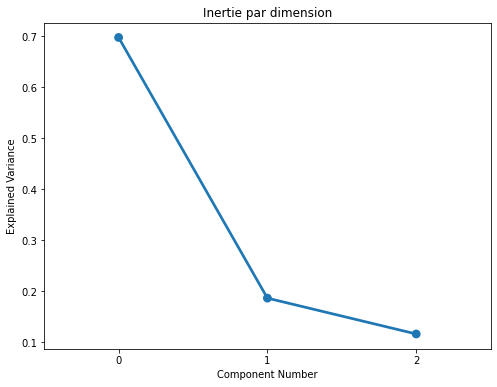

In [144]:
# Graphique des valeurs propres
ind = np.arange(0, n_components_ter)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca_ter.explained_variance_ratio_)
ax.set_title('Inertie par dimension')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

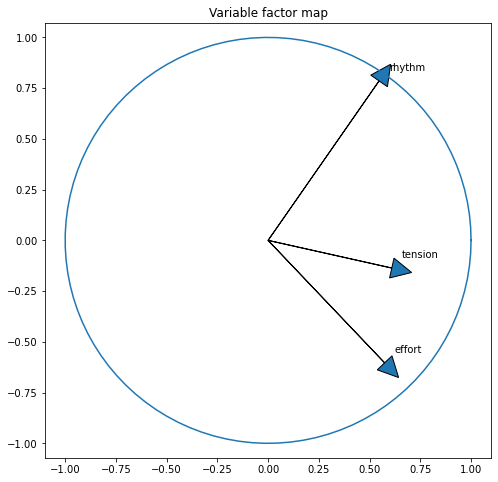

In [146]:
#Cercle des corrélations
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca_ter.components_.shape[0]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca_ter.components_[0, i],  #0 for PC1
             pca_ter.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca_ter.components_[0, i] + 0.05,
             pca_ter.components_[1, i] + 0.05,
             X_train_acp_ter.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

Sélection des variables latentes 1 et 2

In [147]:
#Ajout de la variable latente 1 à la place de avg_vote, critics_vote, public_vote
X_train_sc=pd.concat([X_train_sc, X_train_acp_ter[['PC1','PC2']]], axis=1, join='inner')

X_train_sc.rename(columns = {'PC1':'PC1_ter','PC2':'PC2_ter'}, inplace = True)
X_train_sc.drop(["tension","effort","rhythm"], axis = 1, inplace = True)

X_test_sc.rename(columns = {'PC1':'PC1_ter','PC2':'PC2_ter'}, inplace = True)
X_test_sc.drop(["tension","effort","rhythm","PC3"], axis = 1, inplace = True)

In [148]:
display(X_train_sc)

year  duration  total_votes     humor   erotism  ton_global  \
0     -1.839872 -0.435662    -0.020536 -0.817789 -0.586383    0.243123   
1      1.117092 -2.300206    -0.640896 -0.817789 -0.586383   -1.609222   
2     -0.107936 -2.499978    -0.511654 -0.817789 -0.586383   -1.609222   
3      0.272246  1.295699     2.564295  2.184310 -0.586383    0.243123   
4      0.356730  0.030473    -0.279019  0.182911 -0.586383   -1.609222   
...         ...       ...          ...       ...       ...         ...   
12053  1.117092 -0.036117    -0.692592 -0.817789 -0.586383   -0.219963   
12054 -0.234663  0.163655     0.832458  3.185010  0.863998   -0.374325   
12055 -0.952782 -0.235890    -0.589199  0.182911 -0.586383    1.169296   
12056 -2.431265 -2.167024     1.892239  3.185010 -0.586383   -0.374325   
12057 -1.713145 -0.702026    -0.589199  0.182911 -0.586383   -0.991774   

       per_comedy_casting  xp_casting   EU   NA Inter   PC_vote   PC1_ter  \
0               -0.417889   -0.630357  1.0  0.0   0.0 -2.862113  1.442495   
1               -1.848587   -0.661801  0.0  0.0   1.0 -1.628503 -1.754561   
2               -0.322509    0.533049  1.0  0.0   0.0  1.782336 -1.754561   
3                0.059010   -0.881905  0.0  0.0   1.0 -2.109689  1.481595   
4               -0.213504   -0.661801  0.0  0.0   1.0  1.161987 -0.705962   
...                   ...         ...  ...  ...   ...       ...       ...   
12053           -1.848587   -0.630357  0.0  0.0   1.0 -1.790454 -1.754561   
12054           -0.894789   -0.756131  0.0  1.0   0.0 -1.097644  1.481595   
12055            1.966607   -0.410253  1.0  0.0   0.0  3.059278 -0.705962   
12056            1.966607   -0.536027  0.0  1.0   0.0 -2.475313 -0.181662   
12057            1.379654   -0.473140  1.0  0.0   0.0  3.012891 -0.705962   

        PC2_ter  
0     -0.380511  
1     -0.603271  
2     -0.603271  
3      0.882770  
4      0.903237  
...         ...  
12053 -0.603271  
12054  0.882770  
12055  0.903237  
12056  1.656491  
12057  0.903237  

[12058 rows x 14 columns]

#### Corrélation après ACP

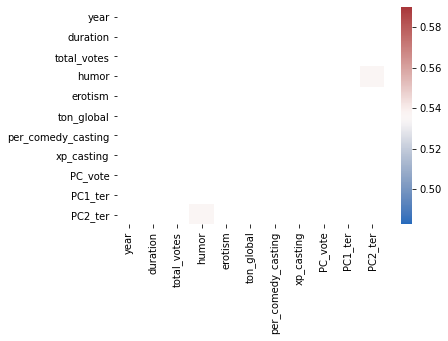

In [149]:
#Matrice des corrélations (supérieur à 0.5)
matrix_acp=X_train_sc._get_numeric_data().corr(method="spearman")
sns.heatmap(matrix_acp[(abs(matrix_acp)>=0.50) & (abs(matrix_acp)!=1)],cmap='vlag')
plt.show()

Concernant la 2ème ACP, la variable humor est très fortement corrélée avec rhythm. Nous l’avons pas inclus dans l’ACP parce que :
- Les 2 premières composantes de l’ACP avec humor représentent largement moins d’inertie (pour PC1 et pour PC2) que l’ACP sans humor
- La sélection des variables indiquent que humor est la variable la plus discriminante du genre du film (contrairement aux variables latentes de l’ACP avec humor) <br>
Nous avons donc fait le choix de ne pas synthétiser cette variable dans une ACP, malgré sa forte corrélation de 0.54 avec la variable latente PC_2_ter.


## Sélection des variables (avec variables latentes)

### 1. Sélection automatique des variables

In [151]:
#Sélection des variables
model1 = LogisticRegression()
rfe1 = RFE(model1, n_features_to_select=1)
fit1 = rfe1.fit(X_train_sc, y_train)

In [152]:
#Classement des variables
ranking=list(fit1.ranking_)
rank_1=[]

for i in range(1,X_train_sc.shape[1]+1):
    rank_1.append(X_train_sc.columns[ranking.index(i)])

### 2. Sélection par Arbre de décision

In [153]:
#Sélection des variables
model2 = DecisionTreeRegressor()
rfe2 = RFE(model2, n_features_to_select=1)
fit2 = rfe2.fit(X_train_sc, y_train)

In [154]:
#Classement des variables
ranking=list(fit2.ranking_)
rank_2=[]

for i in range(1,X_train_sc.shape[1]+1):
    rank_2.append(X_train_sc.columns[ranking.index(i)])

### 3. Sélection par RandomForest Forward

https://www.kdnuggets.com/2018/06/step-forward-feature-selection-python.html

In [155]:
#Sélection des variables (Forward)
model3 = RandomForestClassifier()

sfs1 = sfs(model3,k_features=X_train_sc.shape[1], scoring='accuracy',cv=5,forward=True)
fit3 = sfs1.fit(X_train_sc, y_train)

In [156]:
#Classement des variables
ranking_del=[]
rank_3=[]

for i in range(1,X_train_sc.shape[1]+1):
    ranking=[w for w in list(fit3.subsets_[i]['feature_idx']) if w not in ranking_del]
    rank_3.append(X_train_sc.columns[ranking[0]])
    ranking_del.append(ranking[0])

### 4. Sélection par RandomForest Backward

http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

In [157]:
#Sélection des variables (Backward)
model4 = RandomForestClassifier()

sfs2 = sfs(model4,k_features=1, scoring='accuracy',cv=5,forward=False)
fit4 = sfs2.fit(X_train_sc, y_train)

In [158]:
#Classement des variables
ranking_del=[]
rank_4=[]

for i in range(1,X_train_sc.shape[1]+1):
    ranking=[w for w in list(fit4.subsets_[i]['feature_idx']) if w not in ranking_del]
    rank_4.append(X_train_sc.columns[ranking[0]])
    ranking_del.append(ranking[0])

### 5. Sélection univariée

https://www.askpython.com/python/examples/feature-selection-in-python

In [159]:
#Sélection des variables
bestfeatures = SelectKBest(k=X_train_sc.shape[1])
fit5 = bestfeatures.fit(X_train_sc, y_train)

In [160]:
#Classement des variables
featureScores = pd.concat([pd.DataFrame(fit5.feature_names_in_),pd.DataFrame(fit5.scores_)],axis=1)
featureScores.columns = ['Variable','Score']  #naming the dataframe columns
rank_5=list(featureScores.sort_values(by=["Score"],ascending=False)["Variable"])

### Comparaison des sélections de variables

In [161]:
#Dataframe de comparaison des sélections
d = {'c1': rank_1, 'c2': rank_2, 'c3': rank_3, 'c4': rank_4, 'c5': rank_5}

classement_select = pd.concat([pd.Series(v, name=k) for k, v in d.items()], axis=1)

In [372]:
#Tableau de comparaison des sélections de variables
display(classement_select)

c1                  c2                  c3  \
0                humor               humor               humor   
1              PC1_ter             PC_vote             PC1_ter   
2              PC2_ter             PC1_ter                  EU   
3   per_comedy_casting  per_comedy_casting             PC2_ter   
4                Inter                year               Inter   
5           xp_casting          xp_casting                  NA   
6             duration            duration             erotism   
7              PC_vote         total_votes  per_comedy_casting   
8              erotism          ton_global          xp_casting   
9           ton_global             PC2_ter          ton_global   
10                year                  EU         total_votes   
11                  NA               Inter                year   
12                  EU             erotism            duration   
13         total_votes                  NA             PC_vote   

                    c4                  c5  
0                humor               humor  
1              PC1_ter             PC2_ter  
2   per_comedy_casting  per_comedy_casting  
3                 year             PC_vote  
4             duration          xp_casting  
5              PC_vote             PC1_ter  
6                   NA               Inter  
7                Inter            duration  
8           ton_global          ton_global  
9              erotism                  NA  
10         total_votes                year  
11          xp_casting                  EU  
12                  EU         total_votes  
13             PC2_ter             erotism

In [163]:
#Dataframe de comparaison des classements de sélection
classement_select_num2=classement_select.copy()
classement_select_num2.index=X_train_sc.columns

In [164]:
#Rank par variable et par sélection
for i in classement_select_num2.index :
    for j in classement_select_num2.columns :
        #print(i)
        #print(j)
        classement_select_num2.loc[i,j]=classement_select.loc[classement_select[j]==i,j].index[0]

In [165]:
#Moyenne des rangs des sélections
#print(classement_select_num1.mean(axis=1).sort_values())
print(classement_select_num2.mean(axis=1).sort_values())

humor                  0.0
PC1_ter                2.0
per_comedy_casting     3.4
PC2_ter                5.6
PC_vote                5.8
Inter                  6.4
xp_casting             6.6
duration               7.0
year                   7.6
ton_global             8.4
NA                     8.8
EU                     9.4
erotism                9.6
total_votes           10.4
dtype: float64


# Modélisation

## Random Forest

### Arbre de décision

In [166]:
#Initialisation du modèle
Dtree = tree.DecisionTreeClassifier(random_state=1,max_depth=30,min_samples_split=0.05)
Dtree.fit(X_train_sc, y_train)            

DecisionTreeClassifier(max_depth=30, min_samples_split=0.05, random_state=1)

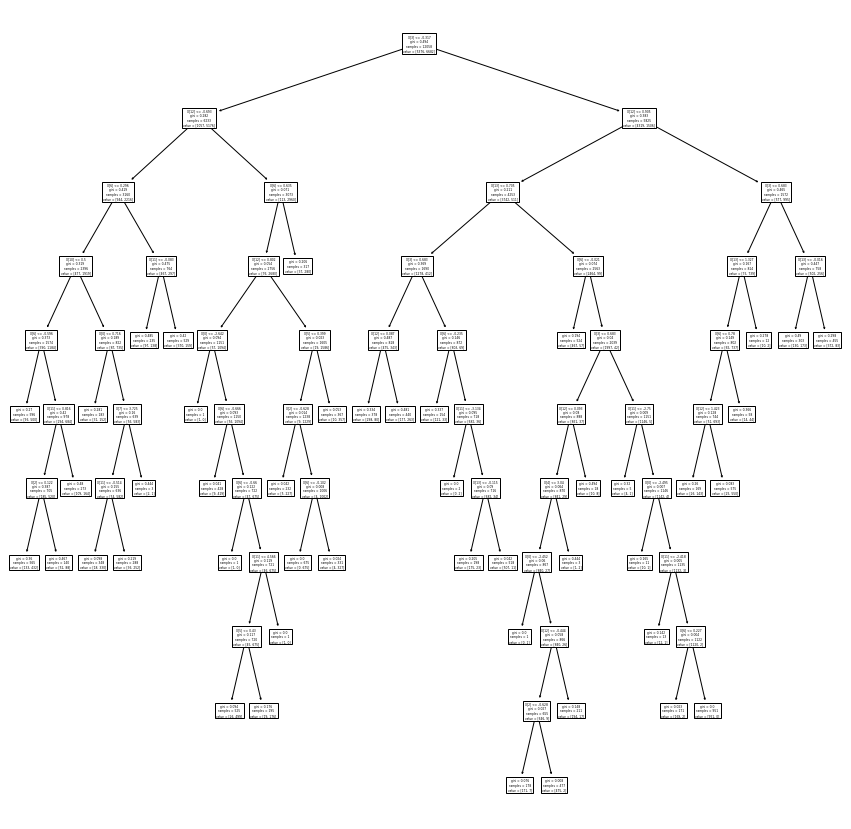

In [167]:
#Arbre de décision
plt.figure(figsize=(15,15))
tree.plot_tree(Dtree);

In [168]:
#Indicateur du modèle
indicateur(Dtree,X_train_sc, y_train,"Train")
indicateur(Dtree,X_test_sc, y_test,"Test")

Indicateur de l'échantillon Train : 
Matrice de confusion : [[4321 1055]
 [ 488 6194]]
Qualité du modèle : 0.87
Taux d'erreur : 0.13
Recall : 0.87
Precision : 0.88
F1 score : 0.87
Indicateur de l'échantillon Test : 
Matrice de confusion : [[1851  454]
 [ 222 2642]]
Qualité du modèle : 0.87
Taux d'erreur : 0.13
Recall : 0.86
Precision : 0.87
F1 score : 0.87


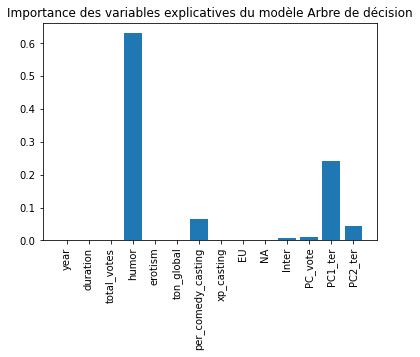

In [169]:
#Graphique d'importance des variables
plt.bar(X_train_sc.columns,Dtree.feature_importances_)
plt.xticks(rotation=90)
plt.title("Importance des variables explicatives du modèle Arbre de décision")
plt.show()

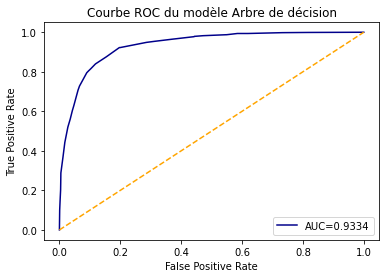

0.9334291193543306

In [170]:
#Courbe ROC et AUC
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC du modèle Arbre de décision')
plot_roc_curve_RF(Dtree,X_test_sc,y_test)

### Random Forest Classique

In [171]:
#Initialisation du modèle
RF =RandomForestClassifier(random_state=1,max_depth=30,min_samples_split=0.05,n_estimators=200)
RF.fit(X_train_sc, y_train)

RandomForestClassifier(max_depth=30, min_samples_split=0.05, n_estimators=200,
                       random_state=1)

In [172]:
#Indicateur du modèle
indicateur(RF,X_train_sc, y_train,"Train")
indicateur(RF,X_test_sc, y_test,"Test")

Indicateur de l'échantillon Train : 
Matrice de confusion : [[4325 1051]
 [ 444 6238]]
Qualité du modèle : 0.88
Taux d'erreur : 0.12
Recall : 0.87
Precision : 0.88
F1 score : 0.87
Indicateur de l'échantillon Test : 
Matrice de confusion : [[1855  450]
 [ 200 2664]]
Qualité du modèle : 0.87
Taux d'erreur : 0.13
Recall : 0.87
Precision : 0.88
F1 score : 0.87


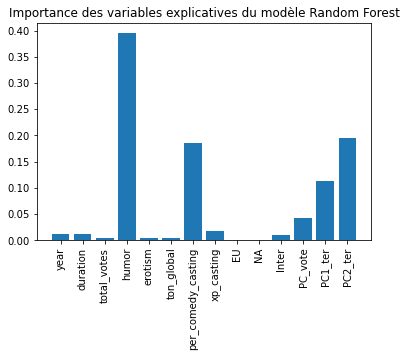

In [173]:
#Graphique d'importance des variables
plt.bar(X_train_sc.columns,RF.feature_importances_)
plt.xticks(rotation=90)
plt.title("Importance des variables explicatives du modèle Random Forest")
plt.show()

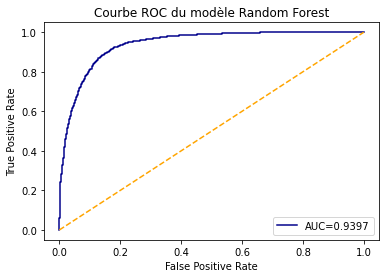

0.939738423878137

In [174]:
#Courbe ROC et AUC
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC du modèle Random Forest')
plot_roc_curve_RF(RF,X_test_sc,y_test)

### Bagging

In [175]:
#Initialisation du modèle
Bag =BaggingClassifier(random_state=1,n_estimators=200)
Bag.fit(X_train_sc, y_train)

BaggingClassifier(n_estimators=200, random_state=1)

In [176]:
#Indicateur du modèle
indicateur(Bag,X_train_sc, y_train,"Train")
indicateur(Bag,X_test_sc, y_test,"Test")

Indicateur de l'échantillon Train : 
Matrice de confusion : [[5376    0]
 [   0 6682]]
Qualité du modèle : 1.0
Taux d'erreur : 0.0
Recall : 1.0
Precision : 1.0
F1 score : 1.0
Indicateur de l'échantillon Test : 
Matrice de confusion : [[1919  386]
 [ 251 2613]]
Qualité du modèle : 0.88
Taux d'erreur : 0.12
Recall : 0.87
Precision : 0.88
F1 score : 0.87


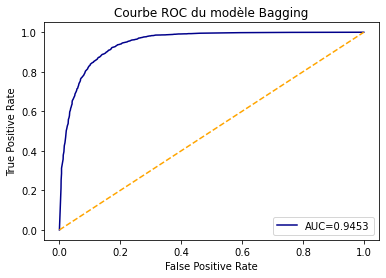

0.9452941140828172

In [177]:
#Courbe ROC et AUC
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC du modèle Bagging')
plot_roc_curve_RF(Bag,X_test_sc,y_test)

### Boosting 1 : XGBoost

In [178]:
#Conversion des variables quali en booléen pour le Boosting
X_train_sc2=X_train_sc.copy()
X_test_sc2=X_test_sc.copy()

X_train_sc2[["EU","NA","Inter"]]=X_train_sc2[["EU","NA","Inter"]].astype(bool)
X_test_sc2[["EU","NA","Inter"]]=X_test_sc2[["EU","NA","Inter"]].astype(bool)

In [179]:
#Initialisation du modèle
XGB=XGBClassifier(random_state=1,n_estimators=200,max_depth=30)
XGB.fit(X_train_sc2, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=30, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1, ...)

In [180]:
#Indicateur du modèle
indicateur(XGB,X_train_sc2, y_train,"Train")
indicateur(XGB,X_test_sc2, y_test,"Test")

Indicateur de l'échantillon Train : 
Matrice de confusion : [[5376    0]
 [   0 6682]]
Qualité du modèle : 1.0
Taux d'erreur : 0.0
Recall : 1.0
Precision : 1.0
F1 score : 1.0
Indicateur de l'échantillon Test : 
Matrice de confusion : [[1915  390]
 [ 250 2614]]
Qualité du modèle : 0.88
Taux d'erreur : 0.12
Recall : 0.87
Precision : 0.88
F1 score : 0.87


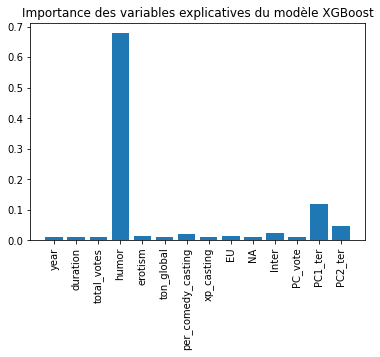

In [181]:
#Graphique d'importance des variables
plt.bar(X_train_sc2.columns,XGB.feature_importances_)
plt.xticks(rotation=90)
plt.title("Importance des variables explicatives du modèle XGBoost")
plt.show()

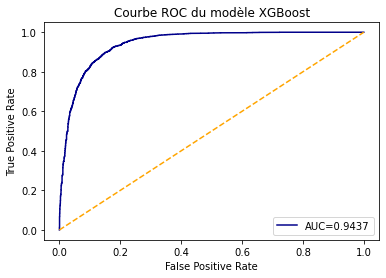

0.9437299288648674

In [182]:
#Courbe ROC et AUC
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC du modèle XGBoost')
plot_roc_curve_RF(XGB,X_test_sc2,y_test)

### Boosting 2 : LightGBM

In [183]:
#Initialisation du modèle
LGBM=lgb.LGBMClassifier(random_state=1,n_estimators=200,max_depth=30)
LGBM.fit(X_train_sc2, y_train)

LGBMClassifier(max_depth=30, n_estimators=200, random_state=1)

In [184]:
#Indicateur du modèle
indicateur(LGBM,X_train_sc2, y_train,"Train")
indicateur(LGBM,X_test_sc2, y_test,"Test")

Indicateur de l'échantillon Train : 
Matrice de confusion : [[4931  445]
 [ 153 6529]]
Qualité du modèle : 0.95
Taux d'erreur : 0.05
Recall : 0.95
Precision : 0.95
F1 score : 0.95
Indicateur de l'échantillon Test : 
Matrice de confusion : [[1926  379]
 [ 224 2640]]
Qualité du modèle : 0.88
Taux d'erreur : 0.12
Recall : 0.88
Precision : 0.89
F1 score : 0.88


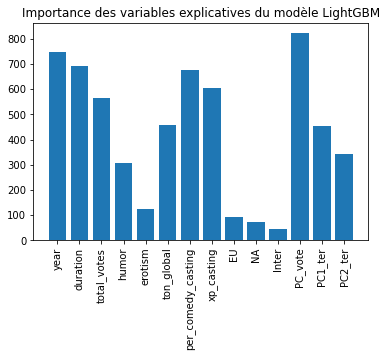

In [185]:
#Graphique d'importance des variables
plt.bar(X_train_sc2.columns,LGBM.feature_importances_)
plt.xticks(rotation=90)
plt.title("Importance des variables explicatives du modèle LightGBM")
plt.show()

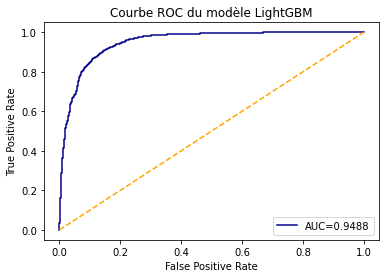

0.9488042147868976

In [186]:
#Courbe ROC et AUC
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC du modèle LightGBM')
plot_roc_curve_RF(LGBM,X_test_sc2,y_test)

### Comparaison des modèles Random Forest

In [187]:
#Cross-validation
Dtree_cv = cross_val_score(Dtree, X_train_sc, y_train, cv=5, scoring='accuracy')
RF_cv = cross_val_score(RF, X_train_sc, y_train, cv=5, scoring='accuracy')
Bag_cv = cross_val_score(Bag, X_train_sc, y_train, cv=5, scoring='accuracy')
XGB_cv = cross_val_score(XGB, X_train_sc2, y_train, cv=5, scoring='accuracy')
LGBM_cv = cross_val_score(LGBM, X_train_sc2, y_train, cv=5, scoring='accuracy')

In [188]:
#Dataframe de la Cross-validation
df_cross_RF = pd.DataFrame(np.transpose(np.c_[Dtree_cv,RF_cv,Bag_cv,XGB_cv,LGBM_cv]), 
                        columns=['fold1','fold2','fold3','fold4','fold5'])
#Adding model label
df_cross_RF['model'] = ['Arbre de décision','Random Forest','Bagging','XGBoosting','LightGBM']
df_cross_RF.index=['Arbre de décision','Random Forest','Bagging','XGBoosting','LightGBM']

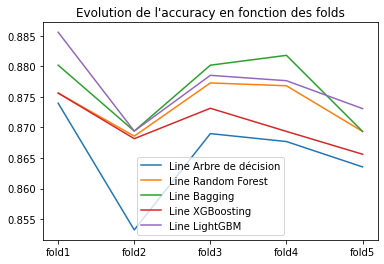

In [189]:
#Regardons l'évolution des scores pour chaque fold
for i in range(df_cross_RF.shape[0]):
    plt.plot( df_cross_RF.iloc[i,0:5] ,label='Line '+str(df_cross_RF.iloc[i,5]))

plt.legend()
plt.title("Evolution de l'accuracy en fonction des folds")
plt.show()

In [190]:
#Moyenne de chaque méthode
print(df_cross_RF.mean(axis=1))

Arbre de décision    0.865484
Random Forest        0.873528
Bagging              0.876182
XGBoosting           0.870376
LightGBM             0.876845
dtype: float64


**Sélection des modèles :** <br>
-Arbre de décision : pas de surapprentissage sur le premier modèle, mais en dessous des autres modèles avec la cross-validation <br>-> éliminiation <br>
-Random Forest : pas de surapprentissage sur le premier modèle, et CV un peu en dessous des autres modèles. Tuner ce modèle ne créé pas de surapprentissage (mais pas une grosse amélioration de la qualité) <br> -> on garde <br>
-Bagging : surapprentissage (qualité du modèle=1). Tuner le modèle ne peut pas améliorer ce surapprentissage <br> -> élimination <br>
-XGBoosting : surapprentissage (qualité du modèle=1). Tuner le modèle ne peut pas améliorer ce surapprentissage <br> -> élimination <br>
-LightGBM : léger surappentissage (différence de 0.1 entre train et test). Avec la CV, c'est un des meilleurs modèle. Tuner le modèle réduit le surapprentissage <br> -> on garde


## Random Search

### Random Forest Classique

Random Search en commentaire pour ne pas perdre de temps d'exécution. De plus, ça nous permet de sauvegarder le Random Search réalisé la première fois.

In [191]:
# #Random Forest : Random Search
# t0 = time.time()

# param_grid = {
#     "max_depth": randint(2,50),
#     "min_samples_split": uniform(0.05,0.5),
#     "n_estimators": randint(20,500),
#     "class_weight" : [None,"balanced"]
#             }


# RS_RF =RandomizedSearchCV(RandomForestClassifier(random_state=1),
#                         param_distributions=param_grid,
#                         n_iter=10,
#                         cv=5,
#                         scoring='accuracy'
#                        )

# grid_clf_RF = RS_RF.fit(X_train_sc, y_train)

# t1 = time.time()
# print("{} s".format(t1 - t0))

In [192]:
#Random Forest : Random Search
t0 = time.time()

param_grid = {
    "max_depth": [37],
    "min_samples_split": [0.12],
    "n_estimators": [409],
    "class_weight" : [None]
            }


RS_RF =RandomizedSearchCV(RandomForestClassifier(random_state=1),
                        param_distributions=param_grid,
                        n_iter=10,
                        cv=5,
                        scoring='accuracy'
                       )

grid_clf_RF = RS_RF.fit(X_train_sc, y_train)

t1 = time.time()
print("{} s".format(t1 - t0))

C:\Users\lebru\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning:

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.



9.18908405303955 s


In [193]:
#Création du Dataframe GridSearch
grid_clf_RF_df=pd.DataFrame(grid_clf_RF.cv_results_["params"])
grid_clf_RF_df["score"]=grid_clf_RF.cv_results_["mean_test_score"]

grid_clf_RF_df.head(5)

n_estimators  min_samples_split  max_depth class_weight     score
0           409               0.12         37         None  0.854785

In [194]:
#Meilleur modèle
grid_clf_RF_best=grid_clf_RF.best_estimator_
print("\033[1m"+"Paramètres optimaux : "+"\033[0m"  + str(grid_clf_RF.best_estimator_))

grid_clf_RF_best.fit(X_train_sc, y_train)
indicateur(grid_clf_RF_best,X_train_sc, y_train,"Train")
indicateur(grid_clf_RF_best,X_test_sc, y_test,"Test")

Paramètres optimaux : RandomForestClassifier(max_depth=37, min_samples_split=0.12, n_estimators=409,
                       random_state=1)
Indicateur de l'échantillon Train : 
Matrice de confusion : [[4010 1366]
 [ 378 6304]]
Qualité du modèle : 0.86
Taux d'erreur : 0.14
Recall : 0.84
Precision : 0.87
F1 score : 0.85
Indicateur de l'échantillon Test : 
Matrice de confusion : [[1697  608]
 [ 149 2715]]
Qualité du modèle : 0.85
Taux d'erreur : 0.15
Recall : 0.84
Precision : 0.87
F1 score : 0.85


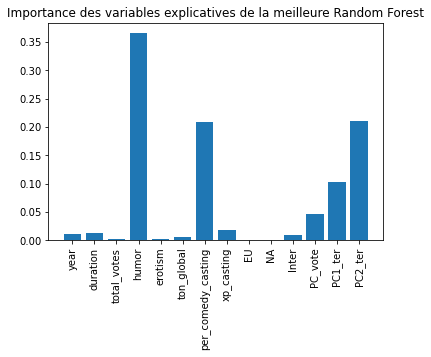

In [195]:
#Graphique d'importance des variables
plt.bar(X_train_sc.columns,grid_clf_RF_best.feature_importances_)
plt.xticks(rotation=90)
plt.title("Importance des variables explicatives de la meilleure Random Forest")
plt.show()

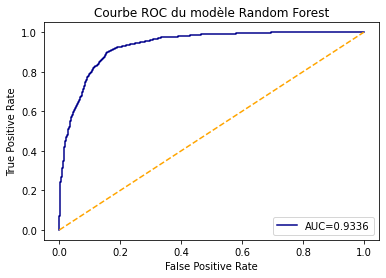

0.9335622705073983

In [196]:
#Courbe ROC et AUC
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC du modèle Random Forest')
plot_roc_curve_RF(grid_clf_RF_best,X_test_sc,y_test)

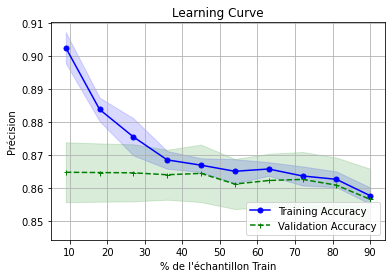

In [197]:
#Learning curve
Lcurve(grid_clf_RF_best,X_train_sc,y_train)

### Boosting 2 : LightGBM

Random Search en commentaire pour ne pas perdre de temps d'exécution. De plus, ça nous permet de sauvegarder le Random Search réalisé la première fois

In [198]:
# #LightGBM : Random Search
# t0 = time.time()

# param_grid = {
#     "max_depth": randint(2,50),
#     "n_jobs ": randint(1,12),
#     "n_estimators": randint(20,500)
#             }


# RS_LGBM =RandomizedSearchCV(lgb.LGBMClassifier(random_state=1),
#                         param_distributions=param_grid,
#                         n_iter=10,
#                         cv=5,
#                         scoring='accuracy'
#                        )

# grid_clf_LGBM = RS_LGBM.fit(X_train_sc2, y_train)

# t1 = time.time()
# print("{} s".format(t1 - t0))

In [199]:
#LightGBM : Random Search
t0 = time.time()

param_grid = {
    "max_depth": [4],
    "n_jobs ": [7],
    "n_estimators": [117]
            }


RS_LGBM =RandomizedSearchCV(lgb.LGBMClassifier(random_state=1),
                        param_distributions=param_grid,
                        n_iter=10,
                        cv=5,
                        scoring='accuracy'
                       )

grid_clf_LGBM = RS_LGBM.fit(X_train_sc2, y_train)

t1 = time.time()
print("{} s".format(t1 - t0))

C:\Users\lebru\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning:

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.



[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jobs=-1
[LightGBM] [Warning] Unknown parameter: 7
[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jobs=-1
[LightGBM] [Warning] Unknown parameter: 7
[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jobs=-1
[LightGBM] [Warning] Unknown parameter: 7
[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jobs=-1
[LightGBM] [Warning] Unknown parameter: 7
[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jobs=-1
[LightGBM] [Warning] Unknown parameter: 7
[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jobs=-1
[LightGBM] [Warning] Unknown parameter: 7
0.6546931266784668 s


In [200]:
#Création du Dataframe GridSearch
grid_clf_LGBM_df=pd.DataFrame(grid_clf_LGBM.cv_results_["params"])
grid_clf_LGBM_df["score"]=grid_clf_LGBM.cv_results_["mean_test_score"]

grid_clf_LGBM_df.head(5)

n_jobs   n_estimators  max_depth     score
0        7           117          4  0.880494

In [201]:
#Meilleur modèle
grid_clf_LGBM_best=grid_clf_LGBM.best_estimator_
print("\033[1m"+"Paramètres optimaux : "+"\033[0m"  + str(grid_clf_LGBM.best_estimator_))

grid_clf_LGBM_best.fit(X_train_sc2, y_train)
indicateur(grid_clf_LGBM_best,X_train_sc2, y_train,"Train")
indicateur(grid_clf_LGBM_best,X_test_sc2, y_test,"Test")

Paramètres optimaux : LGBMClassifier(max_depth=4, n_estimators=117, n_jobs =7, random_state=1)
Indicateur de l'échantillon Train : 
Matrice de confusion : [[4563  813]
 [ 437 6245]]
Qualité du modèle : 0.9
Taux d'erreur : 0.1
Recall : 0.89
Precision : 0.9
F1 score : 0.89
Indicateur de l'échantillon Test : 
Matrice de confusion : [[1933  372]
 [ 225 2639]]
Qualité du modèle : 0.88
Taux d'erreur : 0.12
Recall : 0.88
Precision : 0.89
F1 score : 0.88


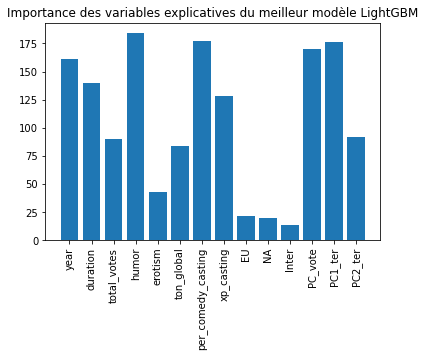

In [202]:
#Graphique d'importance des variables
plt.bar(X_train_sc.columns,grid_clf_LGBM_best.feature_importances_)
plt.xticks(rotation=90)
plt.title("Importance des variables explicatives du meilleur modèle LightGBM")
plt.show()

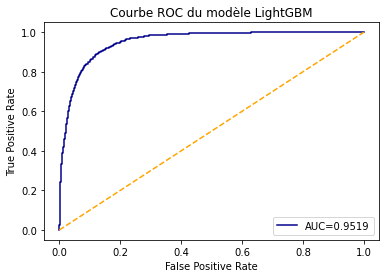

0.9518938062749185

In [203]:
#Courbe ROC et AUC
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC du modèle LightGBM')
plot_roc_curve_RF(grid_clf_LGBM_best,X_test_sc2,y_test)

[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jobs=-1
[LightGBM] [Warning] Unknown parameter: 7
[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jobs=-1
[LightGBM] [Warning] Unknown parameter: 7
[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jobs=-1
[LightGBM] [Warning] Unknown parameter: 7
[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jobs=-1
[LightGBM] [Warning] Unknown parameter: 7
[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jobs=-1
[LightGBM] [Warning] Unknown parameter: 7
[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jobs=-1
[LightGBM] [Warning] Unknown parameter: 7
[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jobs=-1
[LightGBM] [Warning] Unknown parameter: 7
[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jo

[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jobs=-1
[LightGBM] [Warning] Unknown parameter: 7
[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jobs=-1
[LightGBM] [Warning] Unknown parameter: 7
[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jobs=-1
[LightGBM] [Warning] Unknown parameter: 7
[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jobs=-1
[LightGBM] [Warning] Unknown parameter: 7
[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jobs=-1
[LightGBM] [Warning] Unknown parameter: 7
[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jobs=-1
[LightGBM] [Warning] Unknown parameter: 7
[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jobs=-1
[LightGBM] [Warning] Unknown parameter: 7
[LightGBM] [Warning] n_jobs is set=-1, n_jobs= will be ignored. Current value: n_jo

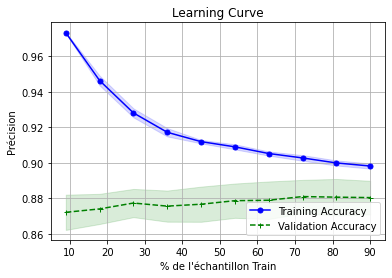

In [204]:
#Learning curve
Lcurve(grid_clf_LGBM_best,X_train_sc2,y_train)

## **SVM** 

### **Régression Logistique**

In [205]:
#Regression logistique
lgr = LogisticRegression(random_state=42)
lgr.fit(X_train_sc, y_train)

LogisticRegression(random_state=42)

In [206]:
#Indicateur du modèle
indicateur(lgr,X_train_sc, y_train,"Train")
indicateur(lgr,X_test_sc, y_test,"Test")

Indicateur de l'échantillon Train : 
Matrice de confusion : [[4434  942]
 [ 515 6167]]
Qualité du modèle : 0.88
Taux d'erreur : 0.12
Recall : 0.87
Precision : 0.88
F1 score : 0.88
Indicateur de l'échantillon Test : 
Matrice de confusion : [[1916  389]
 [ 225 2639]]
Qualité du modèle : 0.88
Taux d'erreur : 0.12
Recall : 0.88
Precision : 0.88
F1 score : 0.88


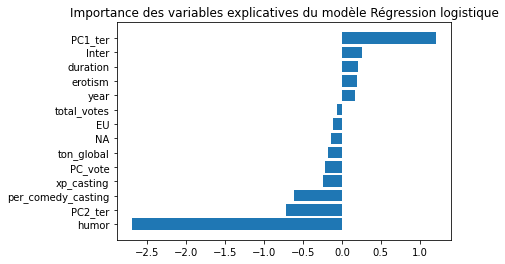

In [207]:
#Graphique d'importance des variables
plt.title("Importance des variables explicatives du modèle Régression logistique")
svm_f_importances(lgr.coef_[0],X_train_sc.columns)

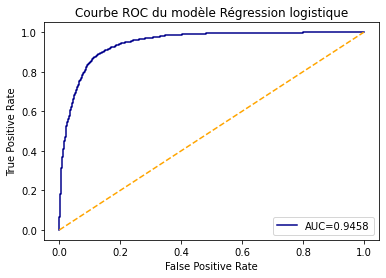

0.9457544626086114

In [208]:
#Courbe ROC et AUC
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC du modèle Régression logistique')
plot_roc_curve_RF(lgr,X_test_sc,y_test)

### SVM Linéaire

In [209]:
#Linear SVM
l_SVC = LinearSVC(random_state=42)
l_SVC.fit(X_train_sc, y_train)

C:\Users\lebru\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC(random_state=42)

In [210]:
#Indicateur du modèle
indicateur(l_SVC,X_train_sc, y_train,"Train")
indicateur(l_SVC,X_test_sc, y_test,"Test")

Indicateur de l'échantillon Train : 
Matrice de confusion : [[4379  997]
 [ 459 6223]]
Qualité du modèle : 0.88
Taux d'erreur : 0.12
Recall : 0.87
Precision : 0.88
F1 score : 0.88
Indicateur de l'échantillon Test : 
Matrice de confusion : [[1887  418]
 [ 209 2655]]
Qualité du modèle : 0.88
Taux d'erreur : 0.12
Recall : 0.87
Precision : 0.88
F1 score : 0.88


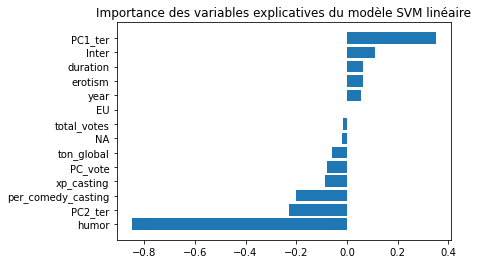

In [211]:
#Graphique d'importance des variables
plt.title("Importance des variables explicatives du modèle SVM linéaire")
svm_f_importances(l_SVC.coef_[0],X_train_sc.columns)

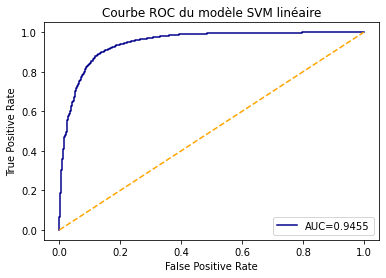

0.9455331499412257

In [212]:
#Courbe ROC et AUC
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC du modèle SVM linéaire')
plot_roc_curve_SVM(l_SVC,X_test_sc,y_test)

### SGD classifier

In [213]:
#SGD classifier
sgdc_svm = SGDClassifier(loss='hinge' ,random_state=42)
sgdc_svm.fit(X_train_sc, y_train)

SGDClassifier(random_state=42)

In [214]:
#Indicateur du modèle
indicateur(sgdc_svm,X_train_sc, y_train,"Train")
indicateur(sgdc_svm,X_test_sc, y_test,"Test")

Indicateur de l'échantillon Train : 
Matrice de confusion : [[4239 1137]
 [ 414 6268]]
Qualité du modèle : 0.87
Taux d'erreur : 0.13
Recall : 0.86
Precision : 0.88
F1 score : 0.87
Indicateur de l'échantillon Test : 
Matrice de confusion : [[1825  480]
 [ 177 2687]]
Qualité du modèle : 0.87
Taux d'erreur : 0.13
Recall : 0.86
Precision : 0.88
F1 score : 0.87


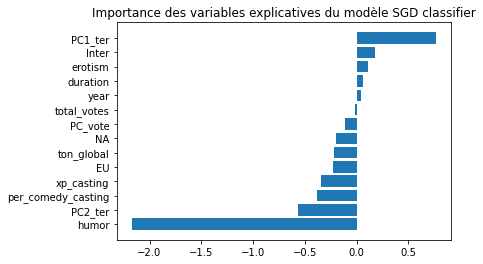

In [215]:
#Graphique d'importance des variables
plt.title("Importance des variables explicatives du modèle SGD classifier")
svm_f_importances(sgdc_svm.coef_[0],X_train_sc.columns)

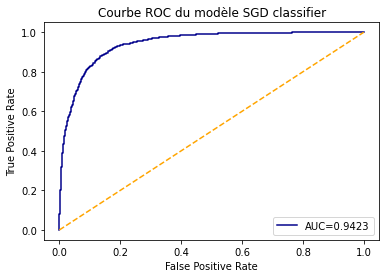

0.9422832923326749

In [216]:
#Courbe ROC et AUC
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC du modèle SGD classifier')
plot_roc_curve_SVM(sgdc_svm,X_test_sc,y_test)

### SVM avec Kernel rbf

In [217]:
#SVM avec kernel = rbf
svc_rbf = SVC(kernel='rbf',random_state=42)
svc_rbf.fit(X_train_sc,y_train)

SVC(random_state=42)

In [218]:
#Indicateur du modèle
indicateur(svc_rbf,X_train_sc, y_train,"Train")
indicateur(svc_rbf,X_test_sc, y_test,"Test")

Indicateur de l'échantillon Train : 
Matrice de confusion : [[4437  939]
 [ 373 6309]]
Qualité du modèle : 0.89
Taux d'erreur : 0.11
Recall : 0.88
Precision : 0.9
F1 score : 0.89
Indicateur de l'échantillon Test : 
Matrice de confusion : [[1883  422]
 [ 182 2682]]
Qualité du modèle : 0.88
Taux d'erreur : 0.12
Recall : 0.88
Precision : 0.89
F1 score : 0.88


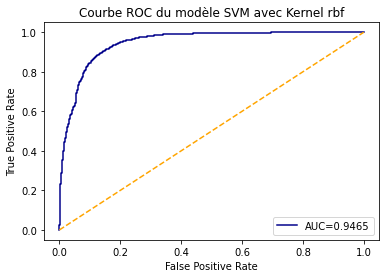

0.9465436747900482

In [219]:
#Courbe ROC et AUC
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC du modèle SVM avec Kernel rbf')
plot_roc_curve_SVM(svc_rbf,X_test_sc,y_test)

### SVM avec Kernel poly

In [220]:
#SVM avec kernel = poly
svc_poly = SVC(kernel='poly',random_state=42)
svc_poly.fit(X_train_sc,y_train)

SVC(kernel='poly', random_state=42)

In [221]:
#Indicateur du modèle
indicateur(svc_poly,X_train_sc, y_train,"Train")
indicateur(svc_poly,X_test_sc, y_test,"Test")

Indicateur de l'échantillon Train : 
Matrice de confusion : [[4394  982]
 [ 381 6301]]
Qualité du modèle : 0.89
Taux d'erreur : 0.11
Recall : 0.88
Precision : 0.89
F1 score : 0.88
Indicateur de l'échantillon Test : 
Matrice de confusion : [[1866  439]
 [ 188 2676]]
Qualité du modèle : 0.88
Taux d'erreur : 0.12
Recall : 0.87
Precision : 0.88
F1 score : 0.88


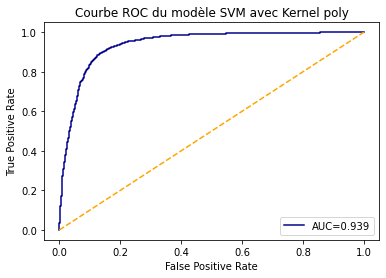

0.9389696615324955

In [222]:
#Courbe ROC et AUC
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC du modèle SVM avec Kernel poly')
plot_roc_curve_SVM(svc_poly,X_test_sc,y_test)

### Comparaison des modèles SVM

In [223]:
#Cross-validation
cvs_lgr = cross_val_score(lgr, X_train_sc, y_train, cv=5, scoring='accuracy')
cvs_lsvc = cross_val_score(l_SVC, X_train_sc, y_train, cv=5, scoring='accuracy')
cvs_svc_rbf = cross_val_score(svc_rbf, X_train_sc, y_train, cv=5, scoring='accuracy')
cvs_svc_poly = cross_val_score(svc_poly, X_train_sc, y_train, cv=5, scoring='accuracy')
cvs_sgdc = cross_val_score(sgdc_svm, X_train_sc, y_train, cv=5, scoring='accuracy')

C:\Users\lebru\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\lebru\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\lebru\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\lebru\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\lebru\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [224]:
#Dataframe de la Cross-validation
df_cross_SVM = pd.DataFrame(np.transpose(np.c_[cvs_lgr,cvs_lsvc,cvs_sgdc,cvs_svc_rbf,cvs_svc_poly]), 
                        columns=['fold1','fold2','fold3','fold4','fold5'])
#Adding model label
df_cross_SVM['model'] = ['Reg logistique','SVM linéaire','SGD Classifier','SVM rbf','SVM poly']

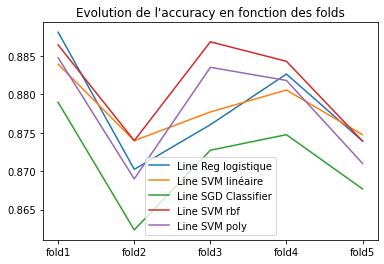

In [225]:
#Regardons l'évolution des scores pour chaque fold
for i in range(df_cross_SVM.shape[0]):
    plt.plot( df_cross_SVM.iloc[i,0:5] ,label='Line '+str(df_cross_SVM.iloc[i,5]))

plt.legend()
plt.title("Evolution de l'accuracy en fonction des folds")
plt.show()

Avec une cross validation de 5 : 
- Nous pouvons voir que le SGDclassifier est complètement dans les choux. Nous n'allons donc pas le sélectionner.
- Le SVC linéaire : jamais meilleur => Pas le garder
- SVC avec un kernel poly : jamais meilleur

- Reg logistic et SVC kernel rbf : se battent en duel. Le SVC rbf à l'air légèrement meilleur.

**Tunage que pour le SVC avec kernel rbf et le régression logistique**

## Random Search

### SVM avec Kernel rbf

Random Search en commentaire pour ne pas perdre de temps d'exécution. De plus, ça nous permet de sauvegarder le Random Search réalisé la première fois

In [226]:
#Linear SVM: Random Search (prend beaucoup de temps à tourner)
# t0 = time.time()

# #l_SVC = LinearSVC(random_state=42)

# param_grid = [
#     {"kernel": ["rbf"], "gamma": uniform(0.001,0.01), "C": uniform(0.5,20)},
# ]


# SVC_rbf=RandomizedSearchCV(SVC(random_state=42),
#                         param_distributions=param_grid,
#                         n_iter=10,
#                         cv=5,
#                         scoring='accuracy'
#                        )

# grid_clf_SVC_rbf = SVC_rbf.fit(X_train_sc, y_train)

# t1 = time.time()
# print("{} s".format(t1 - t0))

In [227]:
#Linear SVM: Random Search
t0 = time.time()

#l_SVC = LinearSVC(random_state=42)

param_grid = [
    {"kernel": ["rbf"], "gamma": [0.008356509792325835], "C": [14.23013875104115]},
]


SVC_rbf=RandomizedSearchCV(SVC(random_state=42),
                        param_distributions=param_grid,
                        n_iter=10,
                        cv=5,
                        scoring='accuracy'
                       )

grid_clf_SVC_rbf = SVC_rbf.fit(X_train_sc, y_train)

t1 = time.time()
print("{} s".format(t1 - t0))

C:\Users\lebru\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning:

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.



14.46283745765686 s


In [228]:
#Création du Dataframe GridSearch
grid_clf_SVC_rbf_df=pd.DataFrame(grid_clf_SVC_rbf.cv_results_["params"])
grid_clf_SVC_rbf_df["score"]=grid_clf_SVC_rbf.cv_results_["mean_test_score"]

grid_clf_SVC_rbf_df.head(5)

kernel     gamma          C     score
0    rbf  0.008357  14.230139  0.883894

In [229]:
#Meilleur modèle
grid_clf_SVC_rbf_best=grid_clf_SVC_rbf.best_estimator_
print("\033[1m"+"Paramètres optimaux : "+"\033[0m"  + str(grid_clf_SVC_rbf.best_estimator_))

grid_clf_SVC_rbf_best.fit(X_train_sc, y_train)
indicateur(grid_clf_SVC_rbf_best,X_train_sc, y_train,"Train")
indicateur(grid_clf_SVC_rbf_best,X_test_sc, y_test,"Test")

Paramètres optimaux : SVC(C=14.23013875104115, gamma=0.008356509792325835, random_state=42)
Indicateur de l'échantillon Train : 
Matrice de confusion : [[4408  968]
 [ 403 6279]]
Qualité du modèle : 0.89
Taux d'erreur : 0.11
Recall : 0.88
Precision : 0.89
F1 score : 0.88
Indicateur de l'échantillon Test : 
Matrice de confusion : [[1880  425]
 [ 178 2686]]
Qualité du modèle : 0.88
Taux d'erreur : 0.12
Recall : 0.88
Precision : 0.89
F1 score : 0.88


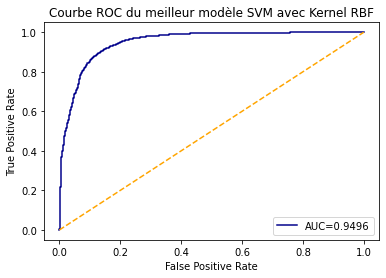

0.9495946388104558

In [230]:
#Courbe ROC et AUC
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC du meilleur modèle SVM avec Kernel RBF')
plot_roc_curve_SVM(grid_clf_SVC_rbf_best,X_test_sc,y_test)

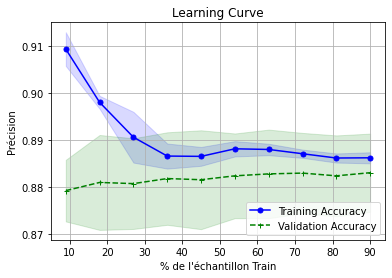

In [231]:
#Learning curve
Lcurve(grid_clf_SVC_rbf_best,X_train_sc,y_train)

C:\Users\lebru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

C:\Users\lebru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



Text(0, 0.5, 'xp_casting')

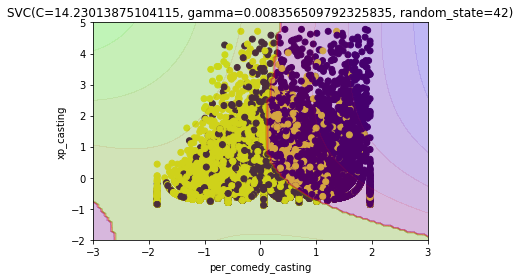

In [232]:
#Représentation graphique pour 2 variables
clf_SVC_rbf_best_2_features =copy.deepcopy(grid_clf_SVC_rbf.best_estimator_)
clf_SVC_rbf_best_2_features.fit(X_train_sc.iloc[:,[X_train_sc.columns.get_loc("per_comedy_casting"),X_train_sc.columns.get_loc("xp_casting")]], y_train)

plt.scatter(X_train_sc.iloc[:,X_train_sc.columns.get_loc("per_comedy_casting")], X_train_sc.iloc[:,X_train_sc.columns.get_loc("xp_casting")], c=y_train)
plot_predictions(clf_SVC_rbf_best_2_features, [-3, 3, -2, 5])

plt.title(str(clf_SVC_rbf_best_2_features))
plt.xlabel("per_comedy_casting")
plt.ylabel("xp_casting")

## Réseaux de neurones

In [233]:
#Conversion de la base en array pour faire fonctionner les réseaux de neurones
X_train_sc3 = np.asarray(X_train_sc).astype(np.float32)
X_test_sc3 = np.asarray(X_test_sc).astype(np.float32)

In [234]:
#Clear du modèle réseau de neurones (si existant)
keras.backend.clear_session()

In [235]:
#Initialisation du modèle réseau de neurones avec GridSearch
ann_model=KerasClassifier(build_fn=build_clf)

Grid Search en commentaire pour ne pas perdre de temps d'exécution. De plus, ça nous permet de sauvegarder le Grid Search réalisé la première fois

In [236]:
# #Réseau de neurones : GridSearch 
# t0 = time.time()

# params={
#     "model__n_hidden": [1,2,3],
#     "model__input_shape": [14],
#     'batch_size':randint(2,50), 
#     'epochs':[10,20,30,40,50],
#     'model__n_neurons':[100]
#         }


# gs=GridSearchCV(estimator=ann_model, param_grid=params, cv=5)

# grid_ann = gs.fit(X_train_sc3, y_train)

# t1 = time.time()
# print("{} s".format(t1 - t0))

In [237]:
#Réseau de neurones : GridSearch 
t0 = time.time()

params={
    "model__n_hidden": [3],
    "model__input_shape": [14],
    'batch_size':[270], 
    'epochs':[20],
    'model__n_neurons':[100]
        }


gs=GridSearchCV(estimator=ann_model, param_grid=params, cv=5)

grid_ann = gs.fit(X_train_sc3, y_train)

t1 = time.time()
print("{} s".format(t1 - t0))

Epoch 1/20


C:\Users\lebru\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



36/36 [==============================] - 1s 2ms/step - loss: 0.4127 - accuracy: 0.8255
Epoch 2/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8754
Epoch 3/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2887 - accuracy: 0.8797
Epoch 4/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2849 - accuracy: 0.8815
Epoch 5/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2795 - accuracy: 0.8831
Epoch 6/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2757 - accuracy: 0.8864
Epoch 7/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2730 - accuracy: 0.8876
Epoch 8/20
36/36 [==============================] - 0s 1ms/step - loss: 0.2702 - accuracy: 0.8864
Epoch 9/20
36/36 [==============================] - 0s 1ms/step - loss: 0.2685 - accuracy: 0.8880
Epoch 10/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2663 - accuracy: 0.8887
Epoch 11/20
36/36 [===========

C:\Users\lebru\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



36/36 [==============================] - 1s 2ms/step - loss: 0.4470 - accuracy: 0.8089
Epoch 2/20
36/36 [==============================] - 0s 1ms/step - loss: 0.2932 - accuracy: 0.8810
Epoch 3/20
36/36 [==============================] - 0s 1ms/step - loss: 0.2834 - accuracy: 0.8833
Epoch 4/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2805 - accuracy: 0.8850
Epoch 5/20
36/36 [==============================] - 0s 1ms/step - loss: 0.2758 - accuracy: 0.8861
Epoch 6/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2712 - accuracy: 0.8893
Epoch 7/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2686 - accuracy: 0.8892
Epoch 8/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2657 - accuracy: 0.8911
Epoch 9/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2642 - accuracy: 0.8915
Epoch 10/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2615 - accuracy: 0.8918
Epoch 11/20
36/36 [===========

C:\Users\lebru\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



36/36 [==============================] - 1s 2ms/step - loss: 0.4516 - accuracy: 0.8070
Epoch 2/20
36/36 [==============================] - 0s 1ms/step - loss: 0.2987 - accuracy: 0.8783
Epoch 3/20
36/36 [==============================] - 0s 1ms/step - loss: 0.2855 - accuracy: 0.8809
Epoch 4/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2798 - accuracy: 0.8826
Epoch 5/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.8823
Epoch 6/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2739 - accuracy: 0.8851
Epoch 7/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2721 - accuracy: 0.8878
Epoch 8/20
36/36 [==============================] - 0s 1ms/step - loss: 0.2674 - accuracy: 0.8895
Epoch 9/20
36/36 [==============================] - 0s 1ms/step - loss: 0.2657 - accuracy: 0.8899
Epoch 10/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2669 - accuracy: 0.8885
Epoch 11/20
36/36 [===========

C:\Users\lebru\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



36/36 [==============================] - 1s 2ms/step - loss: 0.4533 - accuracy: 0.8044
Epoch 2/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2979 - accuracy: 0.8758
Epoch 3/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2848 - accuracy: 0.8810
Epoch 4/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2786 - accuracy: 0.8821
Epoch 5/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2758 - accuracy: 0.8848
Epoch 6/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2730 - accuracy: 0.8840
Epoch 7/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2704 - accuracy: 0.8865
Epoch 8/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2686 - accuracy: 0.8892
Epoch 9/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.8875
Epoch 10/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2645 - accuracy: 0.8890
Epoch 11/20
36/36 [===========

C:\Users\lebru\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



36/36 [==============================] - 1s 2ms/step - loss: 0.4846 - accuracy: 0.7859
Epoch 2/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2954 - accuracy: 0.8787
Epoch 3/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2797 - accuracy: 0.8843
Epoch 4/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2750 - accuracy: 0.8854
Epoch 5/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2706 - accuracy: 0.8862
Epoch 6/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2661 - accuracy: 0.8858
Epoch 7/20
36/36 [==============================] - 0s 1ms/step - loss: 0.2638 - accuracy: 0.8892
Epoch 8/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2609 - accuracy: 0.8900
Epoch 9/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.8899
Epoch 10/20
36/36 [==============================] - 0s 2ms/step - loss: 0.2561 - accuracy: 0.8916
Epoch 11/20
36/36 [===========

C:\Users\lebru\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



45/45 [==============================] - 1s 2ms/step - loss: 0.3957 - accuracy: 0.8410
Epoch 2/20
45/45 [==============================] - 0s 2ms/step - loss: 0.2875 - accuracy: 0.8807
Epoch 3/20
45/45 [==============================] - 0s 2ms/step - loss: 0.2799 - accuracy: 0.8838
Epoch 4/20
45/45 [==============================] - 0s 2ms/step - loss: 0.2773 - accuracy: 0.8850
Epoch 5/20
45/45 [==============================] - 0s 2ms/step - loss: 0.2741 - accuracy: 0.8871
Epoch 6/20
45/45 [==============================] - 0s 2ms/step - loss: 0.2719 - accuracy: 0.8844
Epoch 7/20
45/45 [==============================] - 0s 2ms/step - loss: 0.2695 - accuracy: 0.8883
Epoch 8/20
45/45 [==============================] - 0s 2ms/step - loss: 0.2657 - accuracy: 0.8898
Epoch 9/20
45/45 [==============================] - 0s 2ms/step - loss: 0.2657 - accuracy: 0.8878
Epoch 10/20
45/45 [==============================] - 0s 2ms/step - loss: 0.2625 - accuracy: 0.8910
Epoch 11/20
45/45 [===========

In [238]:
#Meilleur modèle
print(grid_ann.best_params_, grid_ann.best_score_)

{'batch_size': 270, 'epochs': 20, 'model__input_shape': 14, 'model__n_hidden': 3, 'model__n_neurons': 100} 0.8785031018005507


In [239]:
#Suavegarde des hyperparamètres
n_hidden=grid_ann.best_params_["model__n_hidden"]
n_neurons=grid_ann.best_params_["model__n_neurons"]
input_shape=grid_ann.best_params_["model__input_shape"]
n_batch_size=grid_ann.best_params_["batch_size"]
n_epochs=grid_ann.best_params_["epochs"]

In [240]:
#Entrainement du meilleur modèle
ann_best=build_clf(n_hidden, n_neurons,input_shape)
history=ann_best.fit(X_train_sc3, y_train,batch_size=n_batch_size,epochs=n_epochs, validation_split=0.2)

Epoch 1/20
36/36 [==============================] - 1s 7ms/step - loss: 0.4363 - accuracy: 0.8094 - val_loss: 0.3303 - val_accuracy: 0.8624
Epoch 2/20
36/36 [==============================] - 0s 3ms/step - loss: 0.2932 - accuracy: 0.8772 - val_loss: 0.3139 - val_accuracy: 0.8715
Epoch 3/20
36/36 [==============================] - 0s 3ms/step - loss: 0.2799 - accuracy: 0.8810 - val_loss: 0.3077 - val_accuracy: 0.8748
Epoch 4/20
36/36 [==============================] - 0s 3ms/step - loss: 0.2733 - accuracy: 0.8841 - val_loss: 0.3092 - val_accuracy: 0.8744
Epoch 5/20
36/36 [==============================] - 0s 3ms/step - loss: 0.2713 - accuracy: 0.8852 - val_loss: 0.3048 - val_accuracy: 0.8789
Epoch 6/20
36/36 [==============================] - 0s 3ms/step - loss: 0.2686 - accuracy: 0.8867 - val_loss: 0.3012 - val_accuracy: 0.8777
Epoch 7/20
36/36 [==============================] - 0s 3ms/step - loss: 0.2663 - accuracy: 0.8895 - val_loss: 0.3018 - val_accuracy: 0.8769
Epoch 8/20
36/36 [==

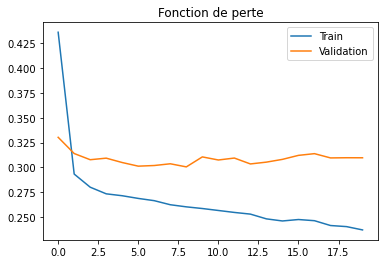

In [241]:
#Graphique de perte du modèle
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Fonction de perte")
plt.xlabel=('epoch')
plt.ylabel=('loss')
plt.legend(["Train","Validation"],loc="upper right")
plt.show()

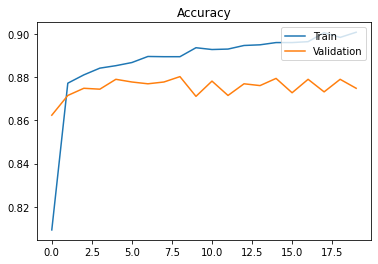

In [242]:
#Graphique de perte du modèle
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel=('epoch')
plt.ylabel=('loss')
plt.legend(["Train","Validation"],loc="upper right")
plt.show()

In [243]:
#Indicateur du modèle
indicateur(ann_best,X_train_sc3, y_train,"Train")
indicateur(ann_best,X_test_sc3, y_test,"Test")

377/377 [==============================] - 0s 872us/step
Indicateur de l'échantillon Train : 
Matrice de confusion : [[4698  678]
 [ 546 6136]]
Qualité du modèle : 0.9
Taux d'erreur : 0.1
Recall : 0.9
Precision : 0.9
F1 score : 0.9
162/162 [==============================] - 0s 861us/step
Indicateur de l'échantillon Test : 
Matrice de confusion : [[1970  335]
 [ 279 2585]]
Qualité du modèle : 0.88
Taux d'erreur : 0.12
Recall : 0.88
Precision : 0.88
F1 score : 0.88


162/162 [==============================] - 0s 820us/step


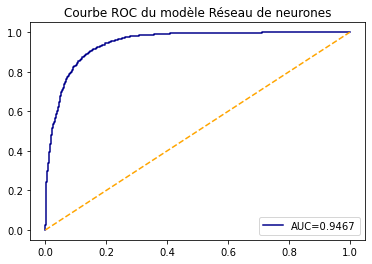

In [244]:
#Courbe ROC
y_pred =ann_best.predict(X_test_sc3)
    
#Taux de faux Positif et Taux de Vrai Positif
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
    
#Calcul de l'AUC
auc = metrics.roc_auc_score(y_test, y_pred) 
    
#Plot
plt.plot(fpr, tpr, color='darkblue', label='AUC=' + str(round(auc,4)))
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.title("Courbe ROC du modèle Réseau de neurones")
plt.legend()
plt.show()

# Inclusion de nouvelles données

https://www.filmtv.it/film/211392/the-fabelmans/ <br>
https://www.filmtv.it/film/213617/eo/ <br>
https://www.filmtv.it/film/220208/i-migliori-giorni/ <br>
https://www.filmtv.it/film/216163/il-grande-giorno/ <br>

Pour aller plus loin dans notre analyse, nous avons souhaité vérifier la reproductibilité de notre code en ajoutant manuellement de nouvelles données. L’idée est de pouvoir ajouter de nouvelles données dans la base, sans avoir besoin de modifier le fichier csv. Ici, les données sont ajoutées manuellement, mais nous pourrions imaginer une méthode que scraping qui récupère de nouveaux films sur le site, qui tente de prédire le genre et qui les ajoute dans la base d’entraînement. L’intérêt pour nous est de vérifier que notre traitement des données et la prédiction des modèles fonctionne même sur de nouvelle données pas dans la base d’origine.

In [245]:
#Ajout de nouvelle données
data={'filmtv_id':[999996,999997,999998,999999],
      'title':['The Fabelmans','EO','I migliori giorni','Il grande giorno'],
      'year':[2022,2022,2023,2022],
      'genre':[1,1,0,0],
      'duration':[151,126,125,103],
      'country':["United States","Poland","Italy","Italy"],
      'actors':[["Michelle Williams","Seth Rogen","Paul Dano","Gabriel LaBelle","Oakes Fegley","Gabriel Bateman","Nicolas Cantu","Julia Butters","Sam Rechner","Judd Hirsch","Chloe East","Isabelle Kusman","Jeannie Berlin","Robin Bartlett","Jonathan Hadary","Cooper Dodson","Gustavo Escobar","Lane Factor","Sophia Kopera","Keeley Karsten","Mateo Zoryon Francis-DeFord"],
                ["Lorenzo Zurzolo","Mateusz Kosciukiewicz","Isabelle Huppert","Sandra Drzymalska","Tomasz Organek"],
                ["Edoardo Leo","Massimiliano Bruno","Anna Foglietta","Max Tortora","Paolo Calabresi","Luca Argentero","Valentina Lodovini","Greta Scarano","Claudia Gerini","Stefano Fresi"],
                ["Aldo Baglio","Giovanni Storti","Giacomo Poretti","Elena Lietti","Lucia Mascino","Antonella Attili","Giovanni Anzaldo","Pietro Ragusa","Roberto Citran","Margherita Mannino","Eleonora Romandini"] ],
      'avg_vote':[7.8,7.6,5.3,5.2],
      'critics_vote':[8,8,5,6],
      'public_vote':[8,7,6,5],
      'total_votes':[98,12,7,27],
      'description':["Sammy Fabelman (Gabrielle LaBelle) is a young man who grows up in Phoenix, Arizona, together with his uncle (Seth Rogen) with whom he gets along very well, and with his mother (Michelle Williams) and father (Paul Dano), with which report is more controversial.",
                     "A donkey faces its journey every day, meeting good or bad people and experiencing joy or pain. Together with him and through his eyes, a picture of contemporary Europe emerges.",
                     "Four episodes, each focusing on a holiday - Christmas, New Year's, Valentine's Day and March 8 - to tell the different ways people deal with holidays. A deputy invites her party secretary to the dinner on the eve, hoping for future support. A wealthy entrepreneur tries to repair a damaged image by spending New Year's Eve as a volunteer at the soup kitchen, where he meets his ex-driver unjustly fired and determined to take revenge. A couple is still celebrating Valentine's Day after 25 years, but this time, with the presence of her lover, there is more traffic than usual. A famous TV presenter is forced to spend March 8 apologizing publicly for having broadcast a report on the ideal woman.",
                     "Giacomo and Giovanni have been friends for many years, as well as business partners. When their respective children, Elio and Caterina, decide to marry, the two friends do not think they can join this piece to their bond and therefore organize a sumptuous ceremony on Lake Como, sparing no luxury, including catering, celebrations, setting up the location. However, something comes to disturb the serenity of the three days of celebration: the new companion of Giovanni's ex-wife, Margherita, mother of the bride. His name is Aldo and he is the opposite of the two friends, exuberant and messy. Precisely with his disordered enthusiasm he will combine troubles, gaffes and accidents that will put a strain on both the event in its entirety and the relationship between Giovanni and Giacomo."],
      'humor':[3,0,1,1],
      'rhythm':[3,0,2,1],
      'effort':[3,1,1,1],
      'tension':[2,1,1,0],
      'erotism':[1,0,0,0],
     }



new_data=pd.DataFrame(data)

In [246]:
new_data

filmtv_id              title  year  genre  duration        country  \
0     999996      The Fabelmans  2022      1       151  United States   
1     999997                 EO  2022      1       126         Poland   
2     999998  I migliori giorni  2023      0       125          Italy   
3     999999   Il grande giorno  2022      0       103          Italy   

                                              actors  avg_vote  critics_vote  \
0  [Michelle Williams, Seth Rogen, Paul Dano, Gab...       7.8             8   
1  [Lorenzo Zurzolo, Mateusz Kosciukiewicz, Isabe...       7.6             8   
2  [Edoardo Leo, Massimiliano Bruno, Anna Fogliet...       5.3             5   
3  [Aldo Baglio, Giovanni Storti, Giacomo Poretti...       5.2             6   

   public_vote  total_votes  \
0            8           98   
1            7           12   
2            6            7   
3            5           27   

                                         description  humor  rhythm  effort  \
0  Sammy Fabelman (Gabrielle LaBelle) is a young ...      3       3       3   
1  A donkey faces its journey every day, meeting ...      0       0       1   
2  Four episodes, each focusing on a holiday - Ch...      1       2       1   
3  Giacomo and Giovanni have been friends for man...      1       1       1   

   tension  erotism  
0        2        1  
1        1        0  
2        1        0  
3        0        0

## Adaptation pour nos modèles

### Création indicateur pays

In [247]:
#Traitement de la variable country
spliting(new_data,"country",", ")

#Retirer des espaces en trop
for i in range(0,new_data.shape[0]) :
    if len(new_data.iloc[i,new_data.columns.get_loc('country')])==1 :
        new_data.iloc[i,new_data.columns.get_loc('country')][0]=new_data.iloc[i,new_data.columns.get_loc('country')][0].strip()

In [248]:
#Répartition par pays
print(new_data['country'].value_counts()) #Répartition non équilibrée

[Italy]            2
[Poland]           1
[United States]    1
Name: country, dtype: int64


In [249]:
#Insertion de 'EU','Inter','NA'
new_data.insert(5, "EU", 0)
new_data.insert(6, "Inter", 0)
new_data.insert(7, "NA", 0)

In [250]:
#Affection Ohe à chaque continent (nécessité car pas forcément le bon nombre de modalité (3) dans les nouvelles données)
for i in range(0,new_data.shape[0]) :
    if len(new_data.iloc[i,new_data.columns.get_loc('country')])>1 : #Pour les films avec plusieurs pays producteurs
        new_data.iloc[i,new_data.columns.get_loc('Inter')]=1
    elif new_data.iloc[i,new_data.columns.get_loc('country')][0] not in liste_pays : #Pour les pays qui n'existe pas/plus
        new_data.iloc[i,new_data.columns.get_loc('Inter')]=1
    elif [continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))] for country in new_data.iloc[i,new_data.columns.get_loc('country')]] ==["Europe"]: #Pour les pays européens
        new_data.iloc[i,new_data.columns.get_loc('EU')]=1
    elif [continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))] for country in new_data.iloc[i,new_data.columns.get_loc('country')]] ==["North America"]:
        new_data.iloc[i,new_data.columns.get_loc('NA')]=1
    else : 
        new_data.iloc[i,new_data.columns.get_loc('Inter')]=1
        

### Création indicateur de sentiment

In [251]:
#Tokenization de la description
tokenization(new_data,"description")

In [252]:
#Dataframe d'indicateur de sentiment
new_sentiment_colonnes=[]

#Récupération des mots avec des sentiments (positif/négatif) dans la description
for i in range(0,new_data.shape[0]) :
    
    #Textes tokenisés
    texte_pos=[w for w in new_data.iloc[i,new_data.columns.get_loc('description')] if w.lower() in positive]
    texte_neg=[w for w in new_data.iloc[i,new_data.columns.get_loc('description')] if w.lower() in negative]
 
    #--Nombre de mots positifs et négatifs--
    #Avec doublons de mots
    pos=len(texte_pos)
    neg=len(texte_neg)
    
    #-- Ton global --
    if (pos+neg)==0 :
        ton_global=0
    else :
        ton_global=(pos-neg)/(pos+neg)
        
    new_sentiment_colonnes.append(ton_global)

In [253]:
#Ajout du ton_global
new_data['ton_global']=new_sentiment_colonnes

In [373]:
display(new_data)

filmtv_id              title  year  genre  duration EU Inter NA  \
0     999996      The Fabelmans  2022      1       151  0     0  1   
1     999997                 EO  2022      1       126  1     0  0   
2     999998  I migliori giorni  2023      0       125  1     0  0   
3     999999   Il grande giorno  2022      0       103  1     0  0   

           country                                             actors  ...  \
0  [United States]  [Michelle Williams, Seth Rogen, Paul Dano, Gab...  ...   
1         [Poland]  [Lorenzo Zurzolo, Mateusz Kosciukiewicz, Isabe...  ...   
2          [Italy]  [Edoardo Leo, Massimiliano Bruno, Anna Fogliet...  ...   
3          [Italy]  [Aldo Baglio, Giovanni Storti, Giacomo Poretti...  ...   

   humor  rhythm  effort  tension erotism  ton_global  nb_comedy  nb_drama  \
0      3       3       3        2       1    0.000000         31        36   
1      0       0       1        1       0    0.000000         20        55   
2      1       2       1        1       0    0.250000        190        58   
3      1       1       1        0       0    0.230769        105        57   

   per_comedy_casting  xp_casting  
0            0.462687          67  
1            0.266667          75  
2            0.766129         248  
3            0.648148         162  

[4 rows x 25 columns]

### Comptabilisation de l'expérience des acteurs

In [255]:
new_data_actors = pd.DataFrame(columns = ["filmtv_id","actors","genre","year"])

#Dataframe liste des acteurs (avec doublon)
for i in range(0,new_data.shape[0]) :
    new_data_actors_temp = pd.DataFrame(columns = ["filmtv_id","actors","genre","year"]) #Dataframe temporaire (liste des acteurs d'une ligne)
    new_data_actors_temp["actors"]=[x for x in new_data.iloc[i,new_data.columns.get_loc("actors")]]
    new_data_actors_temp["filmtv_id"]=new_data.iloc[i,new_data.columns.get_loc("filmtv_id")]
    new_data_actors_temp["genre"]=new_data.iloc[i,new_data.columns.get_loc("genre")]
    new_data_actors_temp["year"]=new_data.iloc[i,new_data.columns.get_loc("year")]

    #Ajout des acteurs du new_data temporaire au new_data global
    new_data_actors=new_data_actors.append(new_data_actors_temp,ignore_index=True)


#Insertion des compteurs de comedy et drama (avant la sortie du dit film)
new_data_actors.insert(4, "nb_comedy", "")
new_data_actors.insert(5, "nb_drama", "")

nb_new_actors=new_data_actors.shape[0] #Nombre de nouveau acteur

In [256]:
#Ajout des acteurs
new_data_actors=pd.concat([df_actors, new_data_actors], sort=False)

In [257]:
#Compteur du nombre de films joué par acteurs
t0 = time.time()

for i in range(new_data_actors.shape[0]-nb_new_actors,new_data_actors.shape[0]) :
    #Compteur des Comedy
    new_data_actors.iloc[i,new_data_actors.columns.get_loc("nb_comedy")]=len(new_data_actors[(new_data_actors["actors"]==new_data_actors.iloc[i,new_data_actors.columns.get_loc("actors")]) & (new_data_actors["year"]<new_data_actors.iloc[i,new_data_actors.columns.get_loc("year")]) & (new_data_actors["genre"]==0)])
    
    #Compteur des Drama
    new_data_actors.iloc[i,new_data_actors.columns.get_loc("nb_drama")]=len(new_data_actors[(new_data_actors["actors"]==new_data_actors.iloc[i,new_data_actors.columns.get_loc("actors")]) & (new_data_actors["year"]<new_data_actors.iloc[i,new_data_actors.columns.get_loc("year")]) & (new_data_actors["genre"]==1)])
    
t1 = time.time()
print("{} s".format(t1 - t0))

1.653160572052002 s


In [374]:
display(new_data_actors)

filmtv_id               actors genre  year  nb_comedy  nb_drama
0          3     Kim Rossi Stuart     1  1991          0         0
1          3     Simona Cavallari     1  1991          0         3
2          3  Ennio Fantastichini     1  1991          1         5
3          3  Orso Maria Guerrini     1  1991          1         3
4          3          Silli Togni     1  1991          1         0
..       ...                  ...   ...   ...        ...       ...
42    999999     Giovanni Anzaldo     0  2022          1         9
43    999999        Pietro Ragusa     0  2022          4         5
44    999999       Roberto Citran     0  2022         22        21
45    999999   Margherita Mannino     0  2022          1         0
46    999999   Eleonora Romandini     0  2022          0         0

[123083 rows x 6 columns]

In [259]:
#Conversion nb_comedy/nb_drama
new_data_actors[["nb_comedy","nb_drama"]]=new_data_actors[["nb_comedy","nb_drama"]].astype(int)

In [260]:
#Groupby par filmtv_id
new_data_actors_concat=new_data_actors[["filmtv_id","nb_comedy","nb_drama"]].groupby("filmtv_id").sum()

new_data=new_data.merge(new_data_actors_concat,on="filmtv_id", how='inner')

#Création d'indicateur
new_data['per_comedy_casting']=new_data['nb_comedy']/(new_data['nb_comedy']+new_data['nb_drama']) #Pourcentage de comédie dans lequel le casting à déjà joué (par rapport au total comédie et drama)
new_data['xp_casting']=new_data['nb_comedy']+new_data['nb_drama'] #Nombre de film d'expérience de l'ensemble du casting

#Traitement des NA (si les acteurs n'ont pas d'expérience, alors division par 0 -> NA)
new_data["per_comedy_casting"]=new_data["per_comedy_casting"].fillna(0.5) #On remplace par 0.5 car le juste milieu

In [375]:
display(new_data)

filmtv_id              title  year  genre  duration EU Inter NA  \
0     999996      The Fabelmans  2022      1       151  0     0  1   
1     999997                 EO  2022      1       126  1     0  0   
2     999998  I migliori giorni  2023      0       125  1     0  0   
3     999999   Il grande giorno  2022      0       103  1     0  0   

           country                                             actors  ...  \
0  [United States]  [Michelle Williams, Seth Rogen, Paul Dano, Gab...  ...   
1         [Poland]  [Lorenzo Zurzolo, Mateusz Kosciukiewicz, Isabe...  ...   
2          [Italy]  [Edoardo Leo, Massimiliano Bruno, Anna Fogliet...  ...   
3          [Italy]  [Aldo Baglio, Giovanni Storti, Giacomo Poretti...  ...   

   humor  rhythm  effort  tension erotism  ton_global  nb_comedy  nb_drama  \
0      3       3       3        2       1    0.000000         31        36   
1      0       0       1        1       0    0.000000         20        55   
2      1       2       1        1       0    0.250000        190        58   
3      1       1       1        0       0    0.230769        105        57   

   per_comedy_casting  xp_casting  
0            0.462687          67  
1            0.266667          75  
2            0.766129         248  
3            0.648148         162  

[4 rows x 25 columns]

In [262]:
#Conversion de type
print(new_data.dtypes)
new_data[var_quali]=new_data[var_quali].astype(str)

filmtv_id               int64
title                  object
year                    int64
genre                   int64
duration                int64
EU                      int64
Inter                   int64
NA                      int64
country                object
actors                 object
avg_vote              float64
critics_vote            int64
public_vote             int64
total_votes             int64
description            object
humor                   int64
rhythm                  int64
effort                  int64
tension                 int64
erotism                 int64
ton_global            float64
nb_comedy               int32
nb_drama                int32
per_comedy_casting    float64
xp_casting              int32
dtype: object


### Standardisation

In [263]:
#Séparation X et Y
X_new=new_data[["year","duration","avg_vote","critics_vote","public_vote","total_votes","humor","rhythm","effort","tension","erotism","ton_global","per_comedy_casting","xp_casting","EU","NA","Inter"]]
y_new=new_data["genre"]

In [264]:
#Standardisation
X_new_sc=pd.DataFrame(np.c_[scaler.transform(X_new[var_quanti]),X_new.select_dtypes(include=['object'])],columns=list(X_new.columns))
print(X_new_sc.dtypes)

year                  object
duration              object
avg_vote              object
critics_vote          object
public_vote           object
total_votes           object
humor                 object
rhythm                object
effort                object
tension               object
erotism               object
ton_global            object
per_comedy_casting    object
xp_casting            object
EU                    object
NA                    object
Inter                 object
dtype: object


In [265]:
#Conversion des quanti en float32
X_new_sc[var_quanti]=X_new_sc[var_quanti].astype(float)

### Création variables latentes de l'ACP

In [266]:
#ACP sur les variables effort, tension et rhythm (basé sur l'ACP de l'ech Train)
new_data_acp_ter = pca_ter.transform(X_new_sc[["effort","tension","rhythm"]]) #Application de l'ACP train sur l'ech de test

for i in range(0, n_components_ter):
    X_new_sc['PC' + str(i + 1)] = new_data_acp_ter[:, i]

In [267]:
#Renommage des variables latentes
X_new_sc.rename(columns = {'PC1':'PC1_ter','PC2':'PC2_ter'}, inplace = True)

In [268]:
#ACP sur les variables avg_vote, critics_vote et public_vote (basé sur l'ACP de l'ech Train)
new_data_acp_vote = pca_vote.transform(X_new_sc[["avg_vote","critics_vote","public_vote"]]) #Application de l'ACP train sur l'ech de test

for i in range(0, n_components_vote):
    X_new_sc['PC' + str(i + 1)] = new_data_acp_vote[:, i]

In [269]:
#Renommage des variables latentes
X_new_sc.rename(columns = {'PC1':'PC_vote'}, inplace = True)

In [270]:
display(X_new_sc.head(5))

year  duration  avg_vote  critics_vote  public_vote  total_votes  \
0  1.286062  3.360015  1.392656      1.381759     1.355637     1.737149   
1  1.286062  1.695244  1.242428      1.381759     0.649992    -0.485806   
2  1.328304  1.628653 -0.485195     -0.541351    -0.055653    -0.615048   
3  1.286062  0.163655 -0.560309      0.099686    -0.761299    -0.098081   

      humor    rhythm    effort   tension  ...  per_comedy_casting  \
0  2.184310  1.401073  1.811940  1.059384  ...           -0.083348   
1 -0.817789 -1.475341  0.121674  0.092824  ...           -0.831202   
2  0.182911  0.442268  0.121674  0.092824  ...            1.074344   
3  0.182911 -0.516536  0.121674 -0.873735  ...            0.624224   

   xp_casting  EU  NA Inter   PC1_ter   PC2_ter       PC3   PC_vote       PC2  
0    1.224804   0   1     0  2.451994 -0.137284 -0.099851 -2.382537  0.006771  
1    1.476352   1   0     0 -0.680333 -1.245145  0.059314 -1.901351 -0.506678  
2    6.916064   1   0     0  0.368266  0.261363 -0.100167  0.634412  0.345052  
3    4.211929   1   0     0 -0.745062 -0.360044 -0.188736  0.709066 -0.604205  

[4 rows x 22 columns]

In [271]:
#Variable à prendre
X_new_sc=X_new_sc[["year","duration","total_votes","humor","erotism","ton_global","per_comedy_casting","xp_casting","EU","NA","Inter","PC_vote","PC1_ter",'PC2_ter']]

## Prévision sur les modèles

In [272]:
#Meilleur modèle Random Forest
#Indicateur
indicateur(grid_clf_RF_best,X_new_sc, y_new,"nouveau")

#AUC
y_pred_new_RF = grid_clf_RF_best.predict(X_new_sc).round()
print("AUC : {}".format(round(metrics.roc_auc_score(y_new, y_pred_new_RF),2)))

Indicateur de l'échantillon nouveau : 
Matrice de confusion : [[2 0]
 [0 2]]
Qualité du modèle : 1.0
Taux d'erreur : 0.0
Recall : 1.0
Precision : 1.0
F1 score : 1.0
AUC : 1.0


In [273]:
#Meilleur modèle LightGBM
#Conversion des variables quali en Boolean pour le Boosting
X_new_sc2=X_new_sc.copy()

X_new_sc2[["EU","NA","Inter"]]=X_new_sc2[["EU","NA","Inter"]].astype(bool)

#Indicateur
indicateur(grid_clf_LGBM_best,X_new_sc2, y_new,"nouveau")


#AUC
y_pred_new_LGBM = grid_clf_LGBM_best.predict(X_new_sc2).round()
print("AUC : {}".format(round(metrics.roc_auc_score(y_new, y_pred_new_LGBM),2)))

Indicateur de l'échantillon nouveau : 
Matrice de confusion : [[2 0]
 [1 1]]
Qualité du modèle : 0.75
Taux d'erreur : 0.25
Recall : 0.75
Precision : 0.83
F1 score : 0.73
AUC : 0.75


In [274]:
#Meilleur modèle SVM avec Kernel rbf
indicateur(grid_clf_SVC_rbf_best,X_new_sc, y_new,"Test")

#AUC
y_pred_new_SVM_rbf = grid_clf_SVC_rbf_best.predict(X_new_sc).round()
print("AUC : {}".format(round(metrics.roc_auc_score(y_new, y_pred_new_SVM_rbf),2)))

Indicateur de l'échantillon Test : 
Matrice de confusion : [[2 0]
 [1 1]]
Qualité du modèle : 0.75
Taux d'erreur : 0.25
Recall : 0.75
Precision : 0.83
F1 score : 0.73
AUC : 0.75


In [276]:
#Meilleur modèle Réseau de neurones
#Conversion des variables float64 en float32 pour l'ANN
X_new_sc3 = np.asarray(X_new_sc).astype(np.float32)

#Indicateur
indicateur(ann_best,X_new_sc3, y_new,"Test")

#AUC
y_pred_new_ann=ann_best.predict(X_new_sc3).round()
print("AUC : {}".format(round(metrics.roc_auc_score(y_new, y_pred_new_ann),2)))

1/1 [==============================] - 0s 31ms/step
Indicateur de l'échantillon Test : 
Matrice de confusion : [[2 0]
 [1 1]]
Qualité du modèle : 0.75
Taux d'erreur : 0.25
Recall : 0.75
Precision : 0.83
F1 score : 0.73
1/1 [==============================] - 0s 16ms/step
AUC : 0.75


Seul le modèle Random Forest prédit correctement le genre des 4 films. Les 3 autres modèles réalisent une erreur sur le genre du film The Fabelmans prédit comme une comédie. Dû au faible nombre d’observations, la qualité de ces modèles est alors de 0.75. Avec plus d’observations, les indicateurs de performances convergeront vers leur vraie valeur.